# Microgrants & Honoraria

In [1]:
from pathlib import Path
import re

import matplotlib.pyplot as plt
import pandas as pd
import pycountry
import seaborn as sns
import geopandas

In [2]:
path = geopandas.datasets.get_path('naturalearth_lowres')
world_df = geopandas.read_file(path)

country_continent_fp = Path("../data/country_alpha_2_continent.csv")
country_continent_df = (
    pd.read_csv(country_continent_fp, index_col=0)
)
COUNTRY_ALPHA2_TO_CONTINENT = country_continent_df.to_dict()['Continent']

def get_continent(country):
    """
    Get continent

    :param country: name of the country
    """
    py_country = pycountry.countries.get(name=country)
    if py_country is None:
        py_country = pycountry.countries.get(common_name=country)
    if py_country is None:
        return ""
    else:
        if py_country.alpha_2 not in COUNTRY_ALPHA2_TO_CONTINENT:
            return ""
        else:
            return COUNTRY_ALPHA2_TO_CONTINENT[py_country.alpha_2]


def get_country_3(country):
    """
    Get country code

    :param country: name of the country
    """
    py_country = pycountry.countries.get(name=country)
    if py_country is None:
        py_country = pycountry.countries.get(common_name=country)
    if py_country is None:
        return ""
    else:
        return py_country.alpha_3


rate = {
    "GBP": 1,
    "USD": 0.8,
    "EUR": 0.86,
    "INR": 0.0095,
    "XAF": 0.0013,
    "ZAR": 0.042,
    "ARS": 0.0022,
    "": 1
}

/var/folders/k_/5472klmd4fdb_wdkwgm7_n8m0000gp/T/ipykernel_36554/543814638.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path = geopandas.datasets.get_path('naturalearth_lowres')


## Microgrants

In [3]:
url = "https://docs.google.com/spreadsheets/d/1KmIyBNbrP1_AEc8XIBQQFbzWHy4AZE3iU14xcREVJ7s/export?format=csv&gid=0"
microg_bf_civi_df = (
    pd.read_csv(url)
    .assign(Item= lambda df: df.Item.str.split(", "))
    .fillna("")
)
microg_bf_civi_df["Continent"] = microg_bf_civi_df.Country.apply(lambda x: get_continent(x))
microg_bf_civi_df["Rate"] = microg_bf_civi_df.Currency.apply(lambda x: rate[x])
microg_bf_civi_df=(
    microg_bf_civi_df
    .assign(Cost= lambda df: df.Cost * df.Rate)
    .drop(columns = ["Currency", "Rate"])
)

In [4]:
microg_in_civi_fp = Path("../data/openseeds/microgrants.csv") 
microg_in_civi_df = (
    pd.read_csv(microg_in_civi_fp)
    .fillna("")
    .rename(columns = {
        "Microgrant request: Cohort": "Cohort",
        "Microgrant request: Final cost (incl currency)": "Cost",
        "Microgrant request: Requested items": "Items",
        "Contact: ": "Country",
    })
    .drop(columns = ["Case ID"])
)
microg_in_civi_df["Continent"] = microg_in_civi_df.Country.apply(lambda x: get_continent(x))

# get cost
def get_gbp_amount(amount):
    if amount == "":
        return 0
    if " " in amount:
        a_s = amount.split(" ")
        currency = a_s[1].upper()
        amount = float(a_s[0])
    else:
        a_s = re.split('(\d+\.*\d+)',amount)
        currency = a_s[2].upper()
        amount = float(a_s[1])
    return amount * rate[currency]

amounts = []
for amount in microg_in_civi_df.Cost:
    if amount == "0":
        amounts.append(0)
    elif "+" in amount:
        new_amout = 0
        for sub_a in amount.split(" + "):
            new_amout += get_gbp_amount(sub_a)
        amounts.append(new_amout)
    else:
        amounts.append(get_gbp_amount(amount))

microg_in_civi_df["Cost"] = amounts

# get items
items = []
for item in microg_in_civi_df.Items:
    new_item = set()
    if "internet" in item:
        new_item.add("Internet")
    if "Internet" in item:
        new_item.add("Internet")
    if "Data subscription" in item:
        new_item.add("Internet")
    if "mobile data" in item:
        new_item.add("Internet")
    if "Book" in item:
        new_item.add("Book")
    if "microphone" in item:
        new_item.add("Headset")
    if "Microphone" in item:
        new_item.add("Headset")
    if "headset" in item:
        new_item.add("Headset")
    if "Headset" in item:
        new_item.add("Headset")
    if "headphones" in item:
        new_item.add("Headset")
    if "earbuds" in item:
        new_item.add("Headset")
    if "webcam" in item:
        new_item.add("Webcam")
    if "Webcam" in item:
        new_item.add("Webcam")
    if "marketing and merchandising expenses" in item:
        new_item.add("Marketing")
    if "childcare" in item:
        new_item.add("Childcare")
    if "Childcare" in item:
        new_item.add("Childcare")
    if "Mouse" in item:
        new_item.add("Mouse")
    if "modem" in item:
        new_item.add("Modem")
    if "Router" in item:
        new_item.add("Modem")
    if "batteries" in item:
        new_item.add("Battery")
    if "battery" in item:
        new_item.add("Battery")
    if "Powerbank" in item:
        new_item.add("Battery")
    if "keyboard" in item:
        new_item.add("Keyboard")
    if "Keyboard" in item:
        new_item.add("Keyboard")
    if "new computer" in item:
        new_item.add("Laptop")
    if "Dell Latitude" in item:
        new_item.add("Laptop")
    if "Hard disk" in item:
        new_item.add("Hardrive")
    if "Memory card" in item:
        new_item.add("Hardrive")
    if "hard drive" in item:
        new_item.add("Hardrive")
    if "chair" in item:
        new_item.add("Other")
    if "license" in item:
        new_item.add("Other")
    if "prototype" in item:
        new_item.add("Other")
    if "Gasoline" in item:
        new_item.add("Other")
    if "Fuel" in item:
        new_item.add("Other")
    if "implementation of the project" in item:
        new_item.add("Other")
    items.append(list(new_item))
        
microg_in_civi_df["Item"] = items
microg_in_civi_df = (
    microg_in_civi_df
    .drop(columns=["Items"])
    .query('Cost > 0')
)

In [5]:
microg_df = pd.concat([microg_bf_civi_df, microg_in_civi_df], ignore_index=True)
microg_df["Country_3"] = microg_df.Country.apply(lambda x: get_country_3(x))
microg_df

,Cohort,Country,Cost,Item,Continent,Country_3
0,OLS-3,India,5.600,[Headset],Asia,IND
1,OLS-3,United Kingdom,90.248,[Internet],Europe,GBR
2,OLS-3,India,43.250,"[Headset, Webcam]",Asia,IND
3,OLS-3,Nepal,179.400,"[Webcam, Laptop, Other]",Asia,NPL
4,OLS-3,Nigeria,49.940,[Headset],Africa,NGA
...,...,...,...,...,...,...
84,OLS-8,Malaysia,80.080,[Internet],Asia,MYS
85,OLS-8,Kenya,40.500,"[Headset, Internet]",Africa,KEN
86,OLS-8,Nigeria,116.650,"[Hardrive, Other, Internet]",Africa,NGA
87,OLS-8,Nigeria,144.000,"[Hardrive, Other, Headset, Internet]",Africa,NGA


### Overview

Number of microgrants

In [6]:
len(microg_df)

89

Total amount (in GBP)

In [7]:
sum(microg_df.Cost)

13055.637700000001

Mean amount per microgrant

In [56]:
microg_df.Cost.mean()

146.6925584269663

Minimum amout for a microgrant

In [55]:
microg_df.Cost.min()

5.6000000000000005

Maximum amount for a microgrant

In [58]:
microg_df.Cost.max()

1020.0

### Cohort

In [9]:
number_df = (
    microg_df
    .groupby(by="Cohort")
    .count()
    .drop(columns = ["Cost", "Country", "Continent", "Country_3"])
    .rename(columns = {"Item": "Number"})
)
amount_df = (
    microg_df
    .drop(columns = ["Item", "Country", "Continent", "Country_3"])
    .groupby(by="Cohort")
    .sum()
)
cohort_microg_df = number_df.join(amount_df)
cohort_microg_df

,Number,Cost
Cohort,,
OLS-3,6,375.9260
OLS-4,3,135.0400
OLS-5,16,1566.0657
OLS-6,12,2701.1726
OLS-7,32,5659.1794
OLS-8,20,2618.2540


Text(0.5, 0, '')

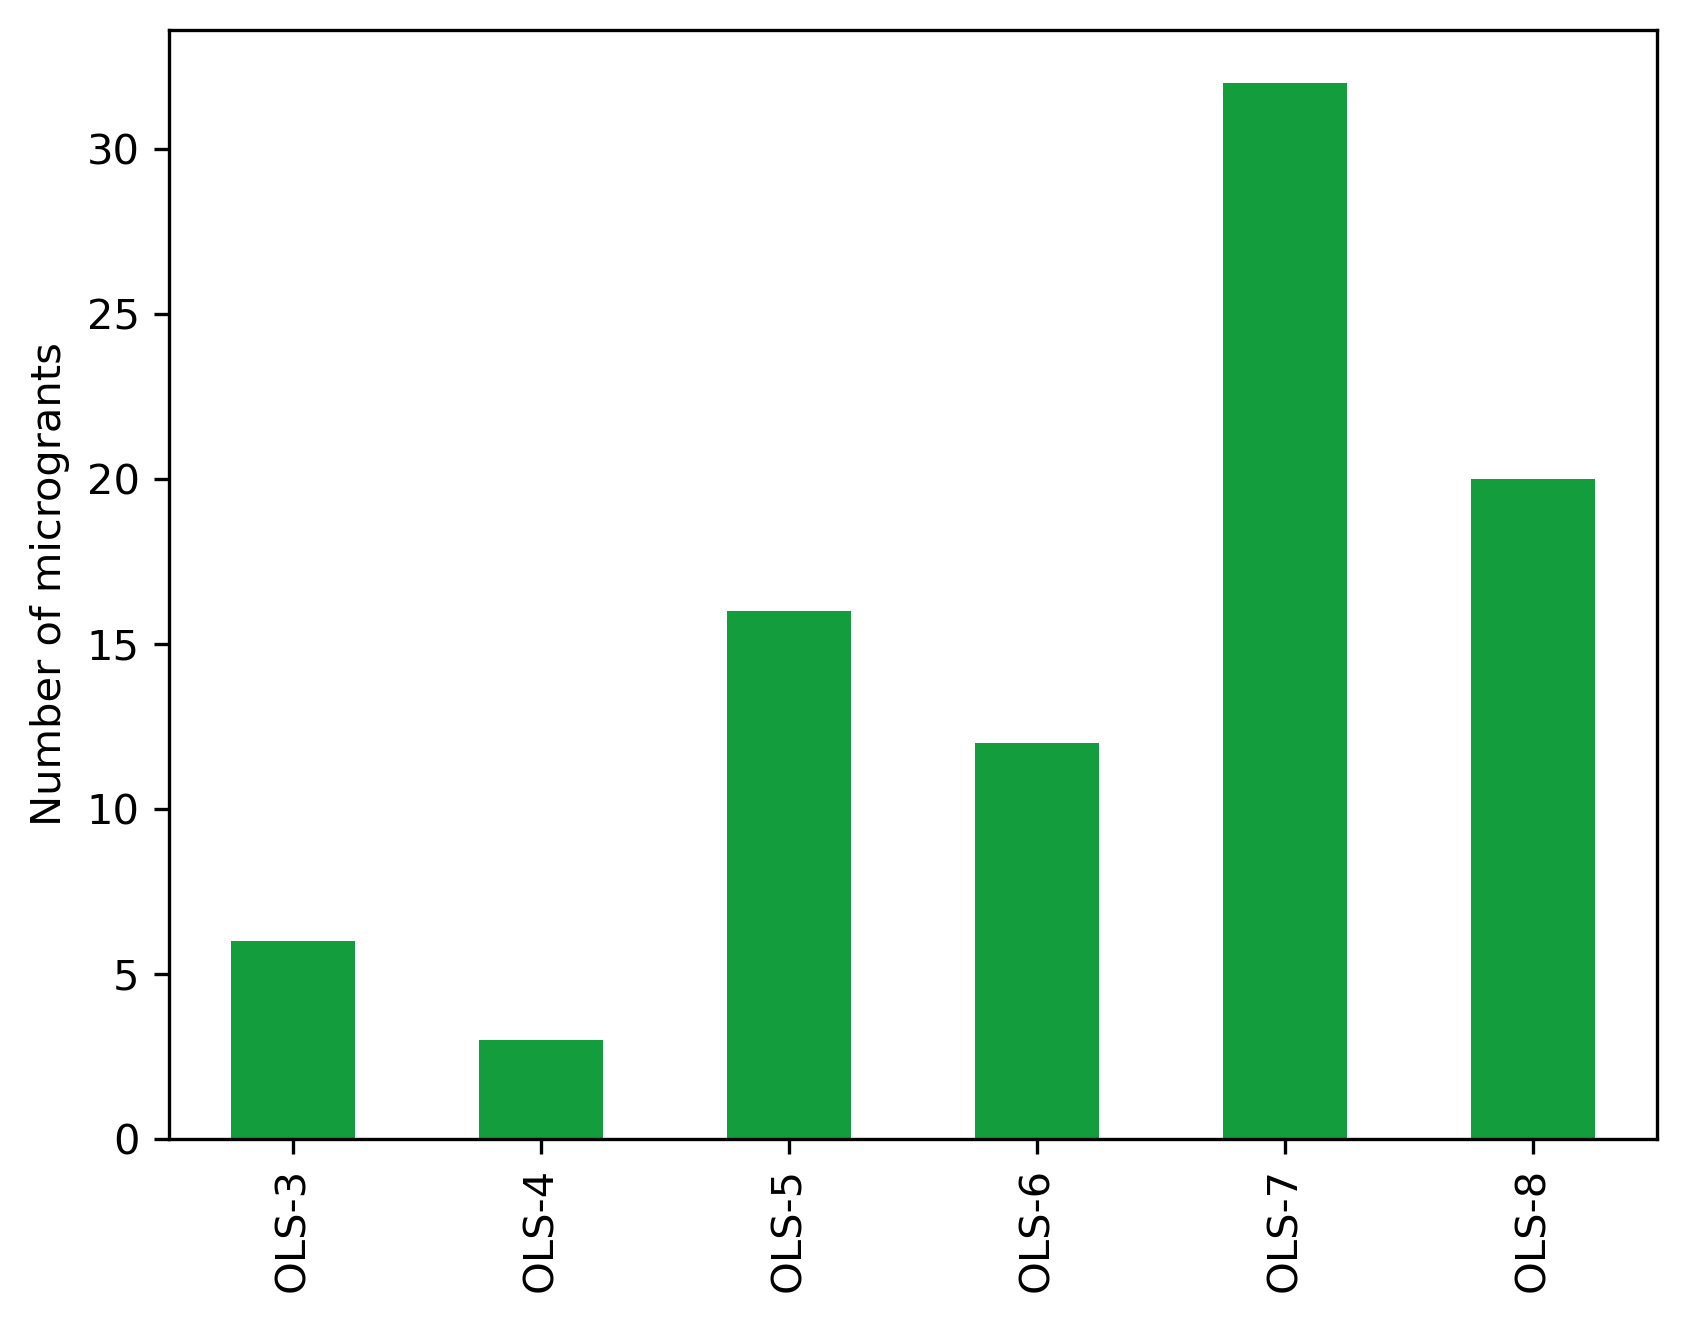

In [10]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_microg_df.Number
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Number of microgrants")
plt.xlabel("")

Text(0.5, 0, '')

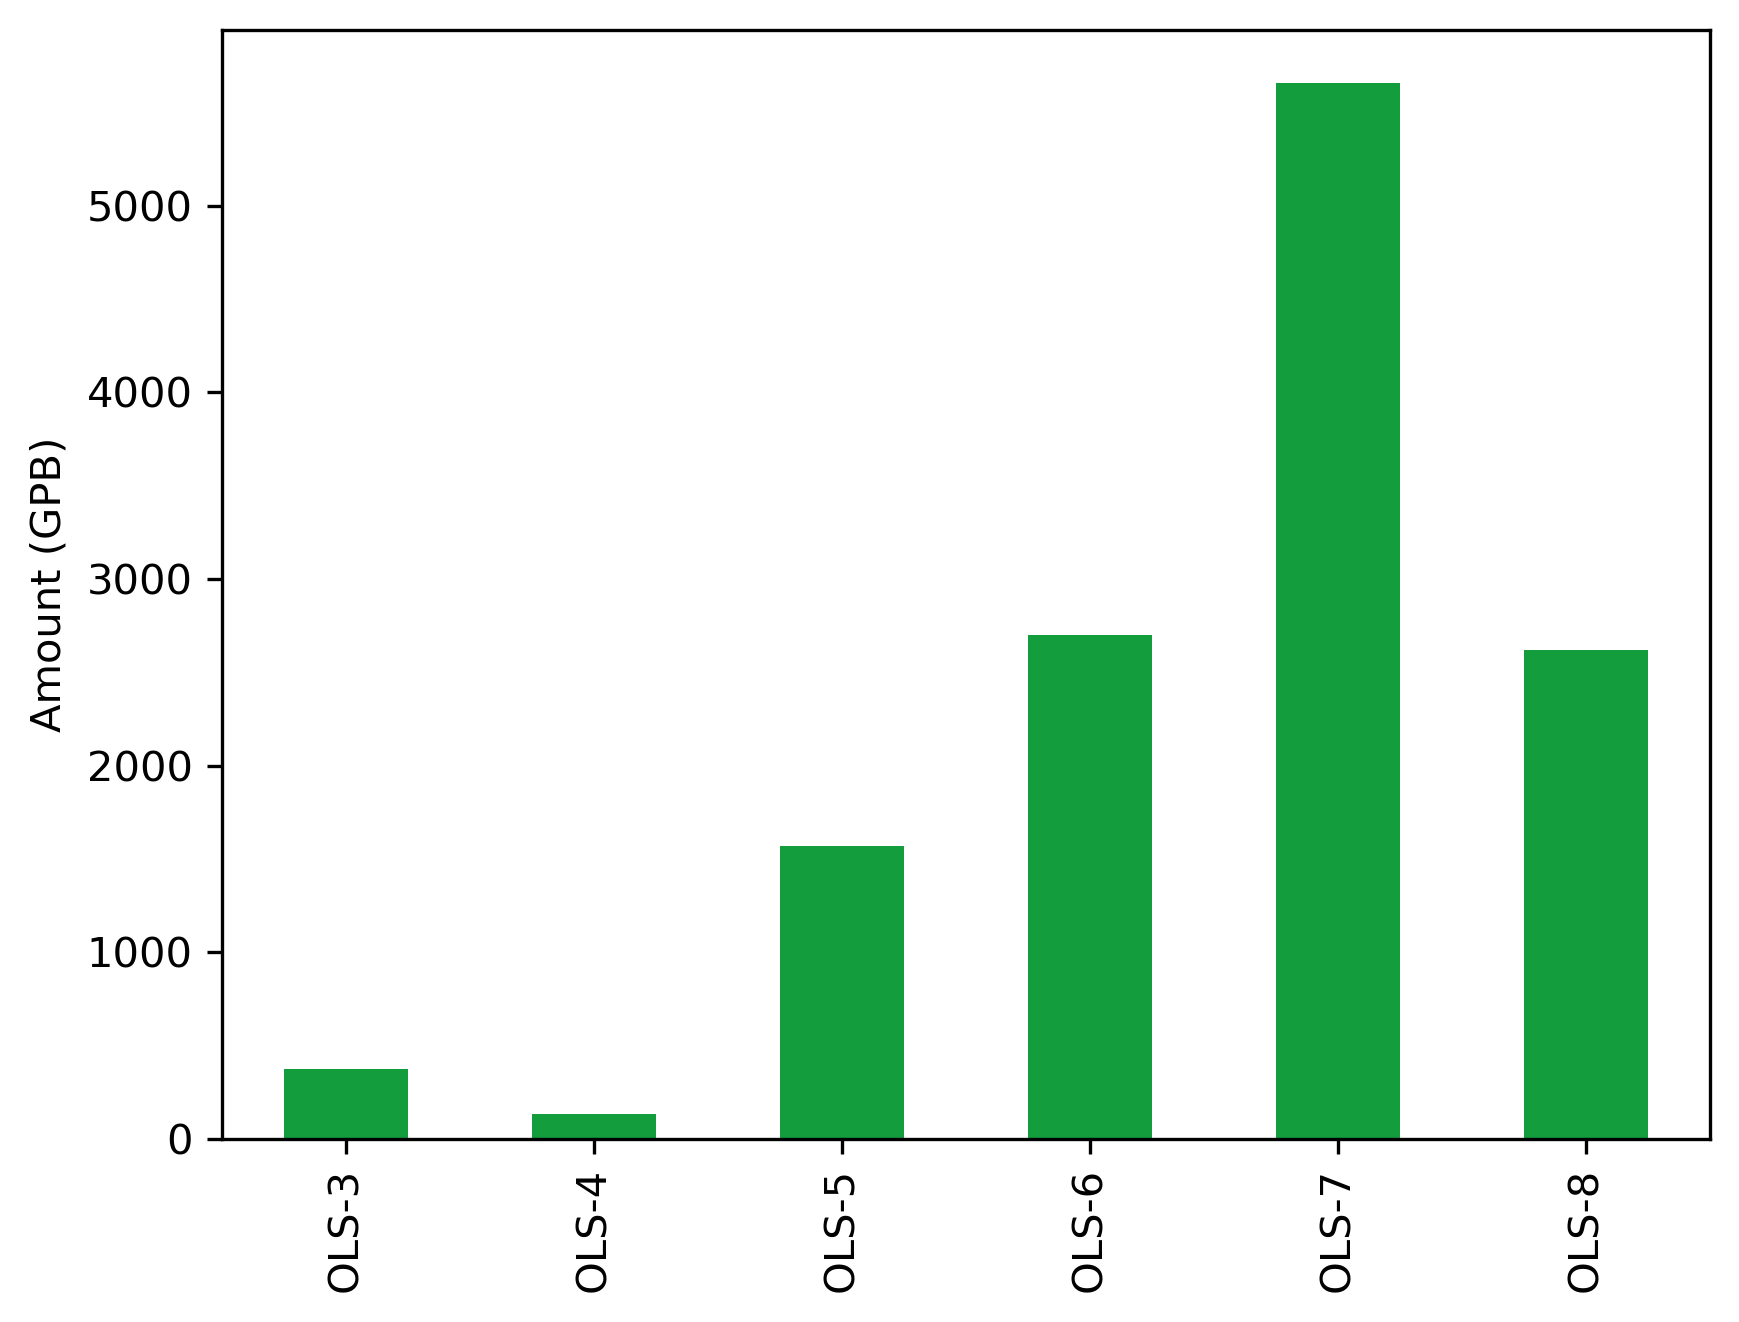

In [11]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_microg_df.Cost
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Amount (GPB)")
plt.xlabel("")

### Country

#### Number of microgrants

In [12]:
country_code_df = (
    microg_df
    .drop(columns = ["Item", "Country", "Cohort", "Continent"])
    .groupby(['Country_3'])
    .count()
    .rename(columns = {'Cost': 'total'})
    .rename_axis("iso_a3")
    .reset_index()
)
country_code_df

,iso_a3,total
0,ARG,5
1,BOL,2
2,BRA,1
3,CHE,1
4,CHL,1
5,CMR,13
6,COL,3
7,EGY,1
8,ESP,1
9,FRA,1


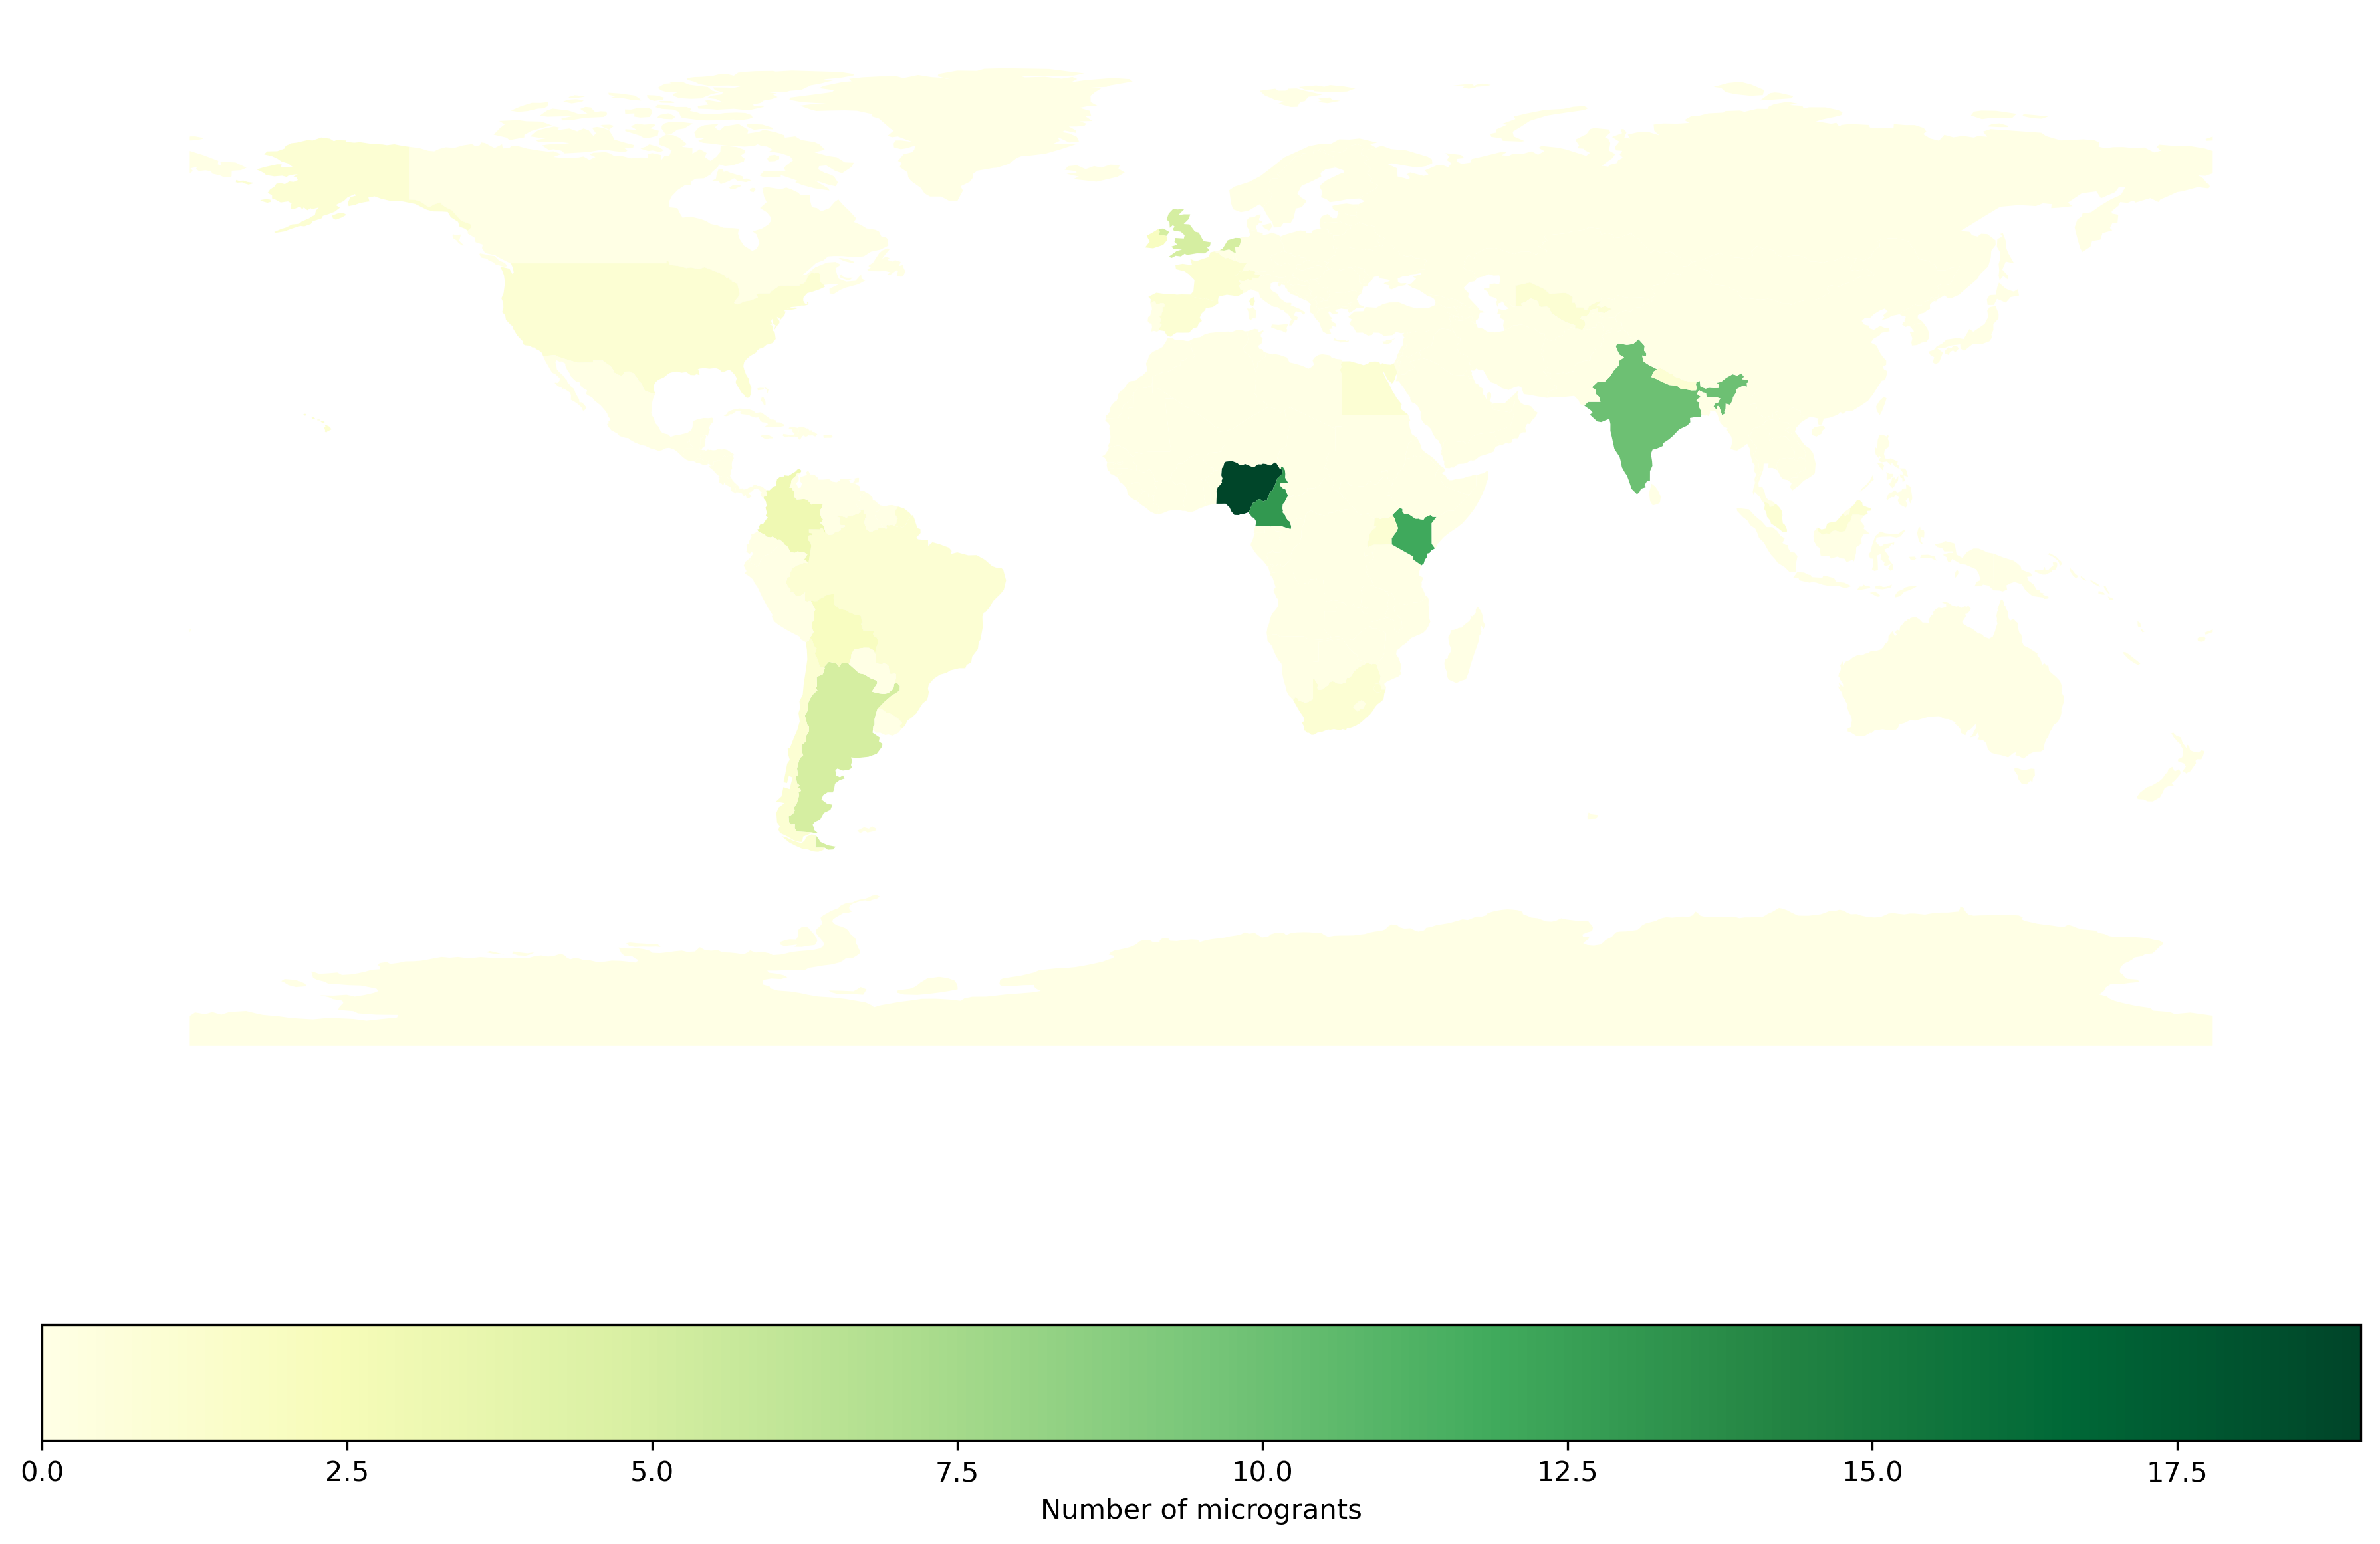

In [13]:
country_world_df = (
    pd.merge(world_df, country_code_df, on='iso_a3', how='outer')
    .fillna(0)
)
fig, ax = plt.subplots(figsize=(15, 10))
fig.set_dpi(300)

country_world_df.plot(
    column='total',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Number of microgrants", 'orientation': "horizontal"},
    cmap='YlGn')
ax.set_axis_off()

#### Amount (GBP)

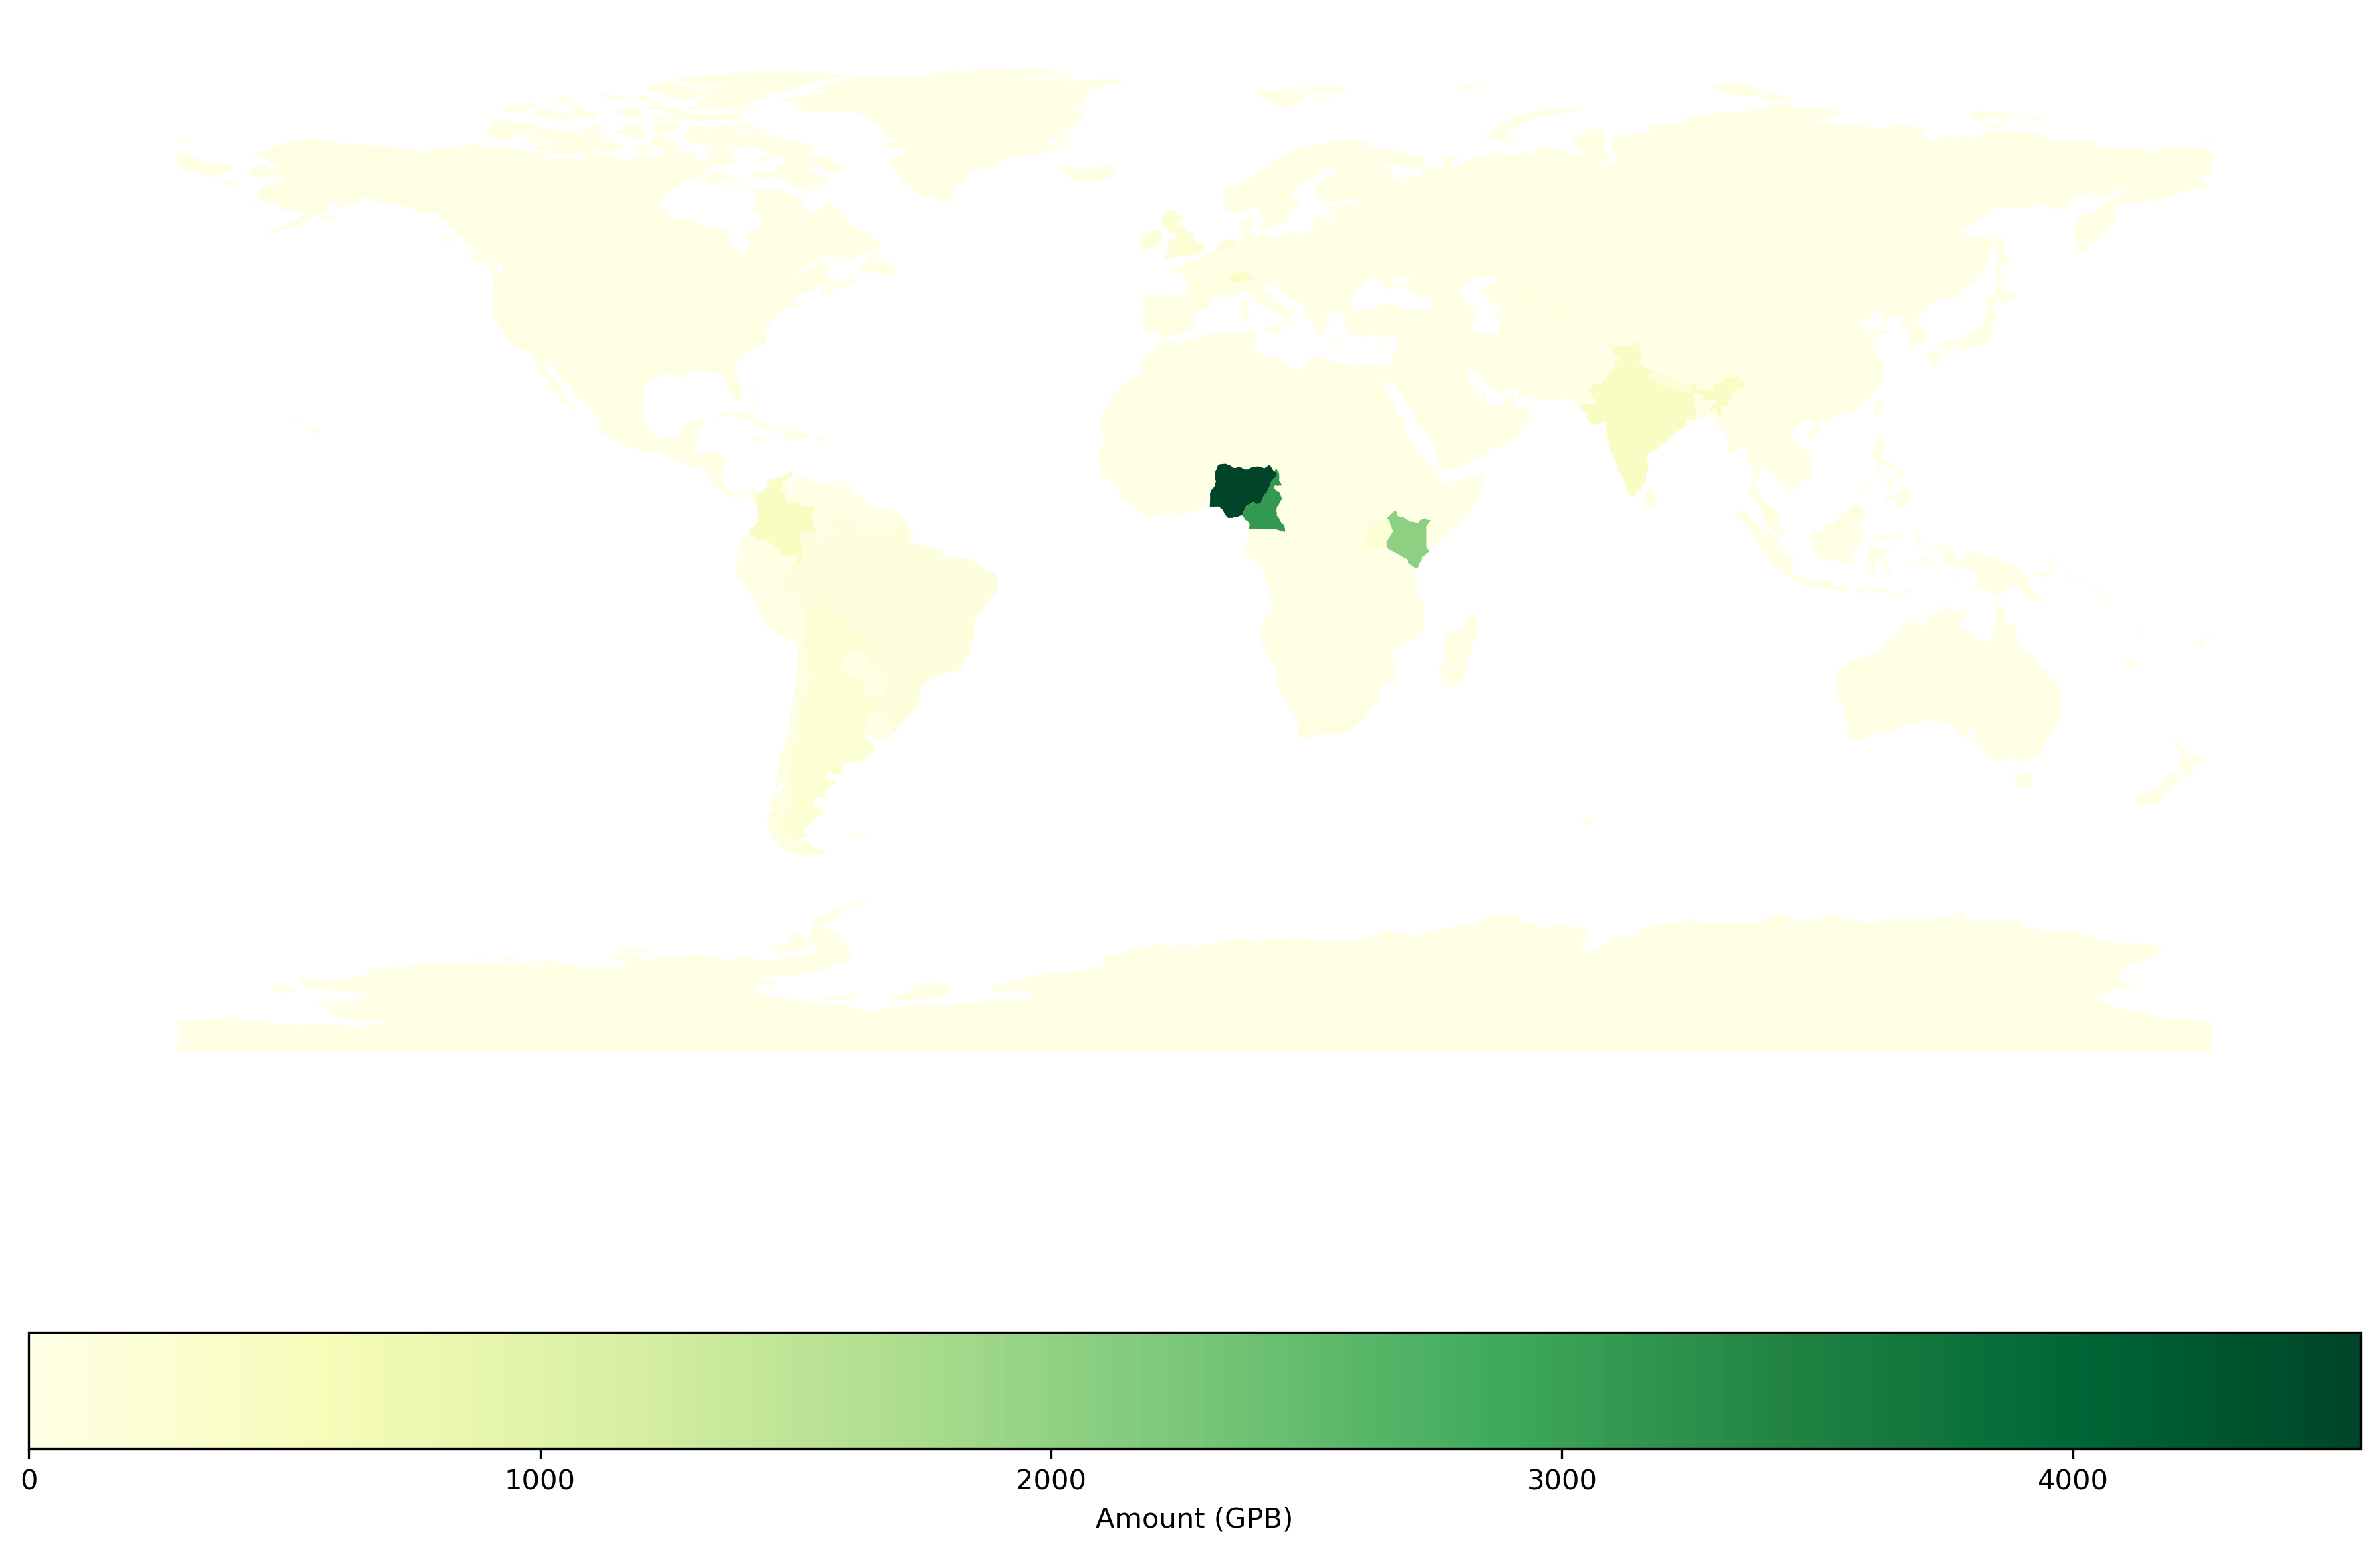

In [14]:
country_code_df = (
    microg_df
    .drop(columns = ["Item", "Country", "Cohort", "Continent"])
    .groupby(['Country_3'])
    .sum()
    .rename(columns = {'Cost': 'total'})
    .rename_axis("iso_a3")
    .reset_index()
)
country_world_df = (
    pd.merge(world_df, country_code_df, on='iso_a3', how='outer')
    .fillna(0)
)
fig, ax = plt.subplots(figsize=(15, 10))
fig.set_dpi(300)

country_world_df.plot(
    column='total',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Amount (GPB)", 'orientation': "horizontal"},
    cmap='YlGn')
ax.set_axis_off()

### Continent

In [15]:
number_df = (
    microg_df
    .groupby(by="Continent")
    .count()
    .drop(columns = ["Cost", "Country", "Item", "Country_3"])
    .rename(columns = {"Cohort": "Number"})
)
amount_df = (
    microg_df
    .drop(columns = ["Item", "Country", "Cohort", "Country_3"])
    .groupby(by="Continent")
    .sum()
)
continent_microg_df = number_df.join(amount_df)
tmp = continent_microg_df[continent_microg_df.index!=''].sort_values("Number")
continent_microg_df = pd.concat([continent_microg_df[continent_microg_df.index==''], tmp])
continent_microg_df

,Number,Cost
Continent,,
North America,1,51.9520
South America,12,1128.3018
Asia,13,748.8995
Europe,15,1075.4892
Africa,48,10050.9952


Text(0.5, 0, '')

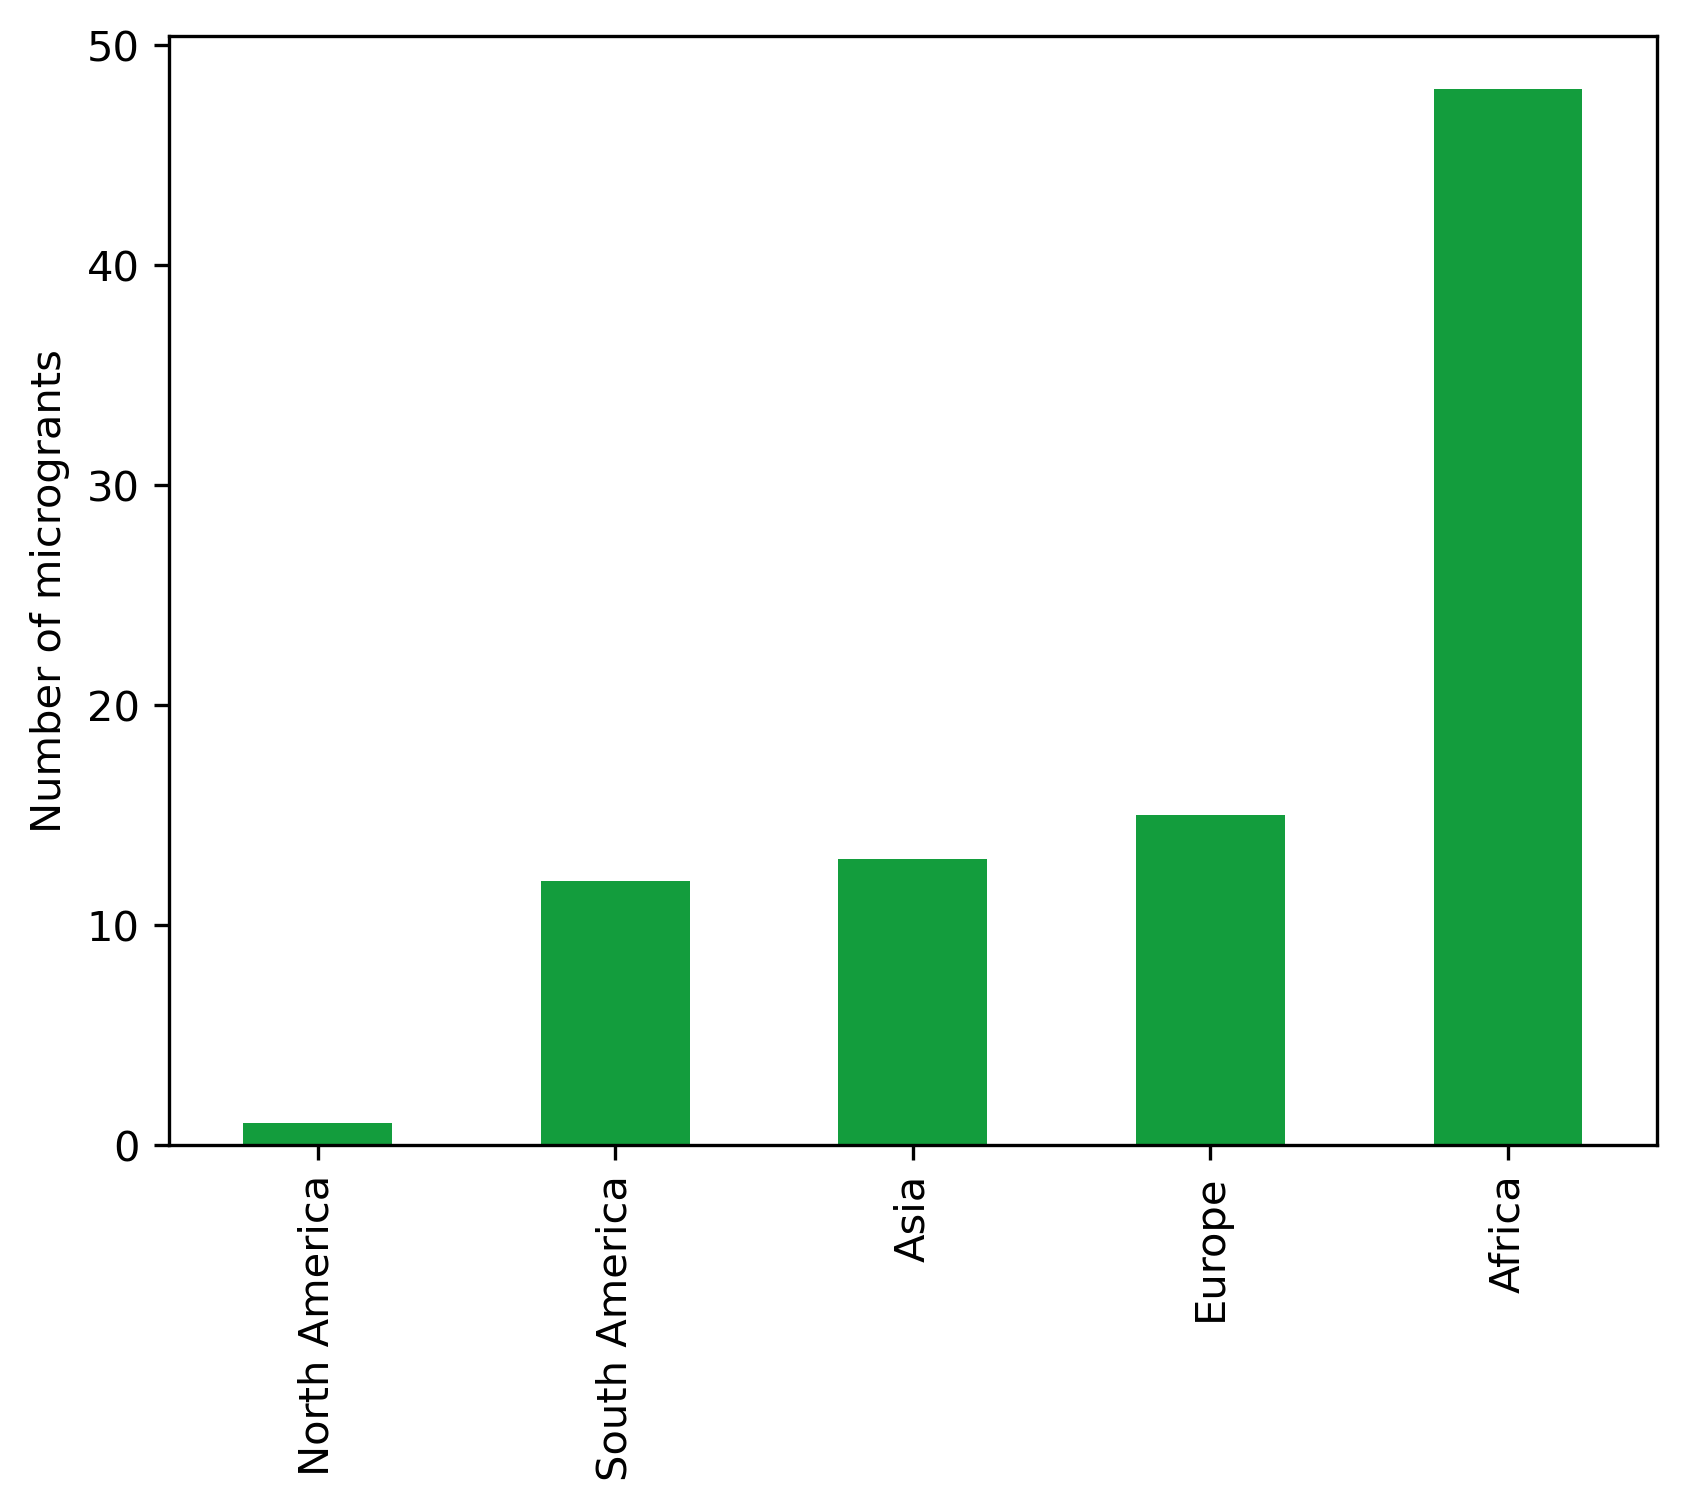

In [16]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(continent_microg_df.Number
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Number of microgrants")
plt.xlabel("")

Text(0.5, 0, '')

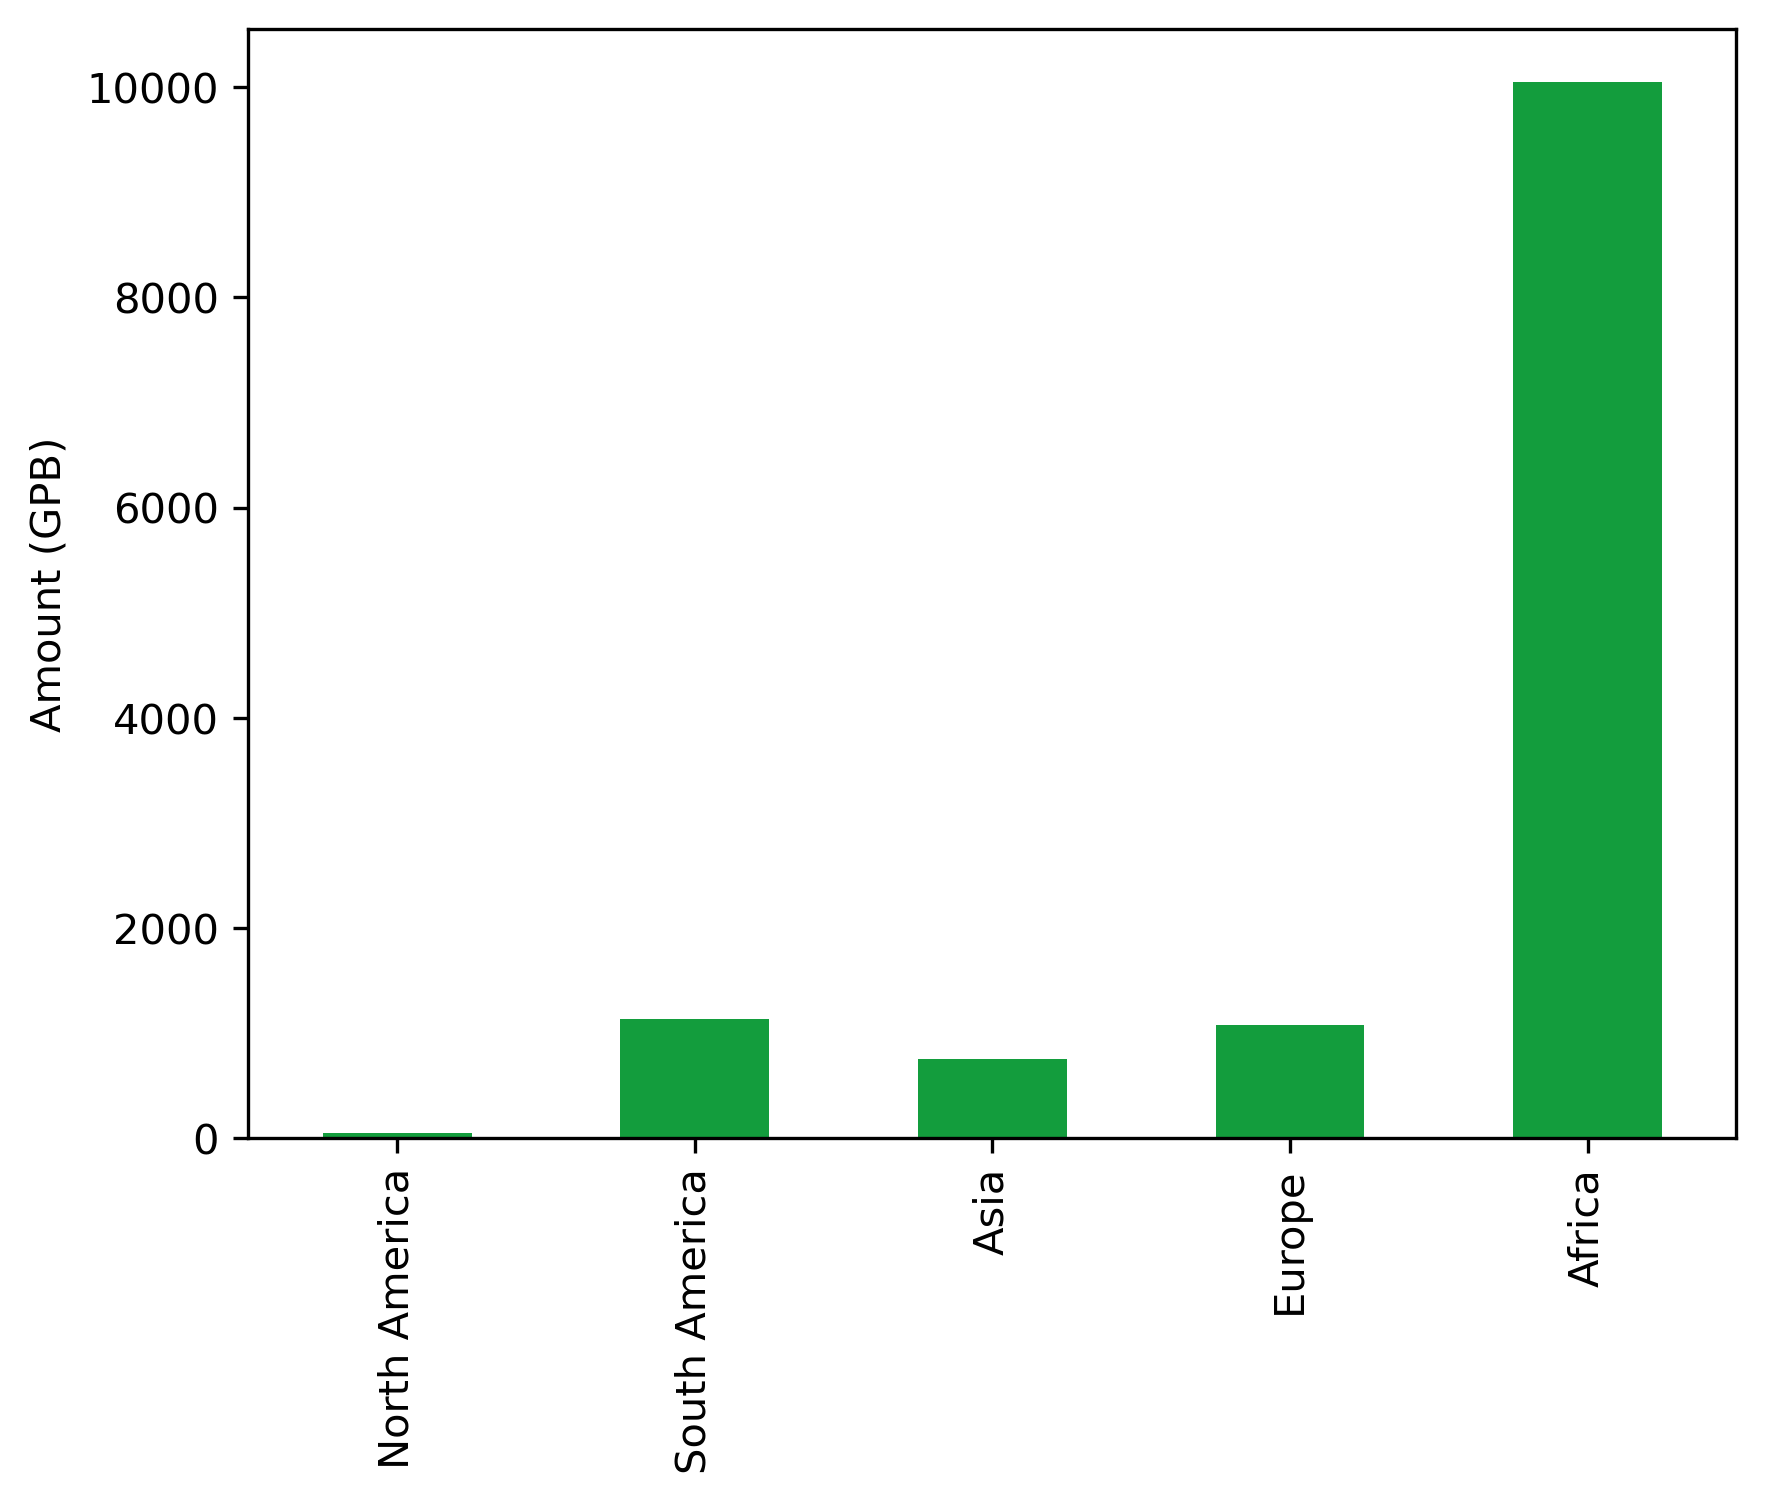

In [17]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(continent_microg_df.Cost
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Amount (GPB)")
plt.xlabel("")

### Cohort and continent

#### Number of microgrants

In [18]:
cohort_continent_df = (
    microg_df
    .drop(columns = ["Item", "Country", "Country_3"])
    .groupby(by=["Continent","Cohort"])
    .count()
)
cohort_continent_df = (
    pd.pivot_table(cohort_continent_df, index = 'Continent', columns = 'Cohort', values="Cost")
    .reindex(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])
)
cohort_continent_df

Cohort,OLS-3,OLS-4,OLS-5,OLS-6,OLS-7,OLS-8
Continent,,,,,,
Africa,2.0,1.0,5.0,6.0,21.0,13.0
Asia,3.0,2.0,5.0,1.0,1.0,1.0
Europe,1.0,NaN,3.0,5.0,3.0,3.0
North America,NaN,NaN,NaN,NaN,1.0,NaN
Oceania,NaN,NaN,NaN,NaN,NaN,NaN
South America,NaN,NaN,3.0,NaN,6.0,3.0


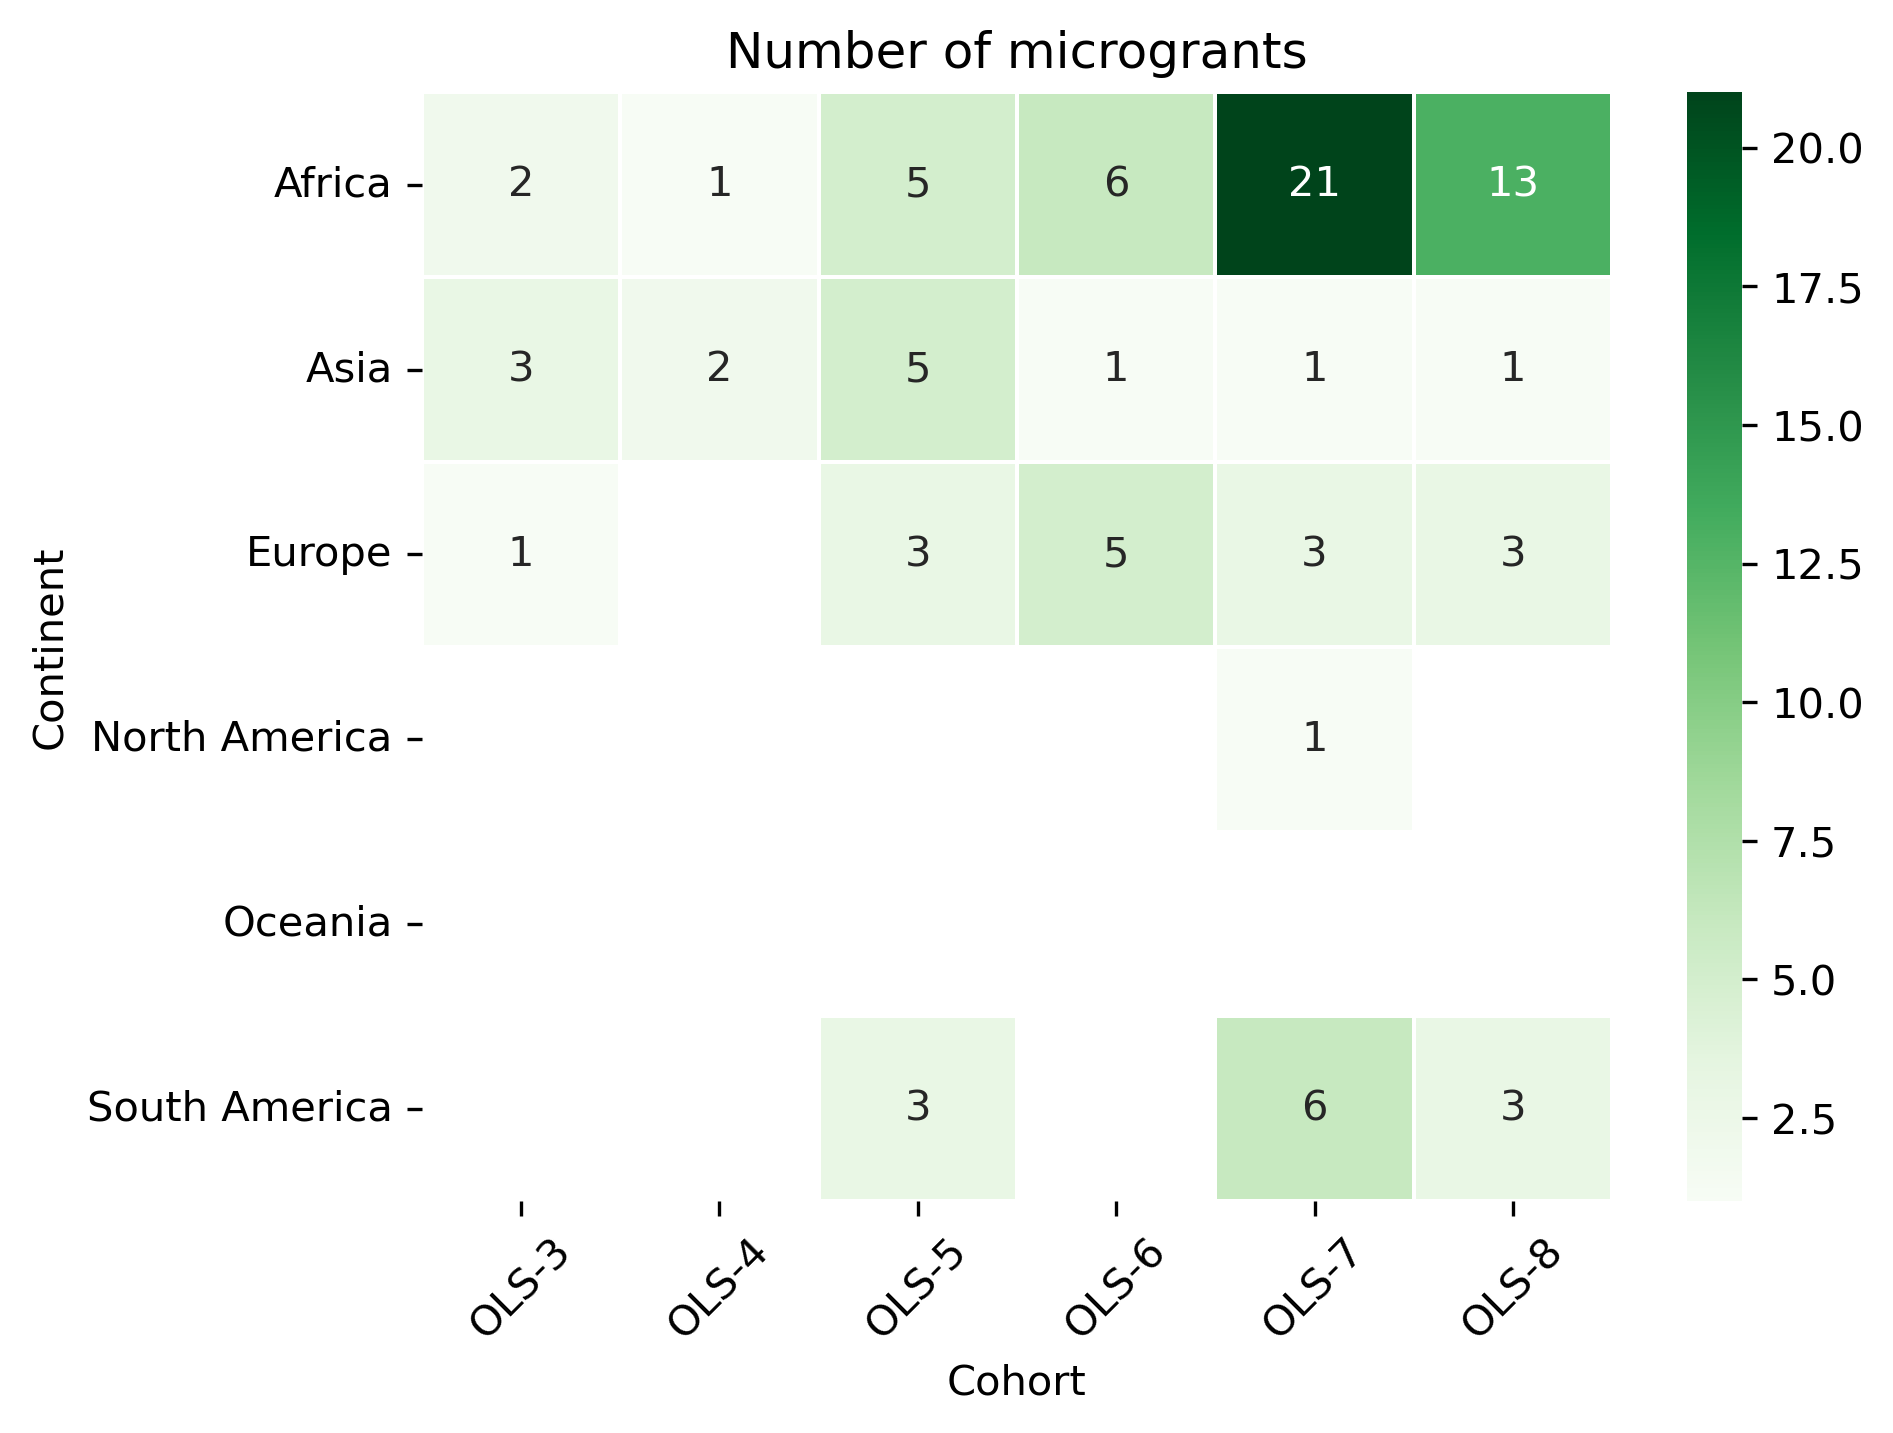

In [19]:
fig, ax = plt.subplots()
fig.set_dpi(300)
sns.heatmap(cohort_continent_df, cmap='Greens', linewidths=0.5, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation='horizontal')
ax.set_title('Number of microgrants')
plt.show()

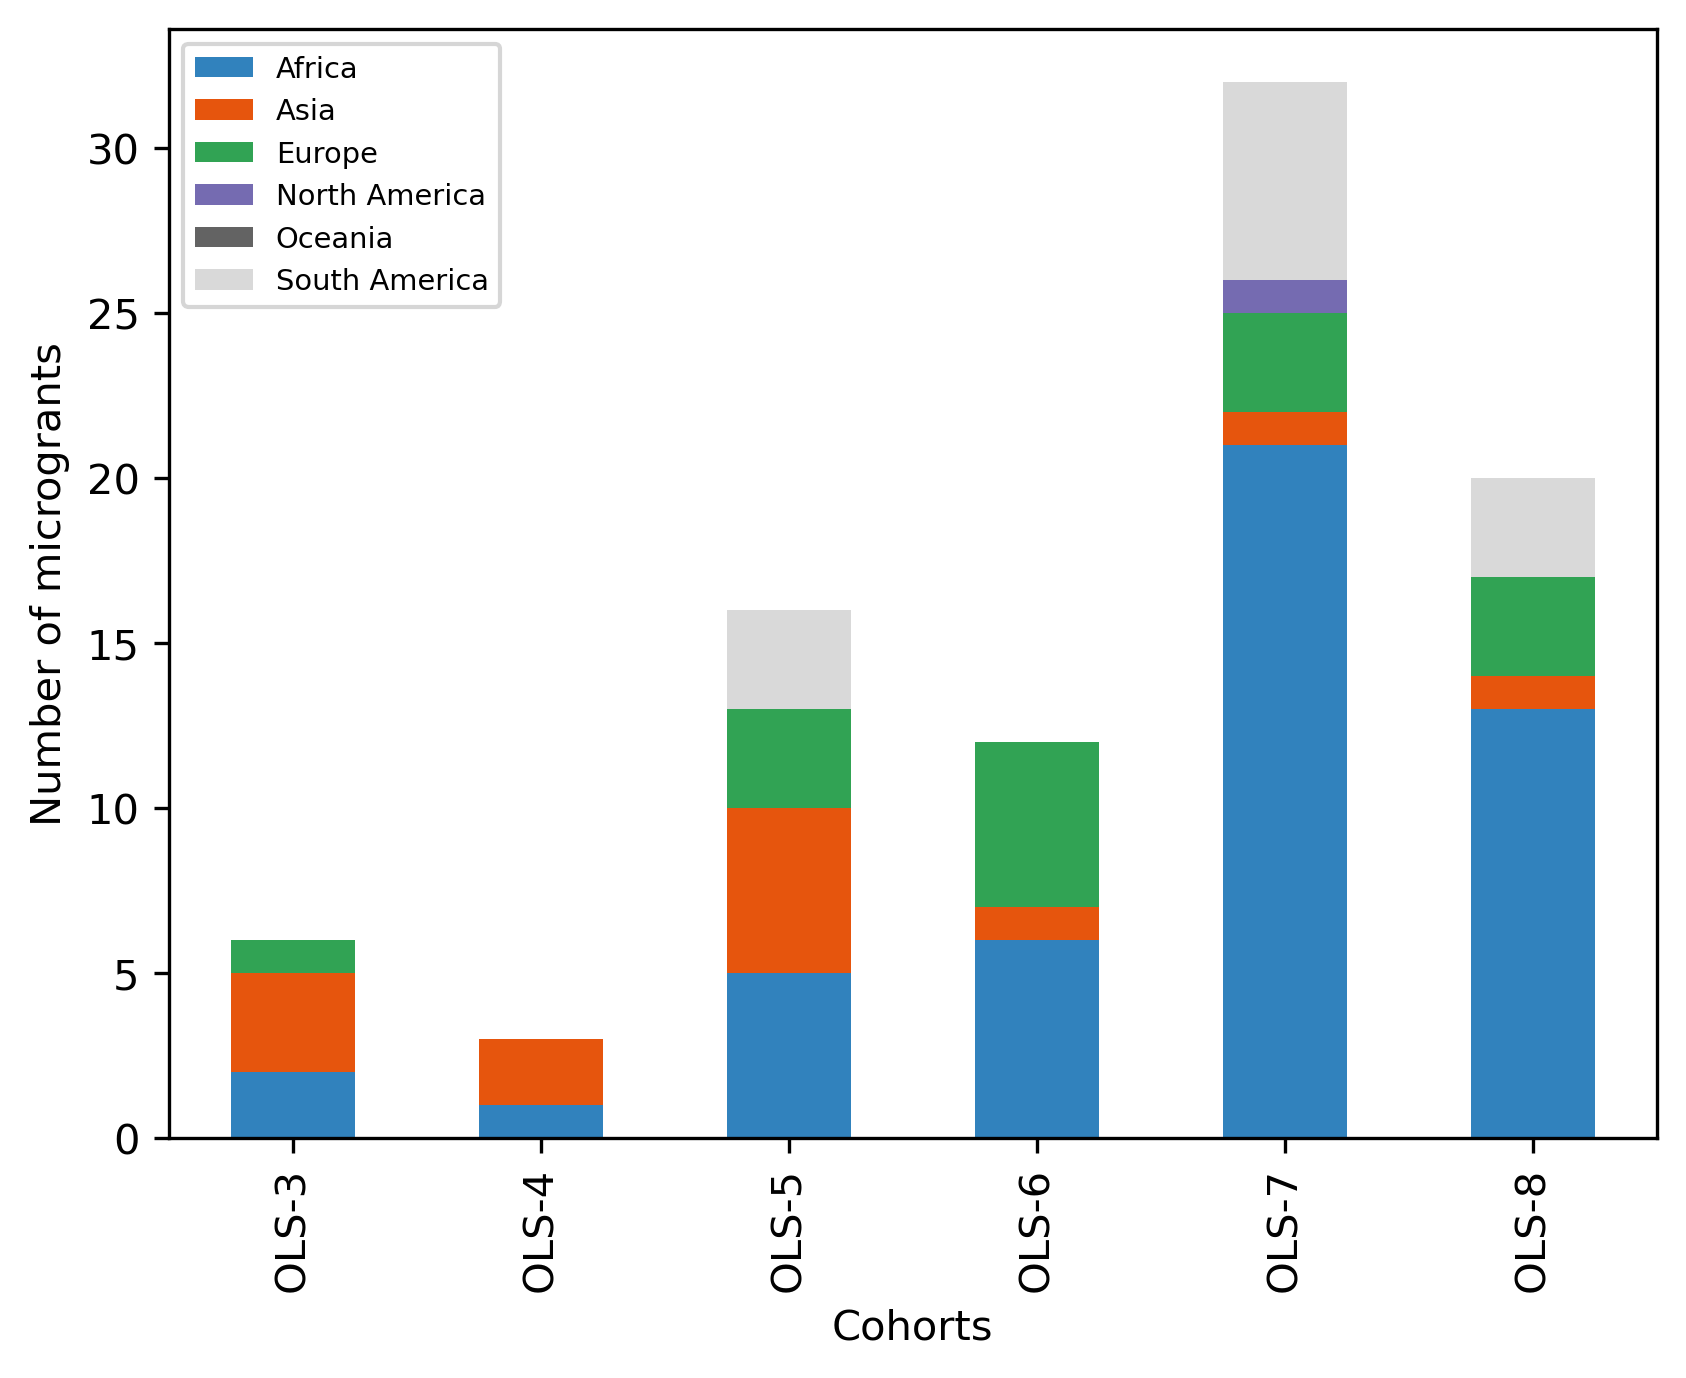

In [20]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_continent_df
     .transpose()
     .plot.bar(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Cohorts')
plt.ylabel('Number of microgrants')
ax.legend(
#    loc='center left',
#    bbox_to_anchor=(1, 0.5),
#    frameon=False,
    fontsize='x-small')

#### Amount (GBP)

In [21]:
cohort_continent_df = (
    microg_df
    .drop(columns = ["Item", "Country", "Country_3"])
    .groupby(by=["Continent","Cohort"])
    .sum()
)
cohort_continent_df = (
    pd.pivot_table(cohort_continent_df, index = 'Continent', columns = 'Cohort', values="Cost")
    .reindex(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])
)
cohort_continent_df

Cohort,OLS-3,OLS-4,OLS-5,OLS-6,OLS-7,OLS-8
Continent,,,,,,
Africa,57.428,9.40,1004.2960,2079.7326,4764.8786,2135.260
Asia,228.250,125.64,216.8495,44.9800,53.1000,80.080
Europe,90.248,NaN,93.6884,576.4600,183.5228,131.570
North America,NaN,NaN,NaN,NaN,51.9520,NaN
Oceania,NaN,NaN,NaN,NaN,NaN,NaN
South America,NaN,NaN,251.2318,NaN,605.7260,271.344


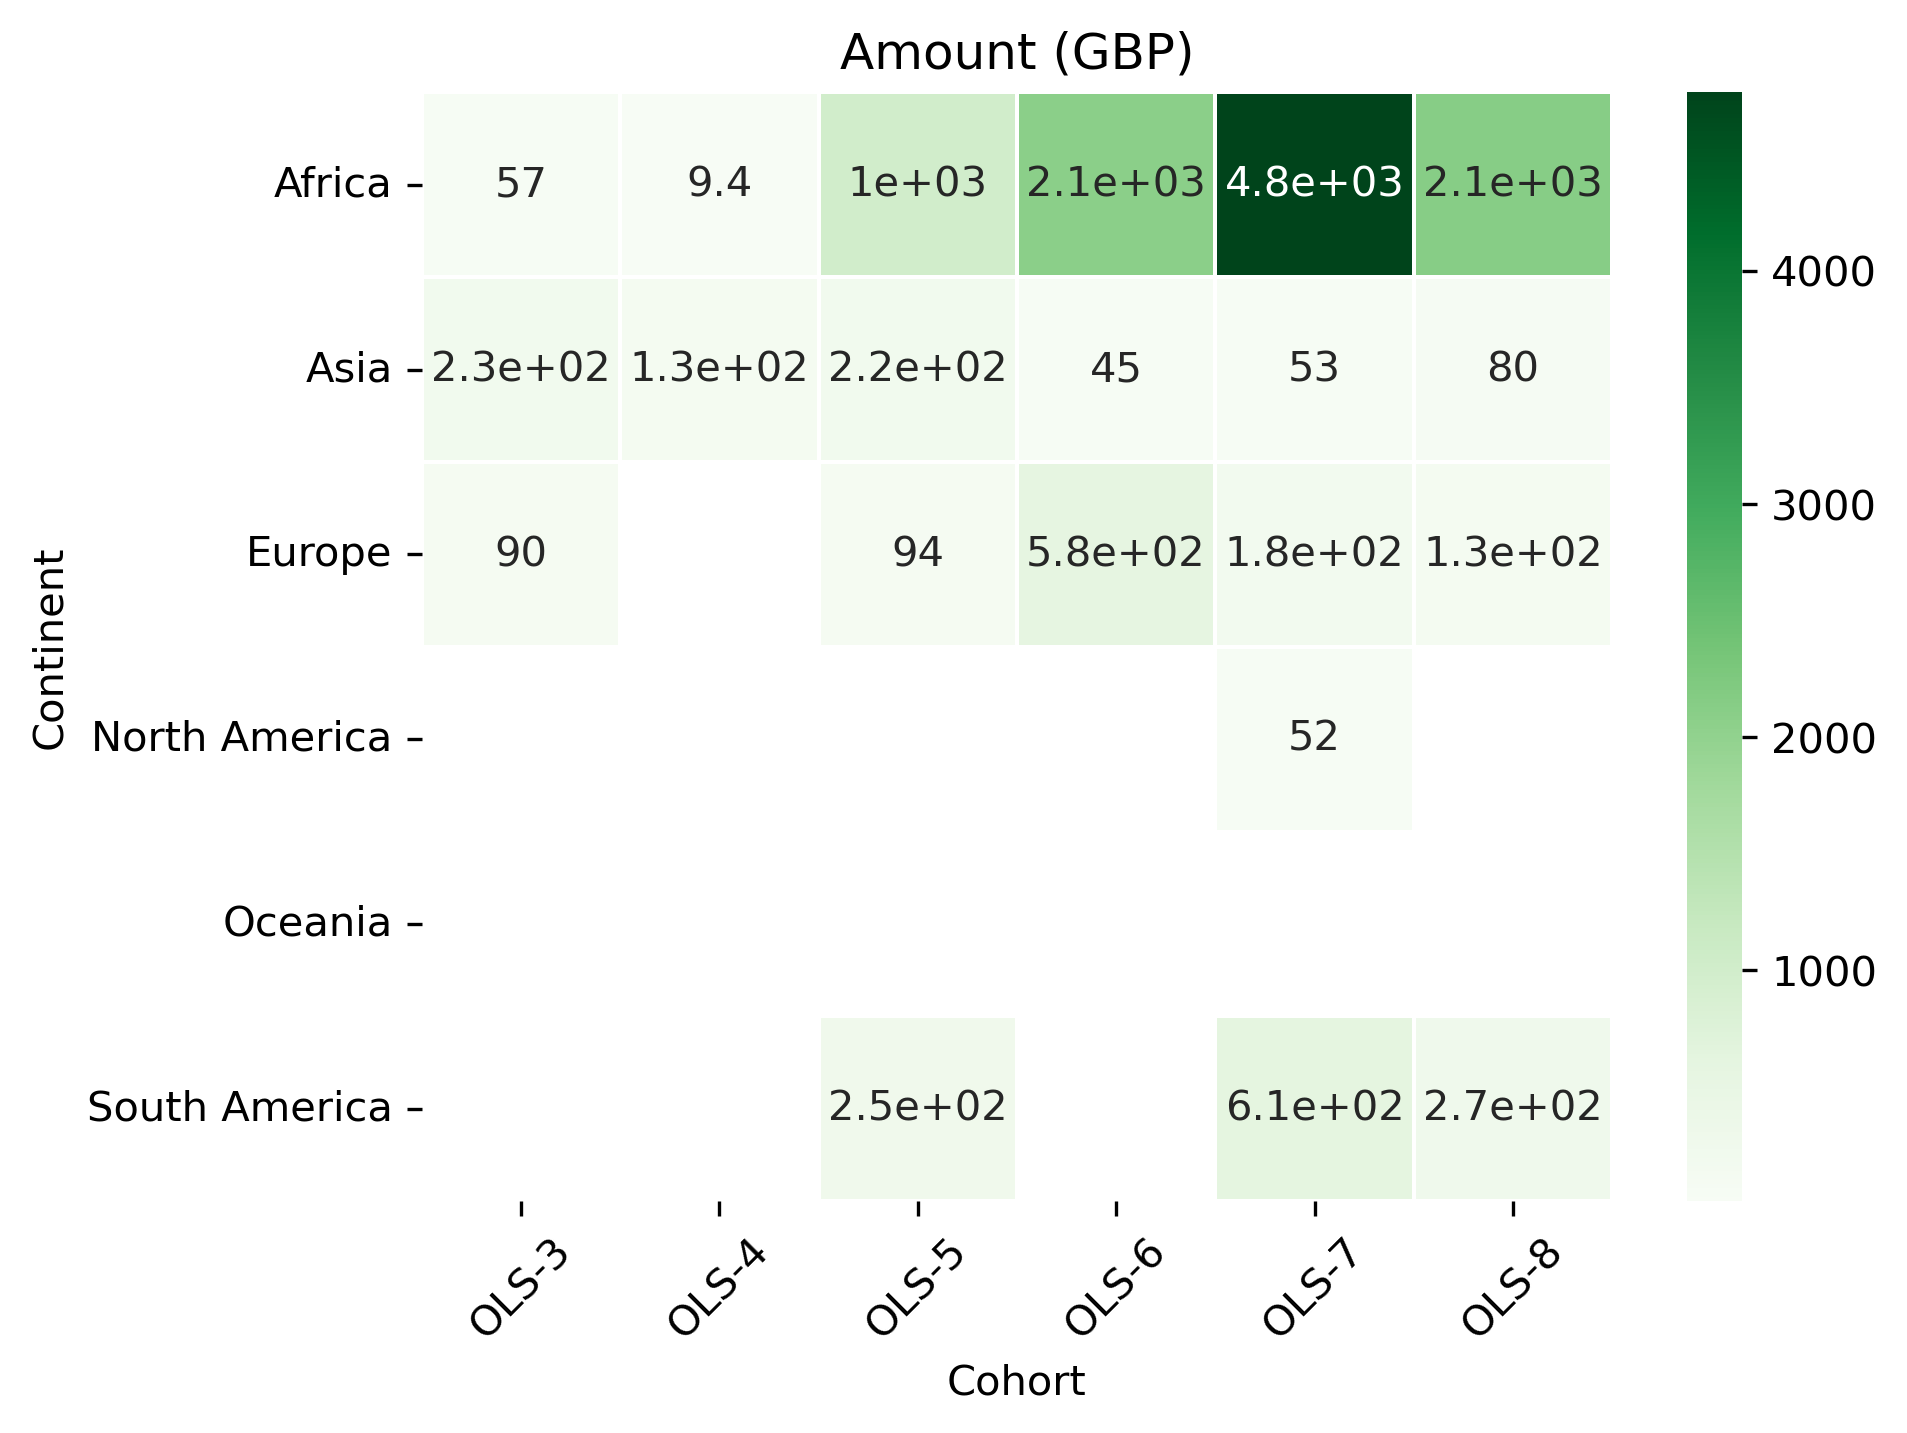

In [22]:
fig, ax = plt.subplots()
fig.set_dpi(300)
sns.heatmap(cohort_continent_df, cmap='Greens', linewidths=0.5, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation='horizontal')
ax.set_title('Amount (GBP)')
plt.show()

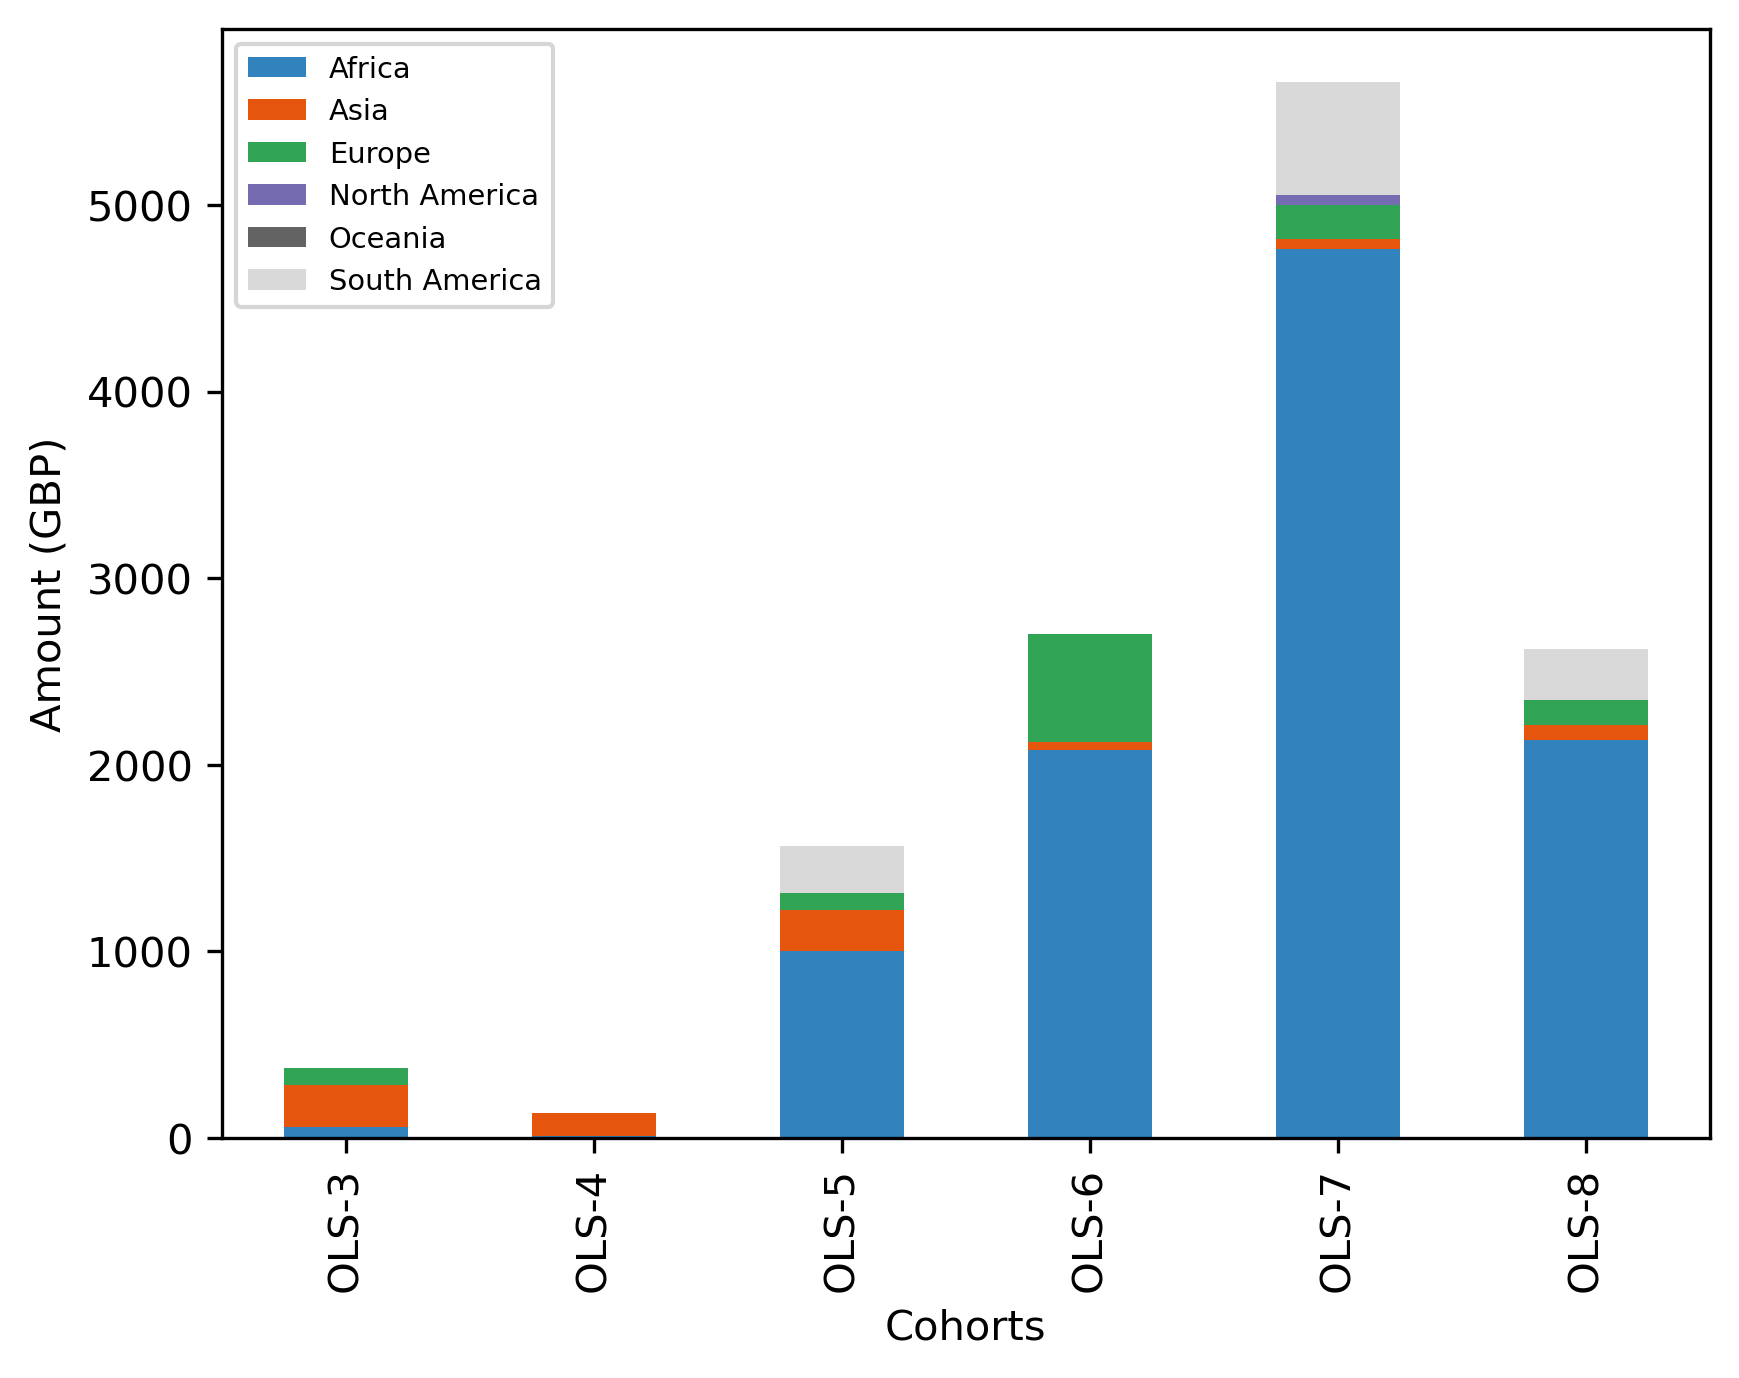

In [23]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_continent_df
     .transpose()
     .plot.bar(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Cohorts')
plt.ylabel('Amount (GBP)')
ax.legend(
#    loc='center left',
#    bbox_to_anchor=(1, 0.5),
#    frameon=False,
    fontsize='x-small')

### Items

In [24]:
item_df = (
    microg_df
    .drop(columns = ["Continent", "Country", "Country_3", "Cost"])
    .explode('Item')
    .groupby(by='Item')
    .count()
    .rename(columns = {"Cohort": "Number"})
    .sort_values('Number')
)

In [61]:
item_df.sort_values('Number',ascending=False).head(10)

,Number
Item,
Headset,50
Internet,40
Webcam,28
Battery,10
Other,9
Childcare,7
Modem,6
Mouse,6
Hardrive,4


Text(0.5, 0, '')

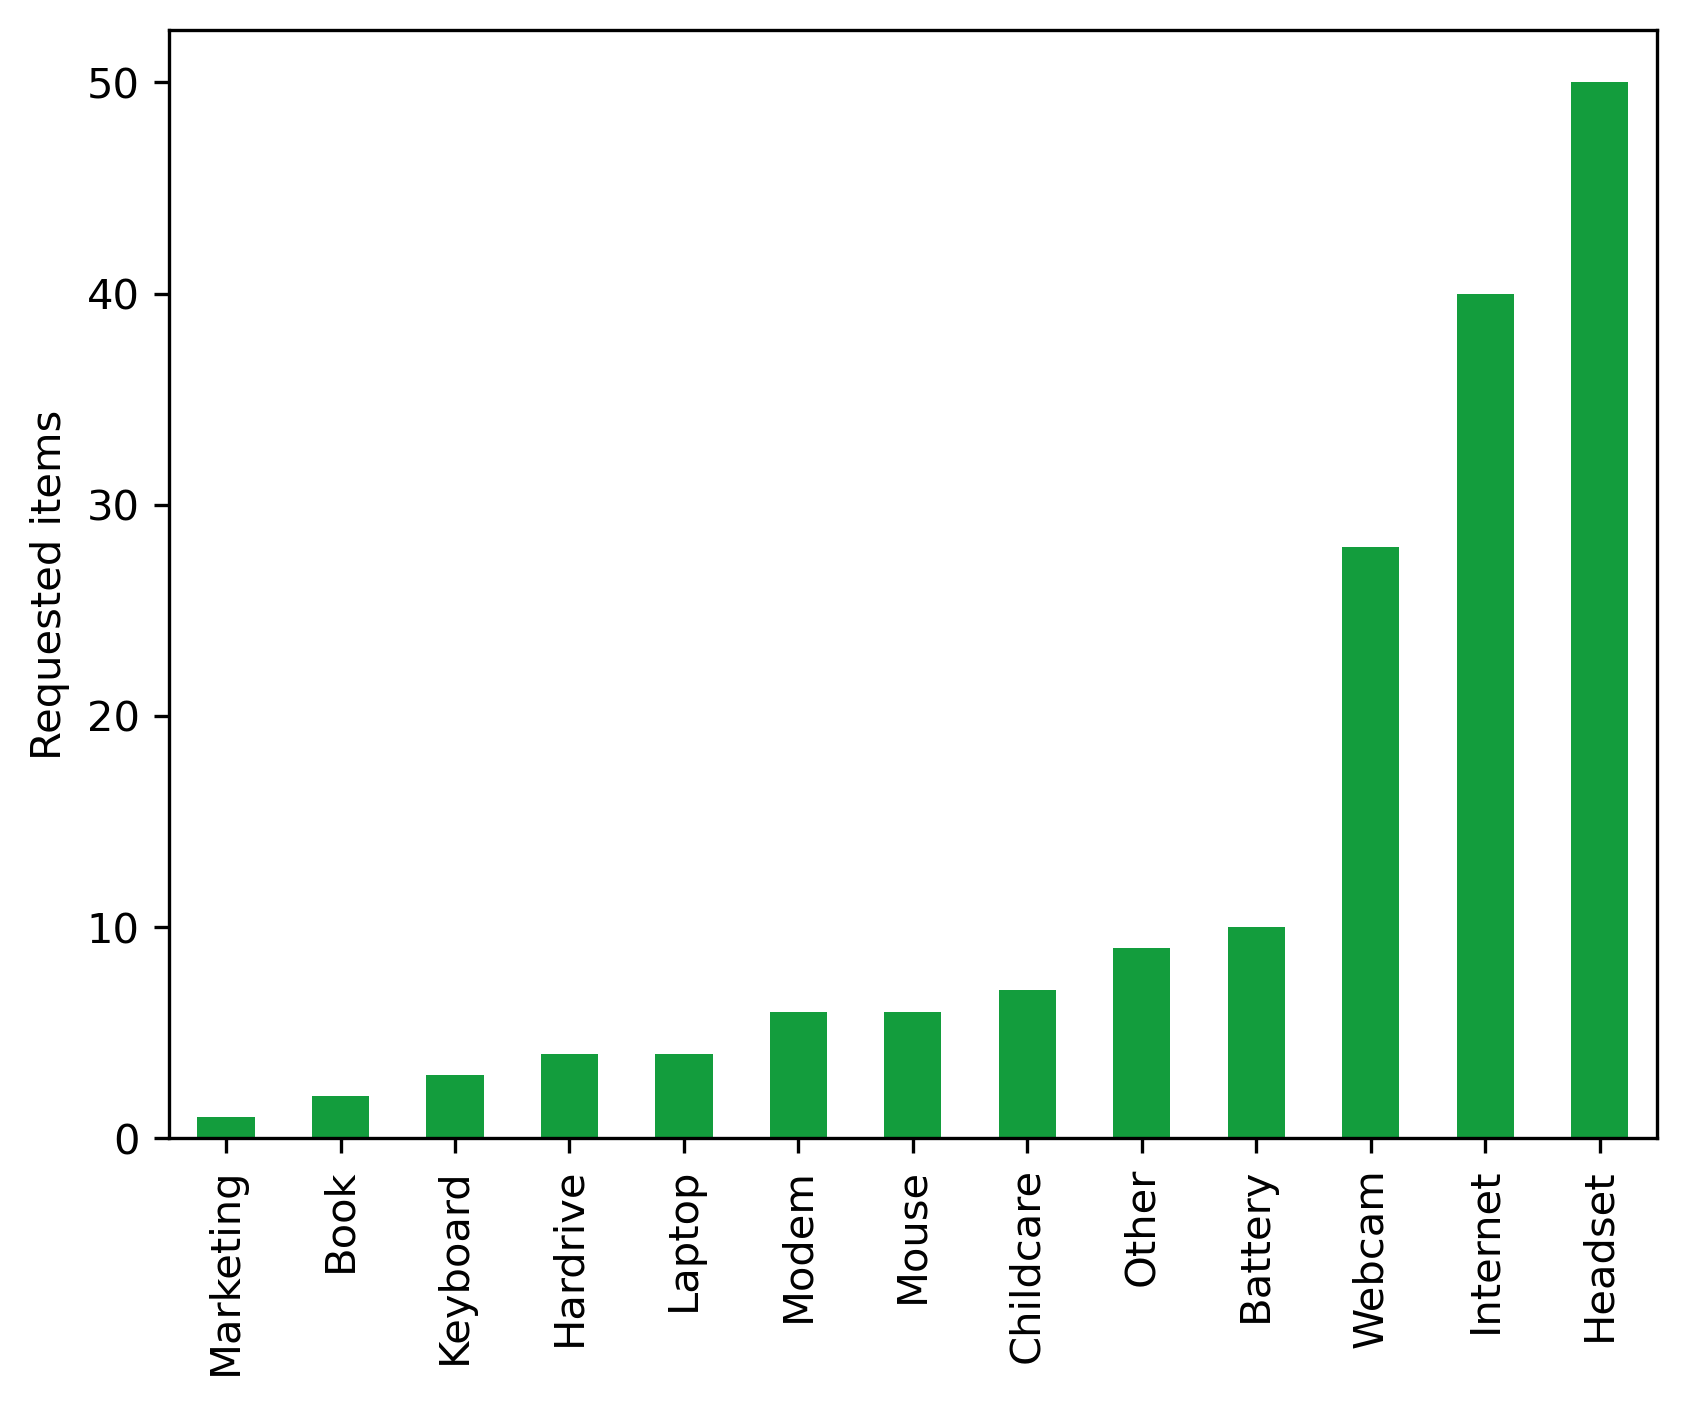

In [25]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(item_df.Number
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Requested items")
plt.xlabel("")

## Honoraria

In [26]:
url = "https://docs.google.com/spreadsheets/d/1OUO4HcCeGfU9OfgrSif-sdDiqUKrxqsppxjvwns9wPE/export?format=csv&gid=0"
honor_bf_civi_df = (
    pd.read_csv(url)
    .fillna("")
)
honor_bf_civi_df["Continent"] = honor_bf_civi_df.Country.apply(lambda x: get_continent(x))

In [27]:
honor_in_civi_fp = Path("../data/openseeds/honorarium.csv") 
honor_in_civi_df = (
    pd.read_csv(honor_in_civi_fp)
    .fillna("")
    .rename(columns = {
        "Honorarium administration: Cohort": "Cohort",
        "Honorarium administration: Role": "Role",
        "Honorarium administration: Final cost": "Amount",
        "Contact: ": "Country",
    })
    .replace("Speaker (Expert talk)", "speaker")
    .replace("speaker for Open Data", "speaker")
    .replace("Speaker", "speaker")
    .replace("Mentor", "mentor")
    .replace("Call Facilitator", "facilitator")
    .replace("Call facilitator", "facilitator")
    .replace("Facilitator (co-hosted 2 meetings and Transcription of the three (3) graduation videos", "facilitator")
    .replace("Transcription of the videos, preparing guideline for the transcription", "facilitator")
    .replace("facilitator role (transcript check - week 2 and 3 cohort calls)", "facilitator")
    .replace("facilitator  (co-host a session )", "facilitator")
    .replace("facilitator (co-host a session)", "facilitator")
    .replace("Facilitator - transcription check", "facilitator")
    .replace("facilitator; transcription check", "facilitator")
    .replace("Video Facilitator", "facilitator")
    .replace("transcription check", "facilitator")
    .replace("Ally Skills workshop facilitator", "facilitator")
    .replace("Facilitator and Speaker", "speaker, facilitator")
    .replace("Mentor and expert", "mentor")
    .replace("co-facilitator, transcriber", "facilitator")
    .replace("Facilitator", "facilitator")
    .drop(columns = ["Case ID"])
)
honor_in_civi_df["Currency"] = honor_in_civi_df.Amount.apply(lambda x: x.split(" ")[1] if " " in x else "")
honor_in_civi_df["Amount"] = honor_in_civi_df.Amount.apply(lambda x: float(x.split(" ")[0]) if " " in x else 0)
honor_in_civi_df["Continent"] = honor_in_civi_df.Country.apply(lambda x: get_continent(x))

In [28]:
honor_df = (
    pd.concat([honor_bf_civi_df, honor_in_civi_df], ignore_index=True)
)
honor_df["Rate"] = honor_df.Currency.apply(lambda x: rate[x])
honor_df=(
    honor_df
    .assign(Amount= lambda df: df.Amount * df.Rate)
    .assign(Role= lambda df: df.Role.str.title())
    .drop(columns = ["Currency", "Rate"])
)
honor_df

,Cohort,Role,Amount,Country,Continent
0,OLS-6,Speaker,212.9300,Colombia,South America
1,OLS-6,Facilitator,377.4900,United Kingdom,Europe
2,OLS-6,Speaker,211.5300,United Kingdom,Europe
3,OLS-6,Speaker,212.5700,,
4,OLS-6,Speaker,211.0700,Netherlands,Europe
...,...,...,...,...,...
138,OLS-7,Facilitator,121.3700,,
139,OLS-7,Facilitator,59.6926,France,Europe
140,OLS-6,Mentor,416.9800,Germany,Europe
141,OLS-7,Mentor,393.9402,Germany,Europe


### Overview

Number of honoraria

In [29]:
len(honor_df)

143

Total amount (in GBP)

In [30]:
sum(honor_df.Amount)

34908.9642

Mean amount per honorarium

In [31]:
sum(honor_df.Amount)/len(honor_df)

244.11863076923078

### Cohort

In [32]:
number_df = (
    honor_df
    .groupby(by="Cohort")
    .count()
    .drop(columns = ["Amount", "Country", "Continent"])
    .rename(columns = {"Role": "Number"})
)
amount_df = (
    honor_df
    .drop(columns = ["Role", "Country", "Continent"])
    .groupby(by="Cohort")
    .sum()
)
cohort_honor_df = number_df.join(amount_df)
cohort_honor_df

,Number,Amount
Cohort,,
OLS-5,38,11926.6882
OLS-6,25,5651.0730
OLS-7,52,13526.7310
OLS-8,28,3804.4720


Text(0.5, 0, '')

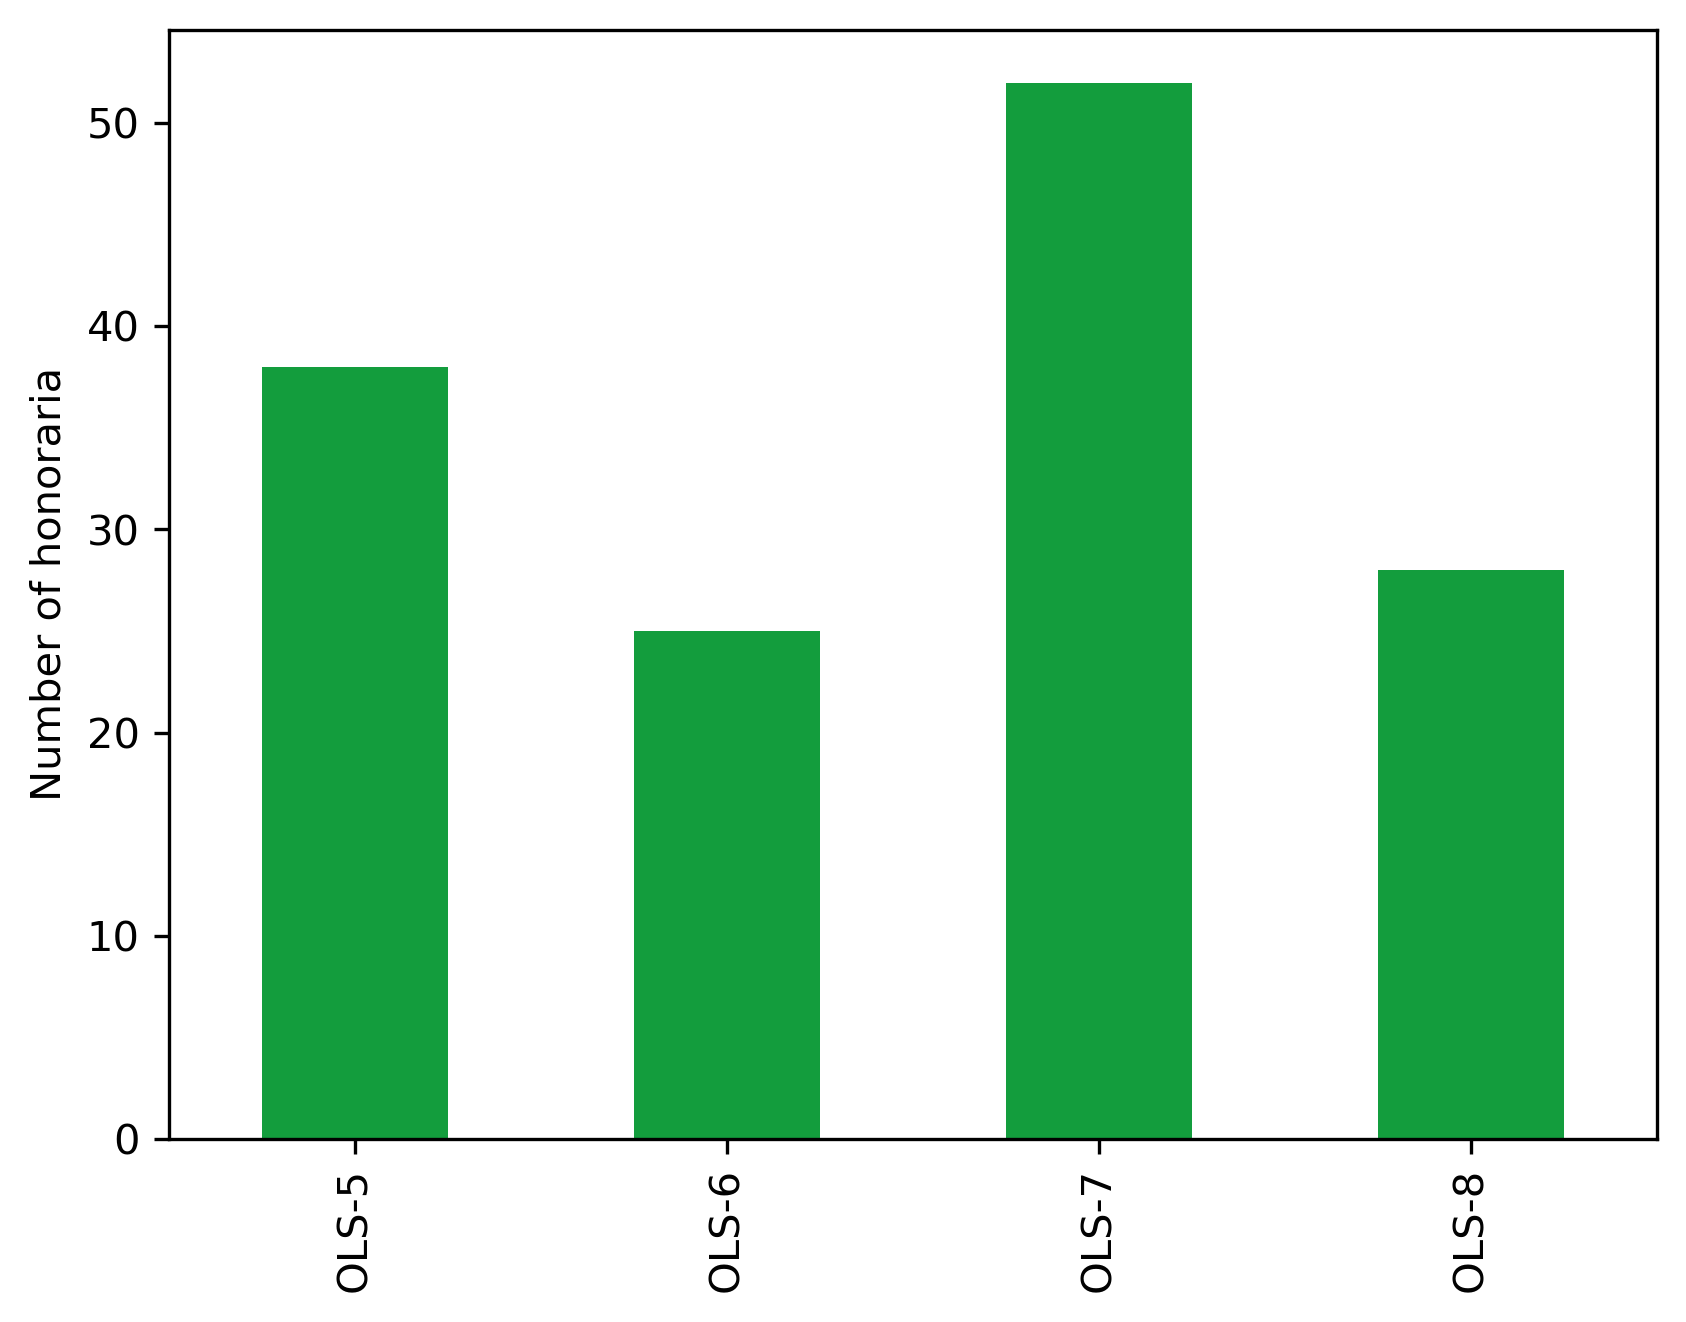

In [33]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_honor_df.Number
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Number of honoraria")
plt.xlabel("")

Text(0.5, 0, '')

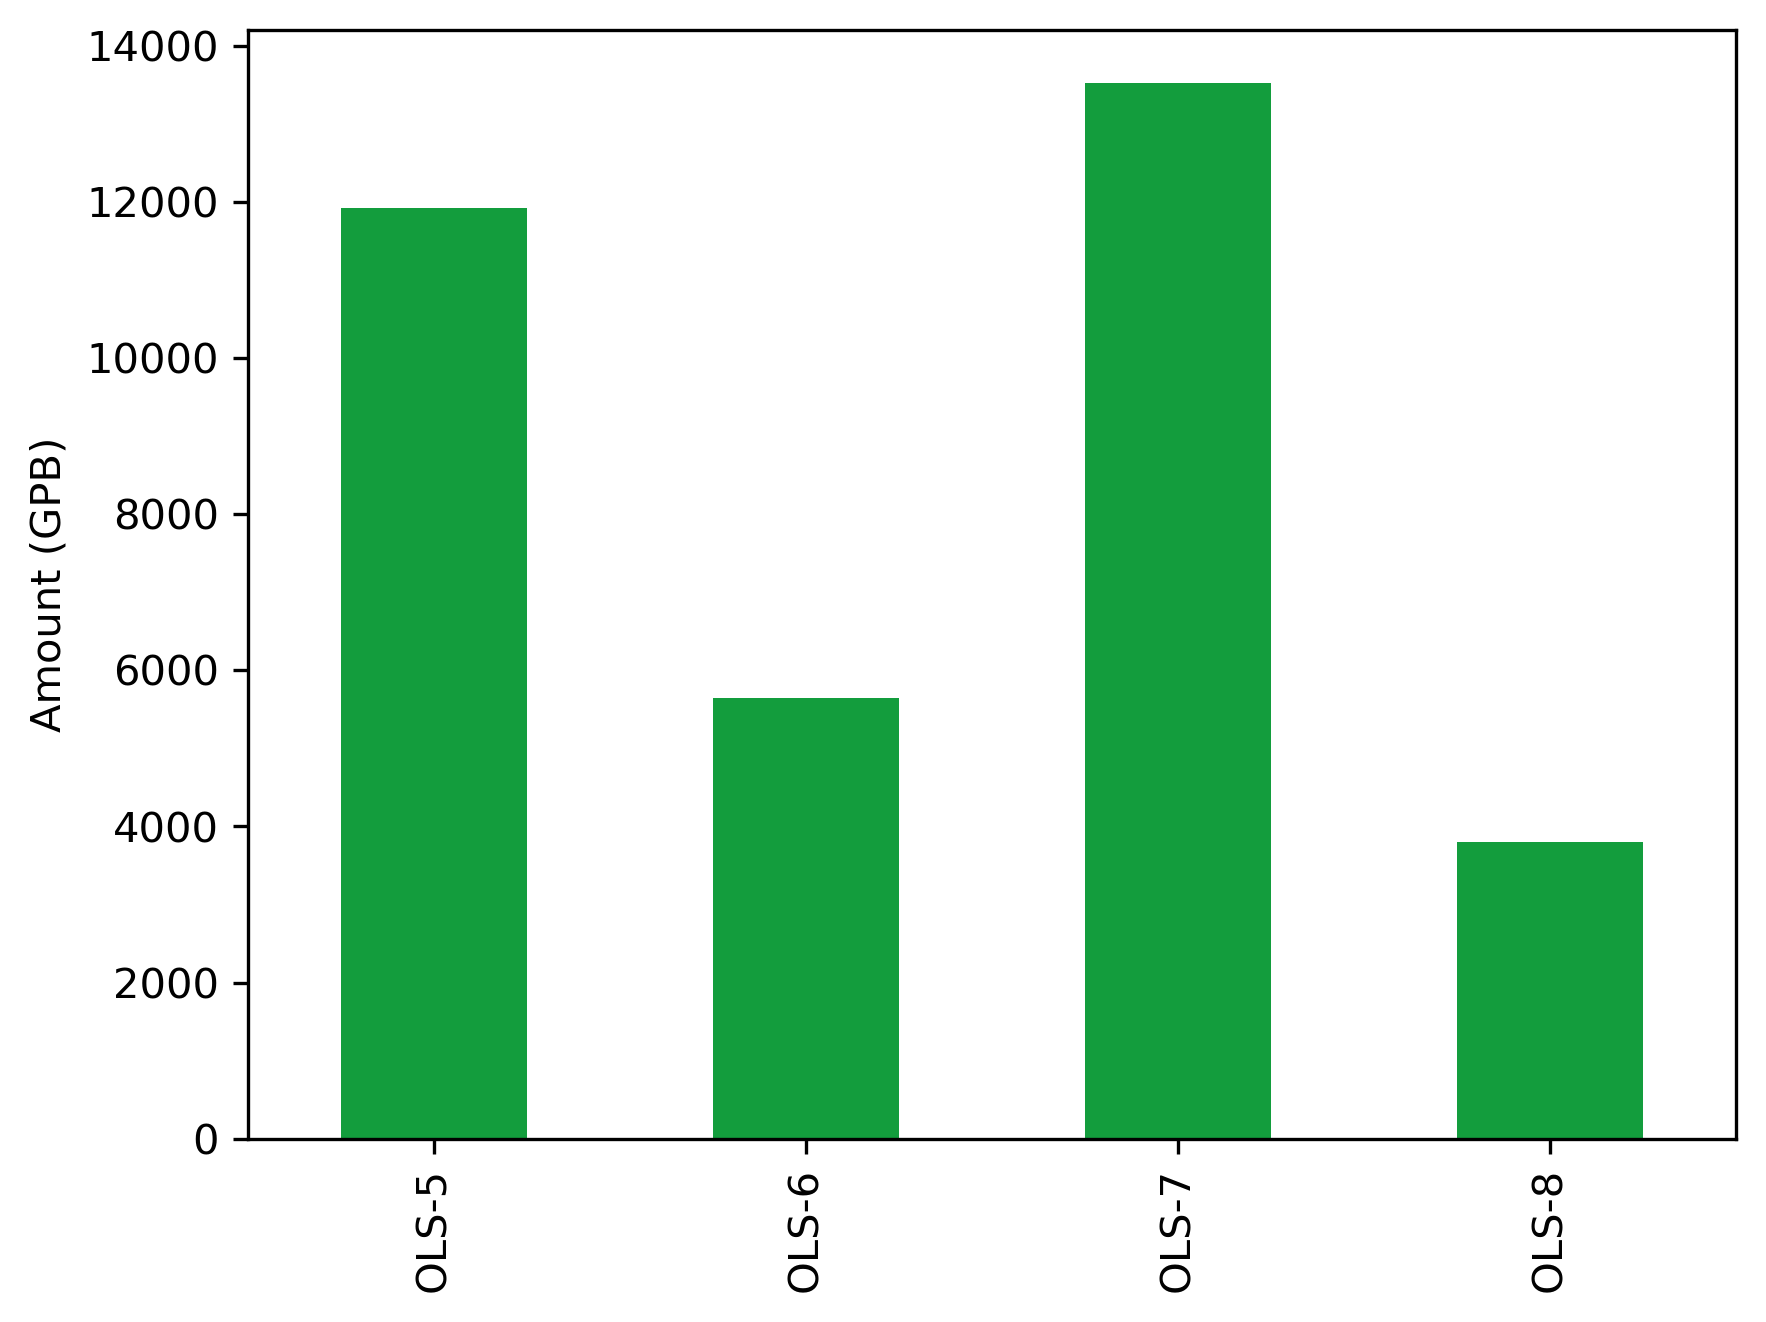

In [34]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_honor_df.Amount
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Amount (GPB)")
plt.xlabel("")

### Role

In [35]:
number_df = (
    honor_df
    .groupby(by="Role")
    .count()
    .drop(columns = ["Amount", "Country", "Continent"])
    .rename(columns = {"Cohort": "Number"})
)
amount_df = (
    honor_df
    .drop(columns = ["Cohort", "Country", "Continent"])
    .groupby(by="Role")
    .sum()
    #.drop(columns = ["Role"])
)
role_honor_df = (
    number_df.join(amount_df)
    .sort_values("Number")
)
role_honor_df

,Number,Amount
Role,,
"Speaker, Facilitator",1,370.5800
"Facilitator, Mentor",2,906.3608
Facilitator,33,5071.8482
Mentor,51,18265.9622
Speaker,56,10294.2130


Text(0.5, 0, '')

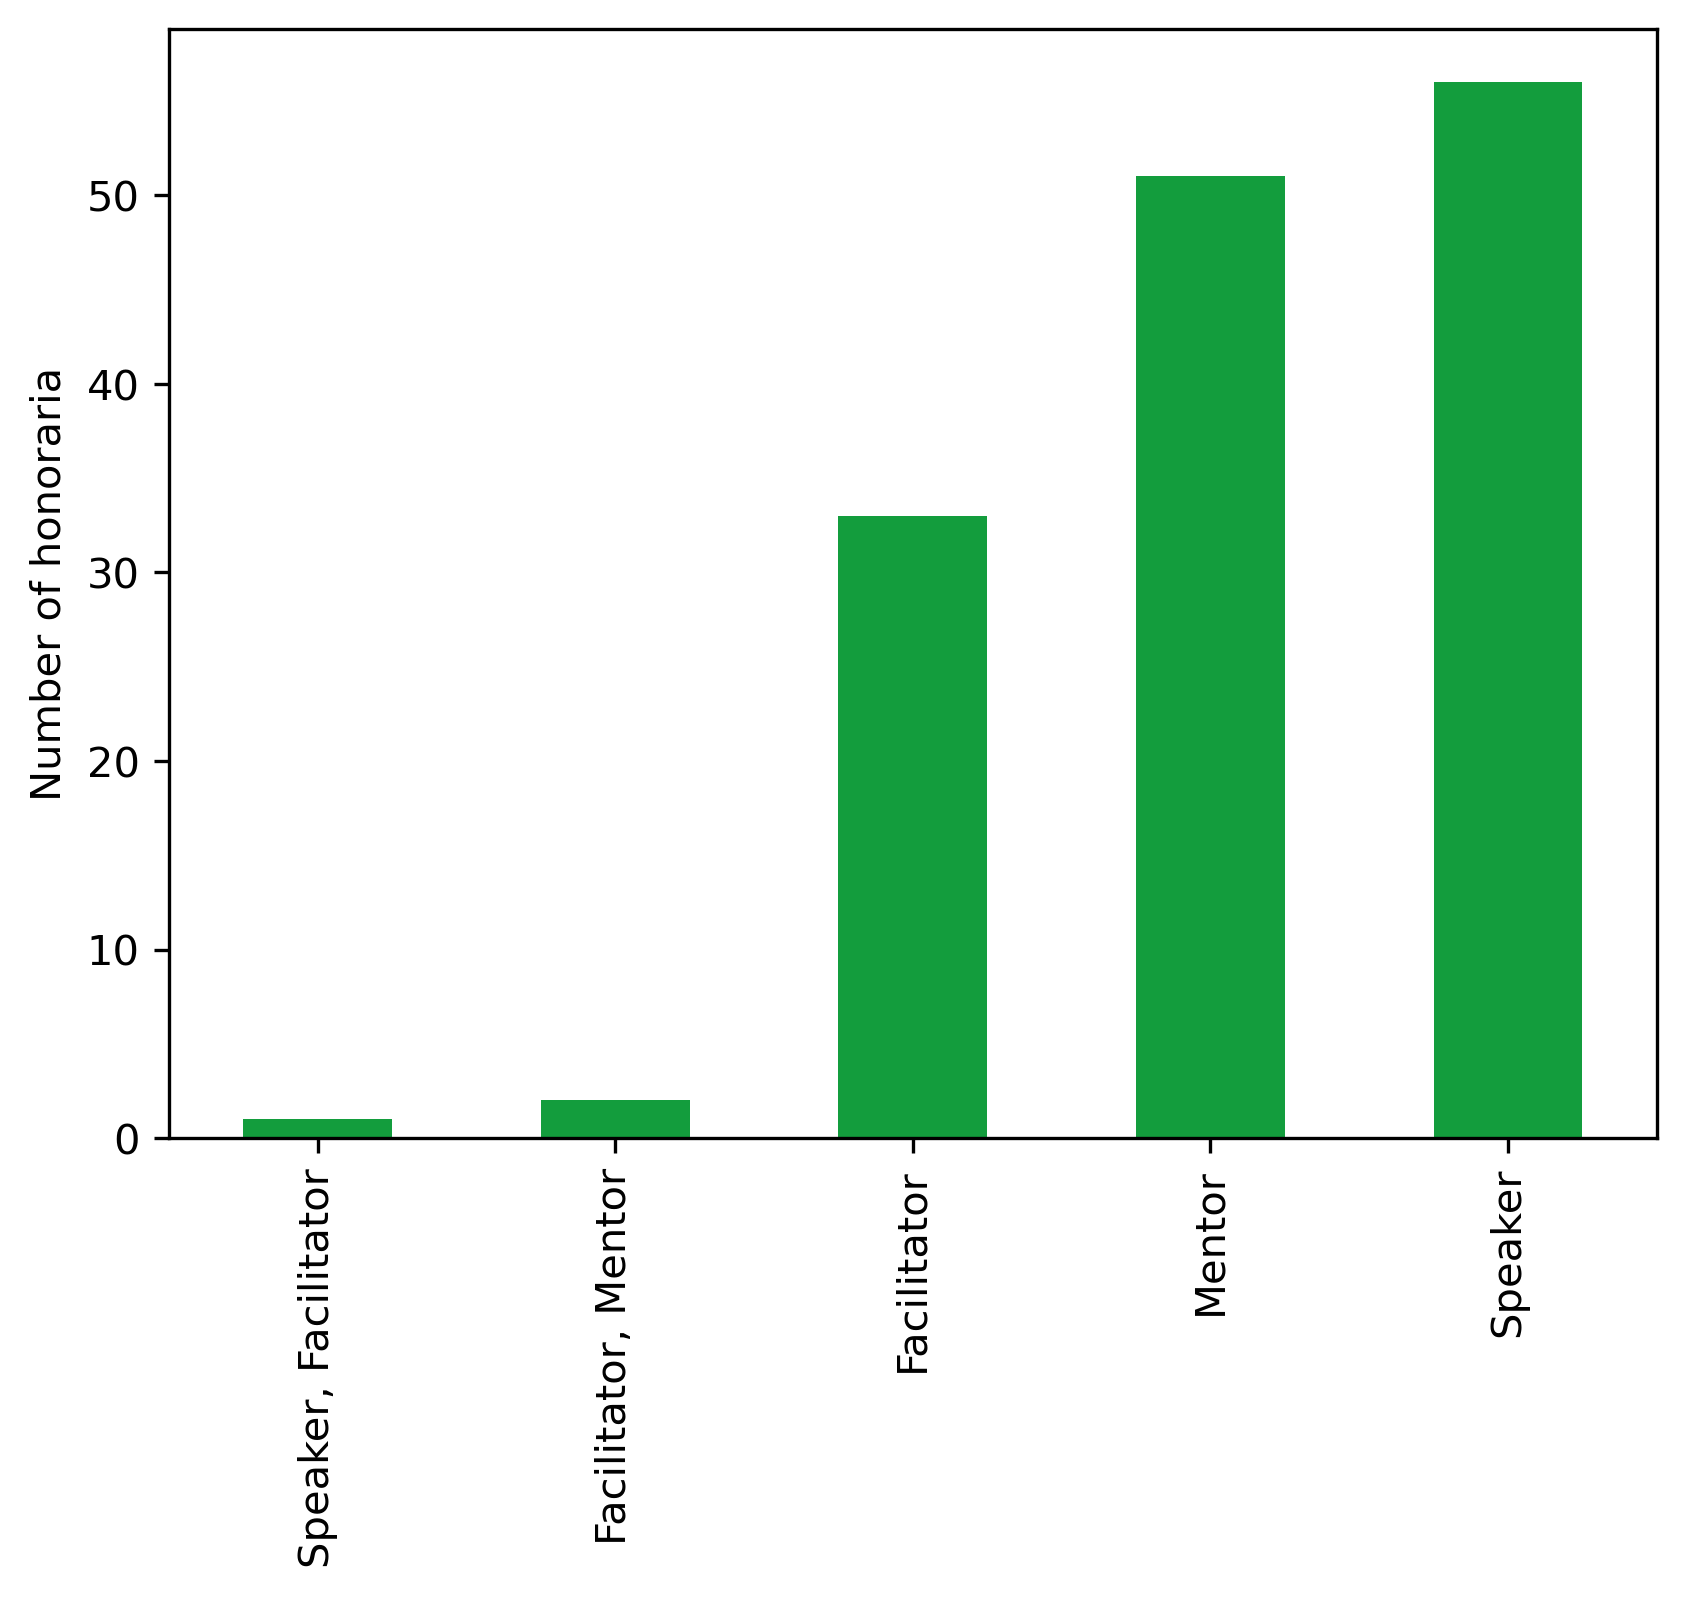

In [36]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(role_honor_df.Number
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Number of honoraria")
plt.xlabel("")

Text(0.5, 0, '')

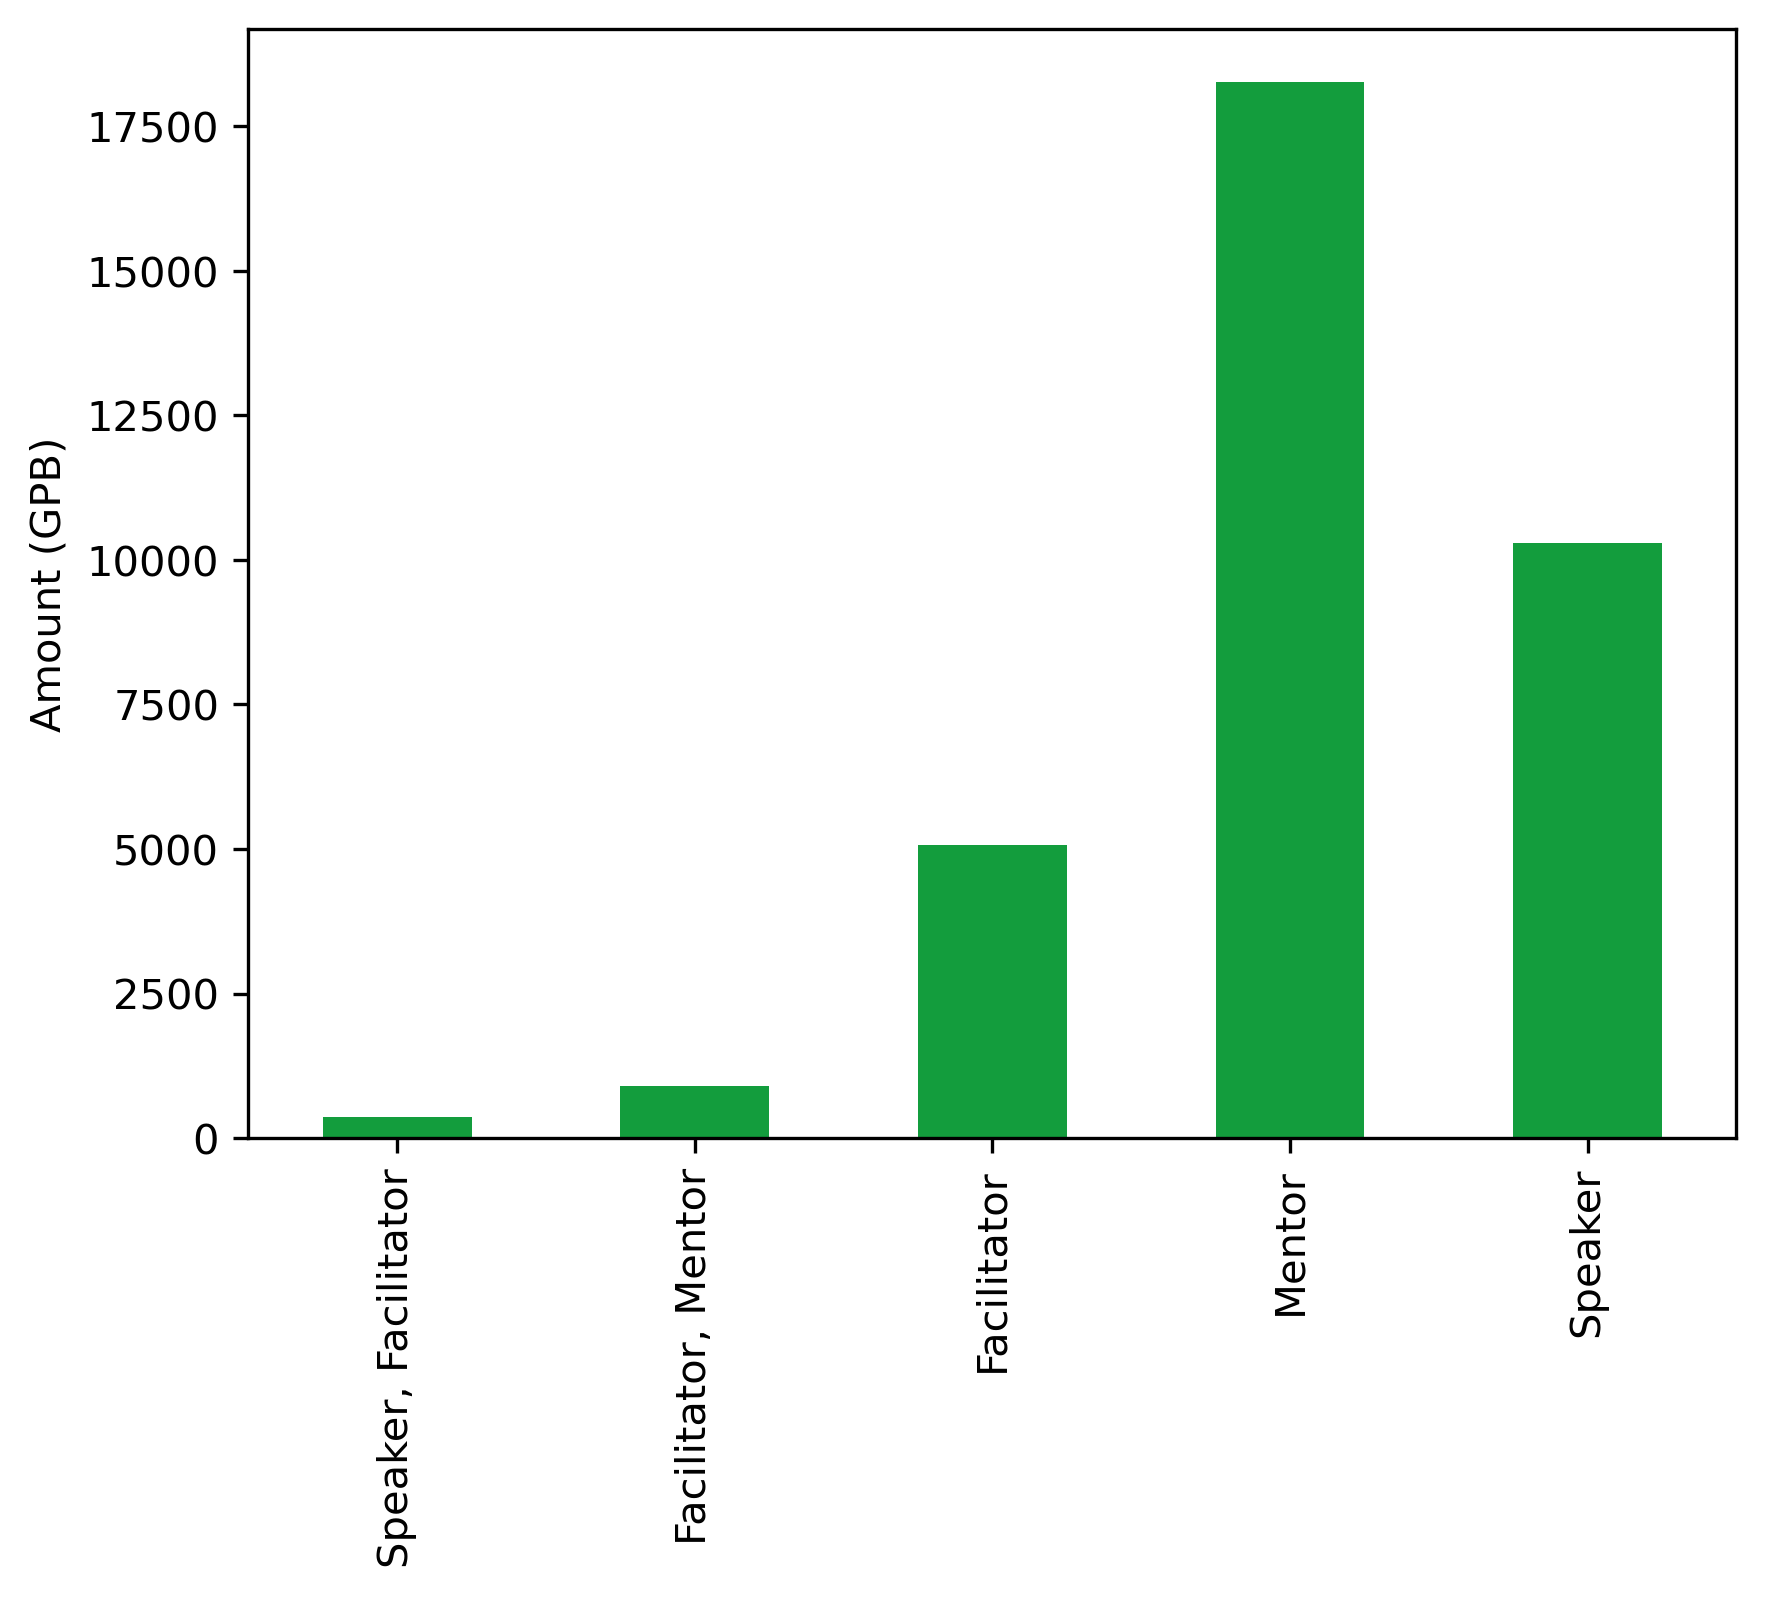

In [37]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(role_honor_df.Amount
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Amount (GPB)")
plt.xlabel("")

### Continent

In [38]:
number_df = (
    honor_df
    .groupby(by="Continent")
    .count()
    .drop(columns = ["Amount", "Country", "Role"])
    .rename(columns = {"Cohort": "Number"})
)
amount_df = (
    honor_df
    .drop(columns = ["Role", "Country", "Cohort"])
    .groupby(by="Continent")
    .sum()
)
continent_honor_df = number_df.join(amount_df)
tmp = continent_honor_df[continent_honor_df.index!=''].sort_values("Number")
continent_honor_df = pd.concat([tmp, continent_honor_df[continent_honor_df.index=='']])
continent_honor_df

,Number,Amount
Continent,,
Oceania,2,403.6200
Asia,7,1851.4600
North America,12,3052.8180
South America,14,3942.5440
Africa,35,8013.4230
Europe,53,14390.0392
,20,3255.0600


Text(0.5, 0, '')

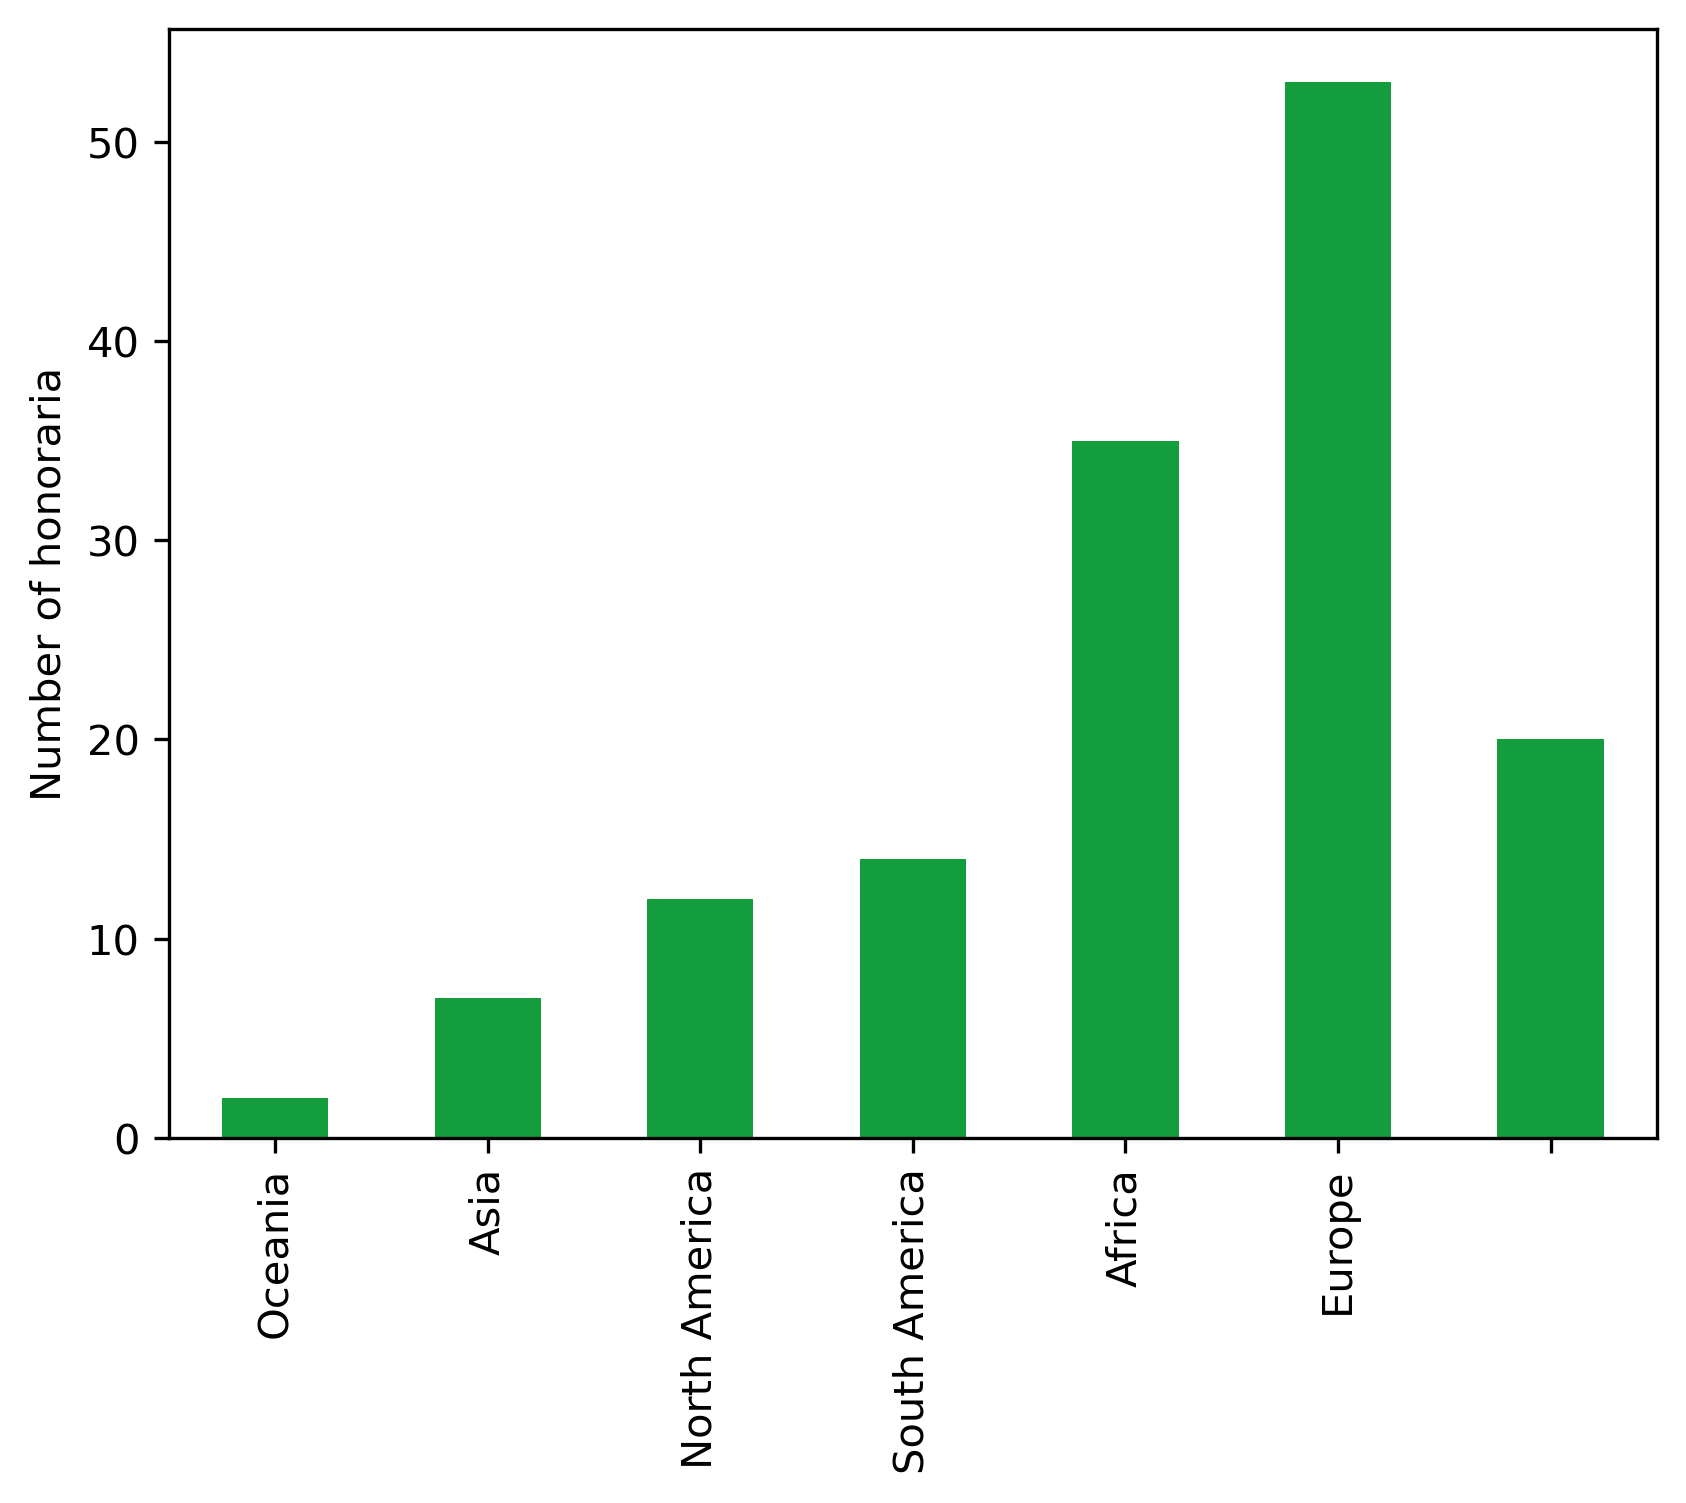

In [39]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(continent_honor_df.Number
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Number of honoraria")
plt.xlabel("")

Text(0.5, 0, '')

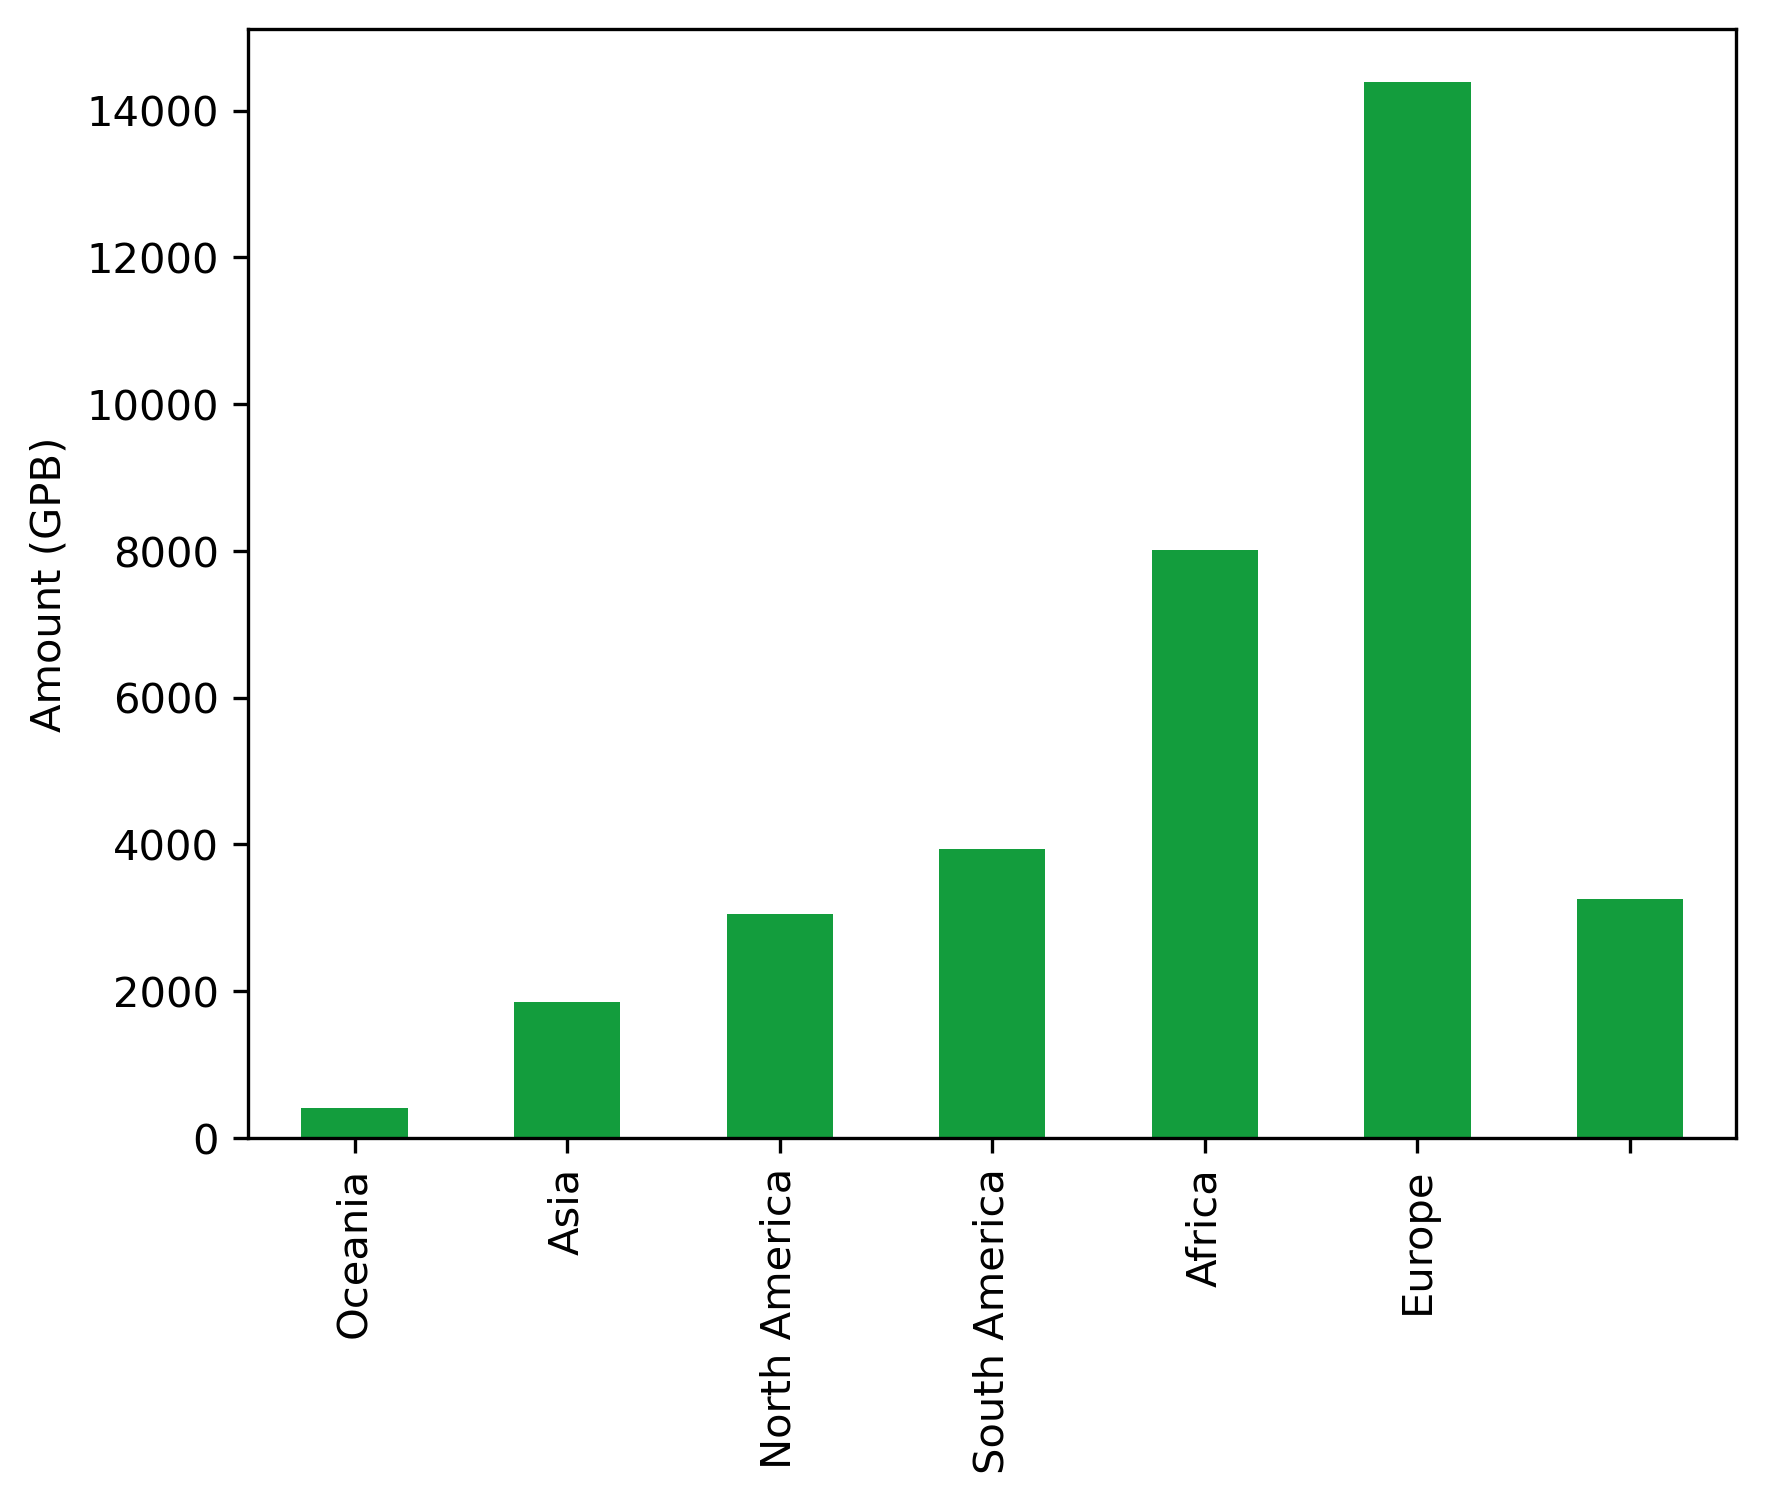

In [40]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(continent_honor_df.Amount
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Amount (GPB)")
plt.xlabel("")

### Cohort and role

#### Number of honoraria

In [41]:
cohort_role_df = (
    honor_df
    .drop(columns = ["Continent", "Country"])
    .groupby(by=["Role","Cohort"])
    .count()
)
cohort_role_df = (
    pd.pivot_table(cohort_role_df, index = 'Role', columns = 'Cohort', values="Amount")
    .reindex(['Facilitator, Mentor', 'Mentor', 'Facilitator', 'Speaker', 'Speaker, Facilitator'])
)
cohort_role_df

Cohort,OLS-5,OLS-6,OLS-7,OLS-8
Role,,,,
"Facilitator, Mentor",2.0,NaN,NaN,NaN
Mentor,20.0,3.0,28.0,NaN
Facilitator,4.0,7.0,11.0,11.0
Speaker,12.0,14.0,13.0,17.0
"Speaker, Facilitator",NaN,1.0,NaN,NaN


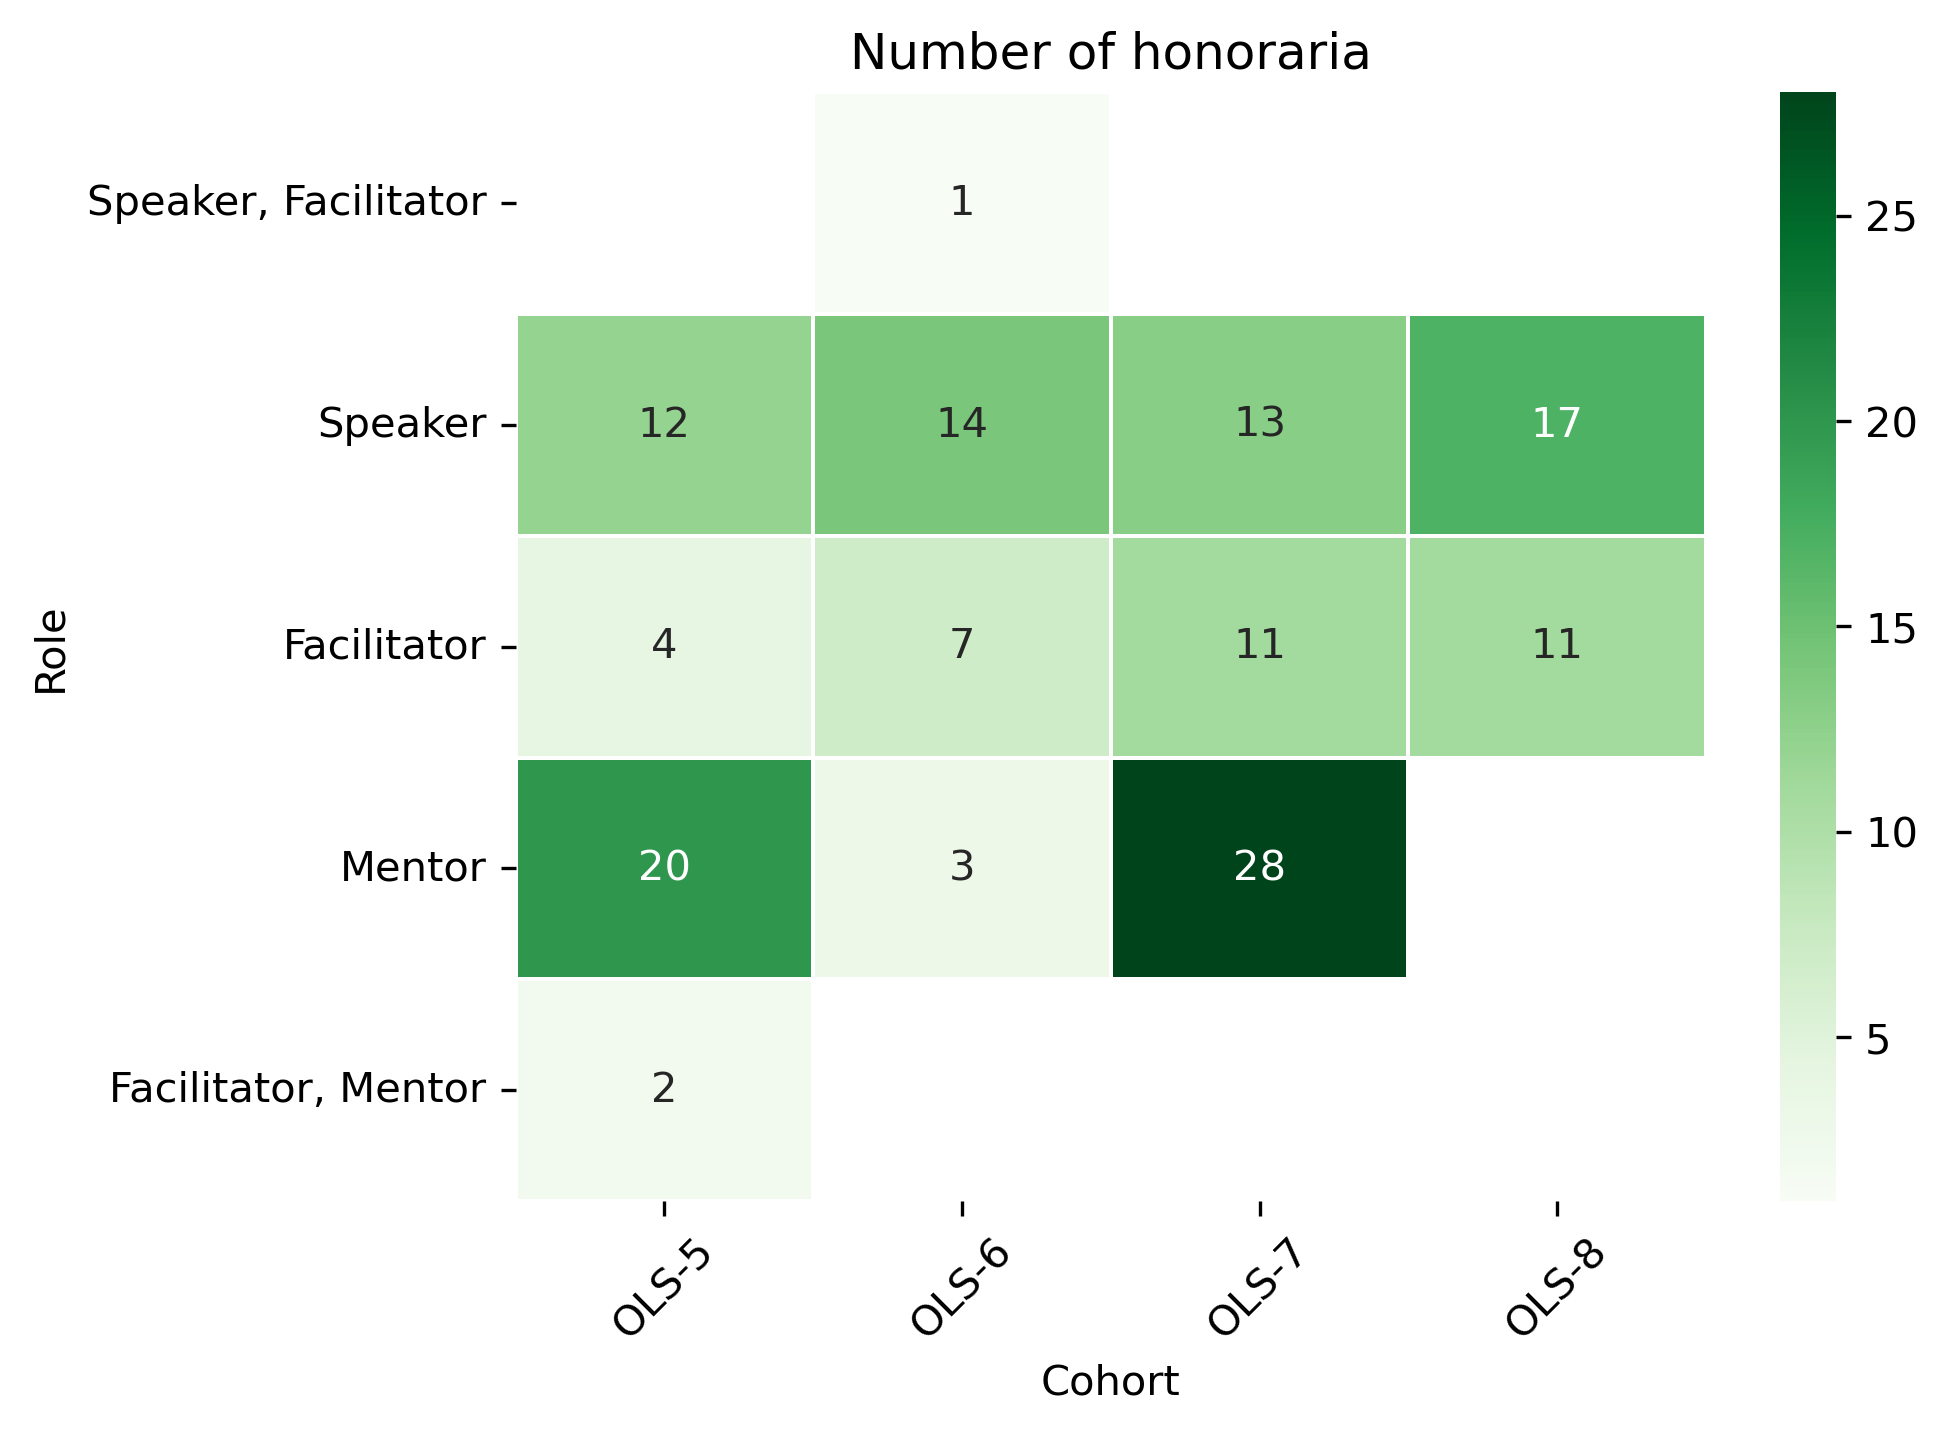

In [42]:
fig, ax = plt.subplots()
fig.set_dpi(300)
sns.heatmap(cohort_role_df[::-1], cmap='Greens', linewidths=0.5, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation='horizontal')
ax.set_title('Number of honoraria')
plt.show()

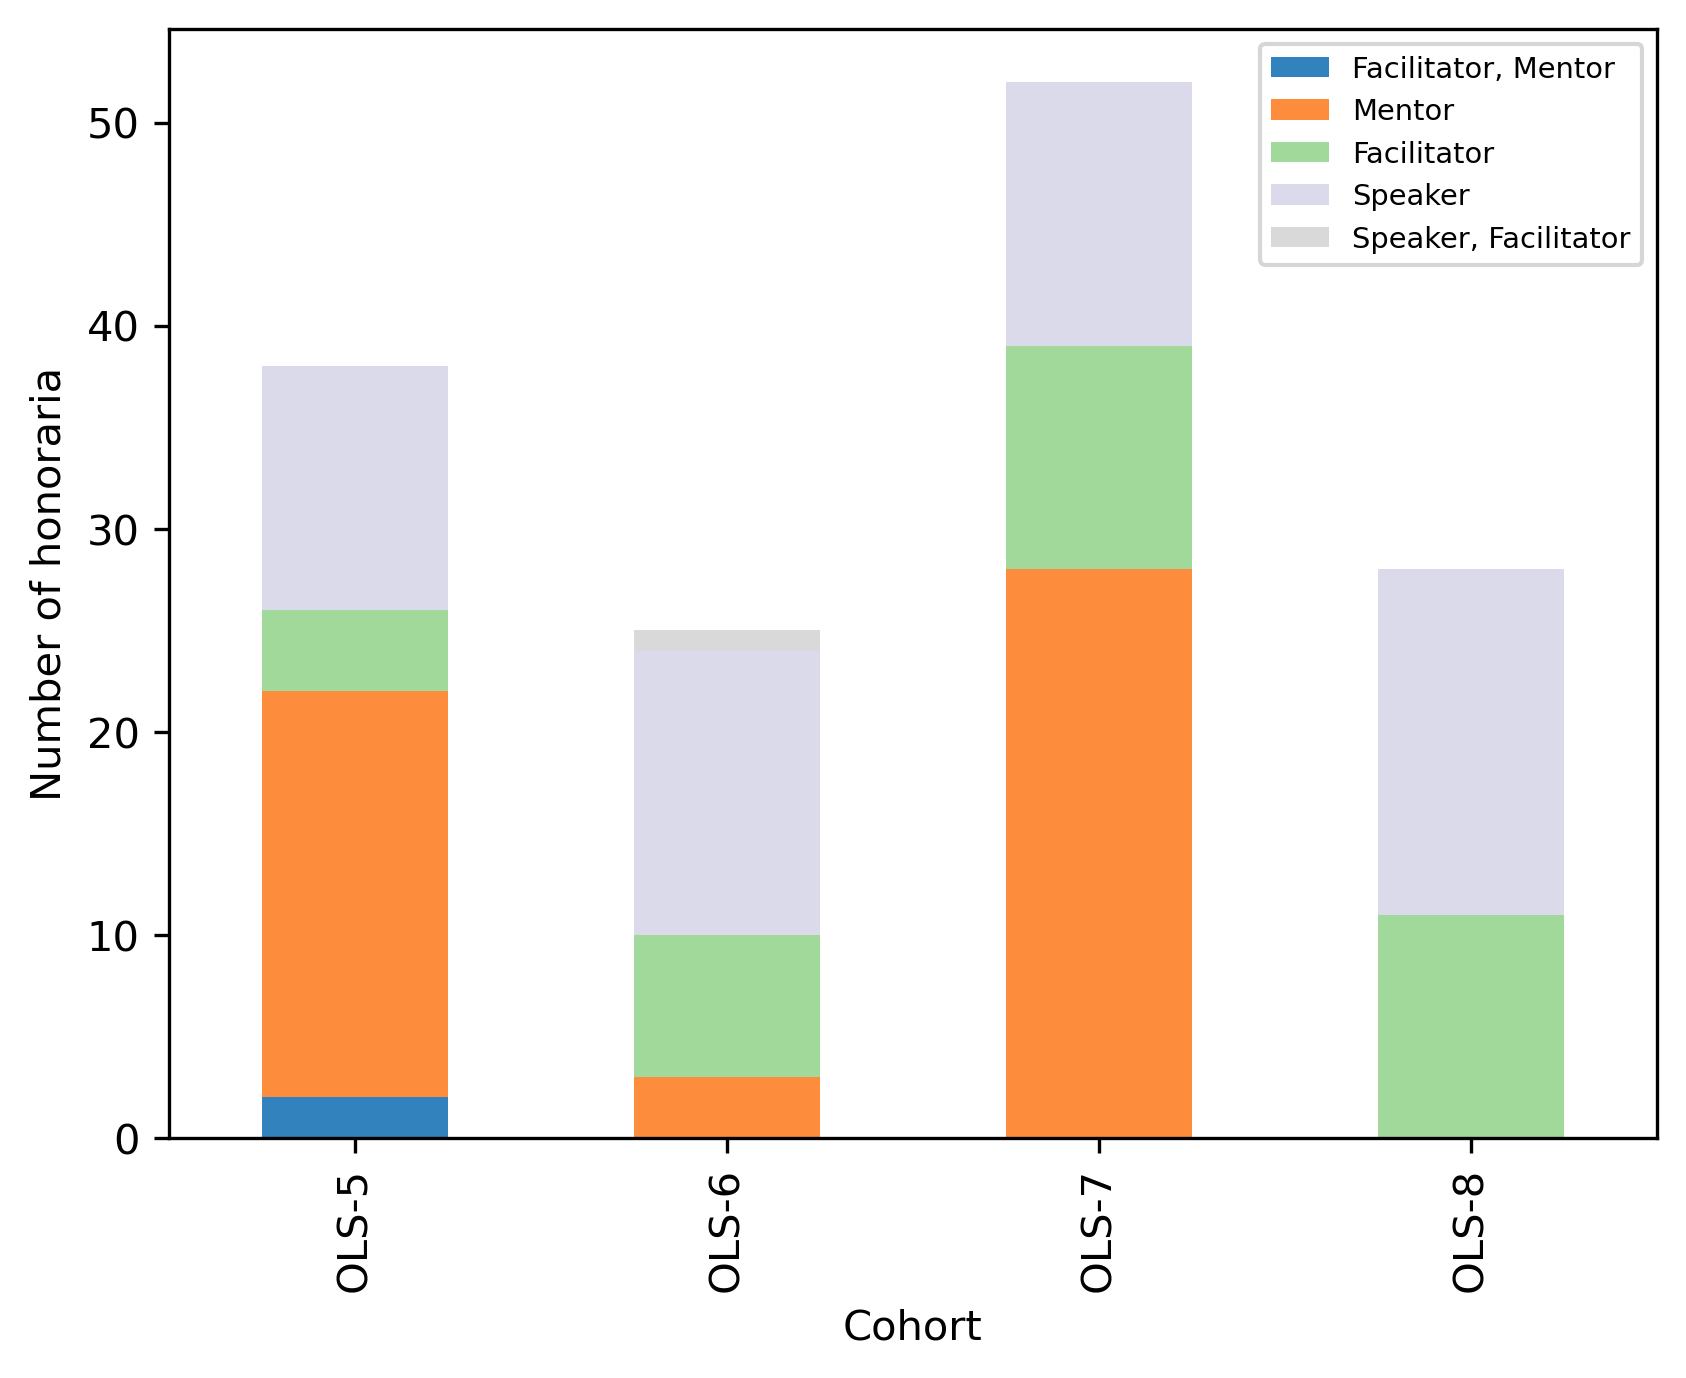

In [43]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_role_df
     .transpose()
     .plot.bar(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Cohort')
plt.ylabel('Number of honoraria')
ax.legend(
#    loc='center left',
#    bbox_to_anchor=(1, 0.5),
#    frameon=False,
    fontsize='x-small')

#### Amount (GBP)

In [44]:
cohort_role_df = (
    honor_df
    .drop(columns = ["Continent", "Country"])
    .groupby(by=["Role","Cohort"])
    .sum()
)
cohort_role_df = (
    pd.pivot_table(cohort_role_df, index = 'Role', columns = 'Cohort', values="Amount")
    .reindex(['Facilitator, Mentor', 'Mentor', 'Facilitator', 'Speaker', 'Speaker, Facilitator'])
)
cohort_role_df

Cohort,OLS-5,OLS-6,OLS-7,OLS-8
Role,,,,
"Facilitator, Mentor",906.3608,NaN,NaN,NaN
Mentor,7385.3404,1254.680,9625.9418,NaN
Facilitator,1239.8700,1332.400,1287.5526,1212.0256
Speaker,2395.1170,2693.413,2613.2366,2592.4464
"Speaker, Facilitator",NaN,370.580,NaN,NaN


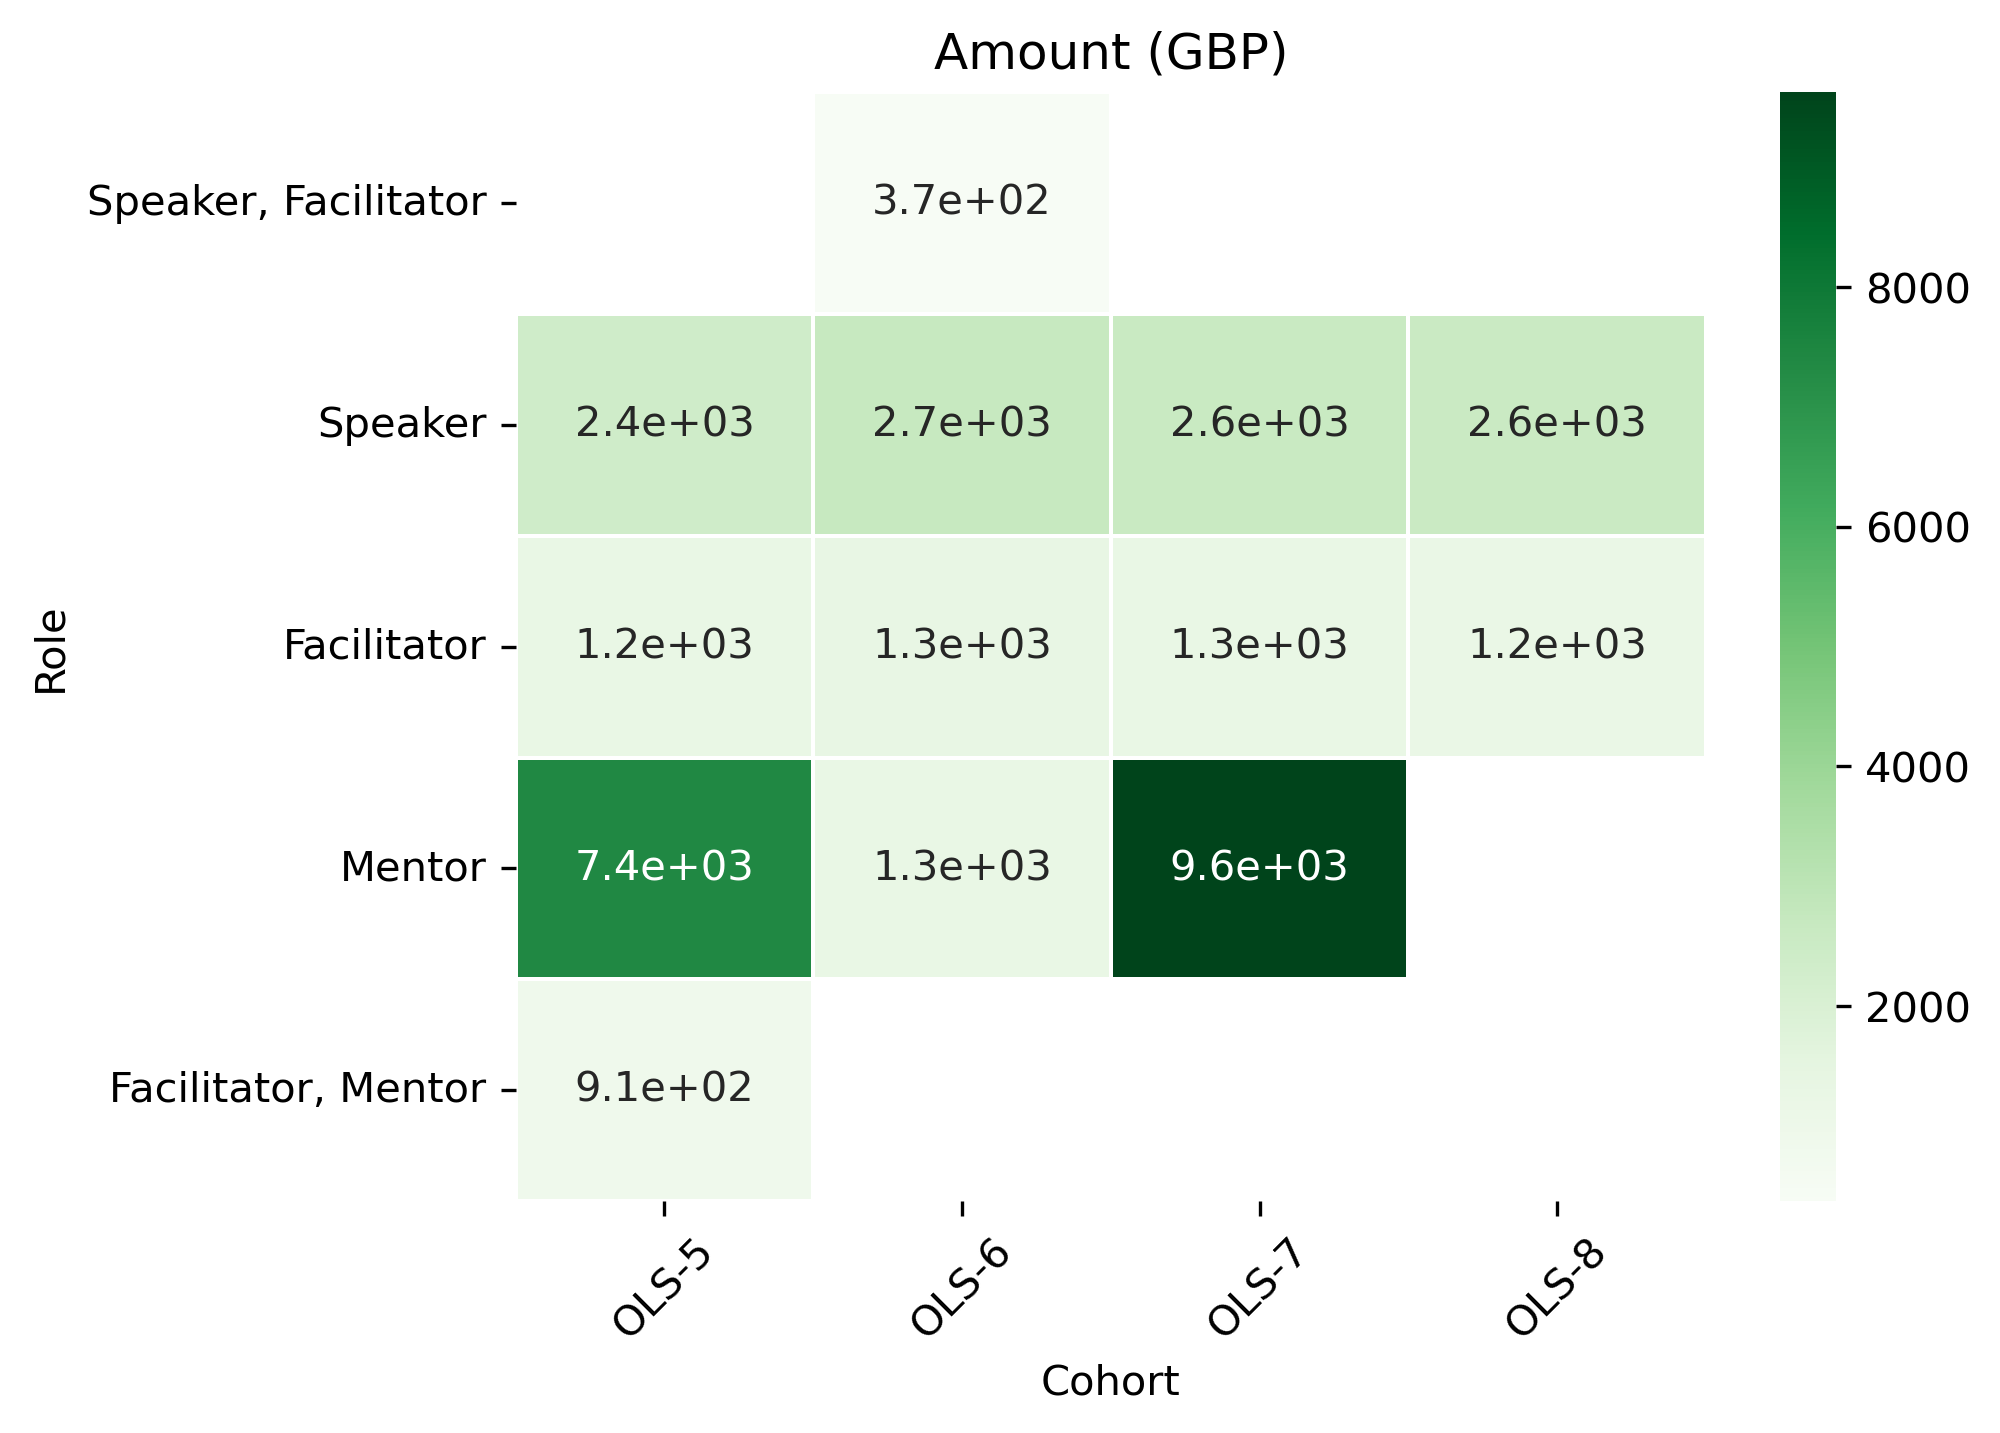

In [45]:
fig, ax = plt.subplots()
fig.set_dpi(300)
sns.heatmap(cohort_role_df[::-1], cmap='Greens', linewidths=0.5, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation='horizontal')
ax.set_title('Amount (GBP)')
plt.show()

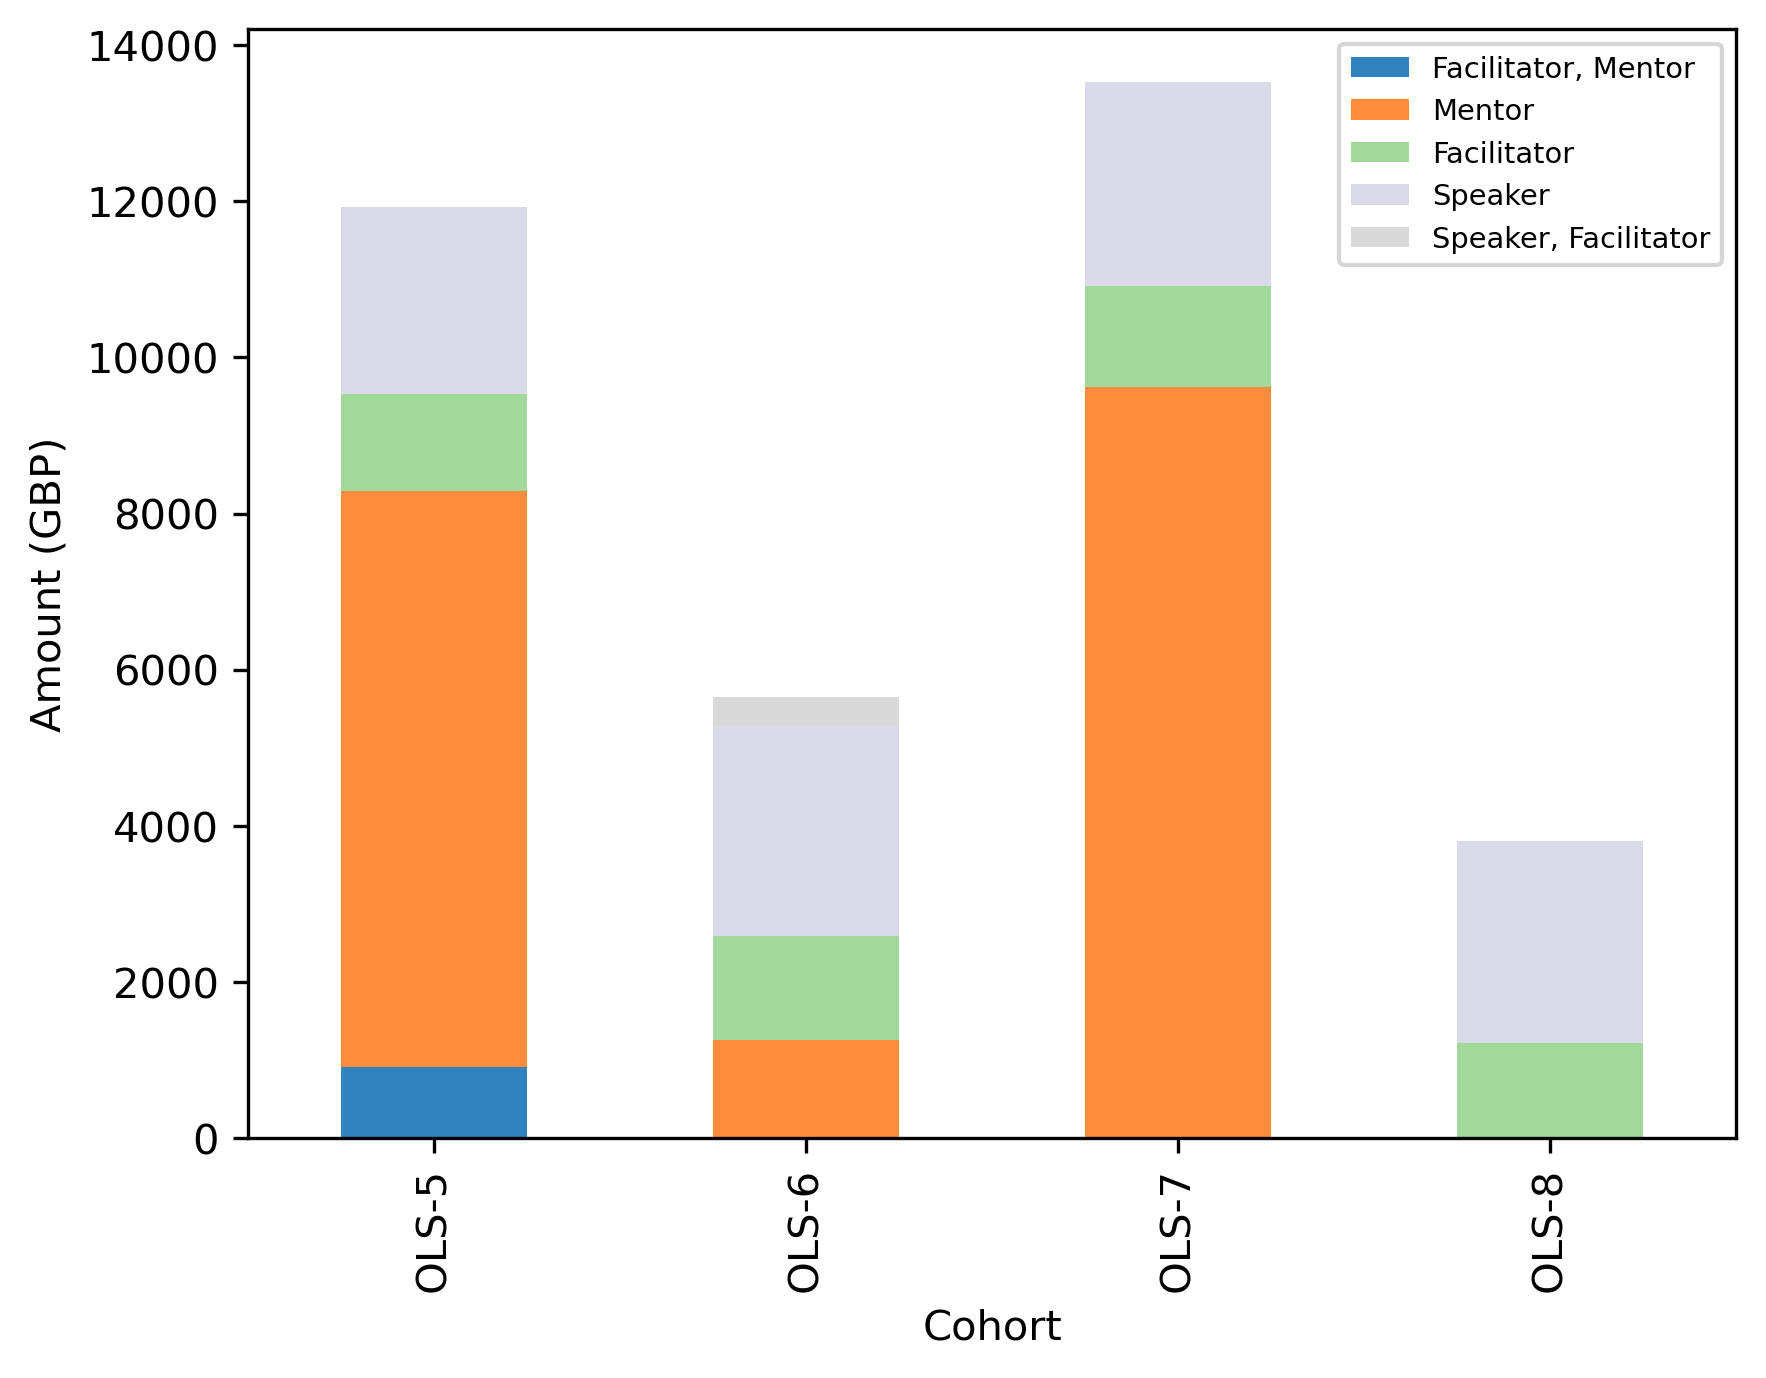

In [46]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_role_df
     .transpose()
     .plot.bar(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Cohort')
plt.ylabel('Amount (GBP)')
ax.legend(
#    loc='center left',
#    bbox_to_anchor=(1, 0.5),
#    frameon=False,
    fontsize='x-small')

### Cohort and continent

#### Number of honoraria

In [47]:
cohort_continent_df = (
    honor_df
    .drop(columns = ["Role", "Country"])
    .groupby(by=["Continent","Cohort"])
    .count()
)
cohort_continent_df = (
    pd.pivot_table(cohort_continent_df, index = 'Continent', columns = 'Cohort', values="Amount")
    .reindex(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])
)
cohort_continent_df

Cohort,OLS-5,OLS-6,OLS-7,OLS-8
Continent,,,,
Africa,5.0,6.0,14.0,10.0
Asia,3.0,1.0,2.0,1.0
Europe,22.0,12.0,15.0,4.0
North America,1.0,3.0,5.0,3.0
Oceania,1.0,NaN,1.0,NaN
South America,5.0,1.0,7.0,1.0


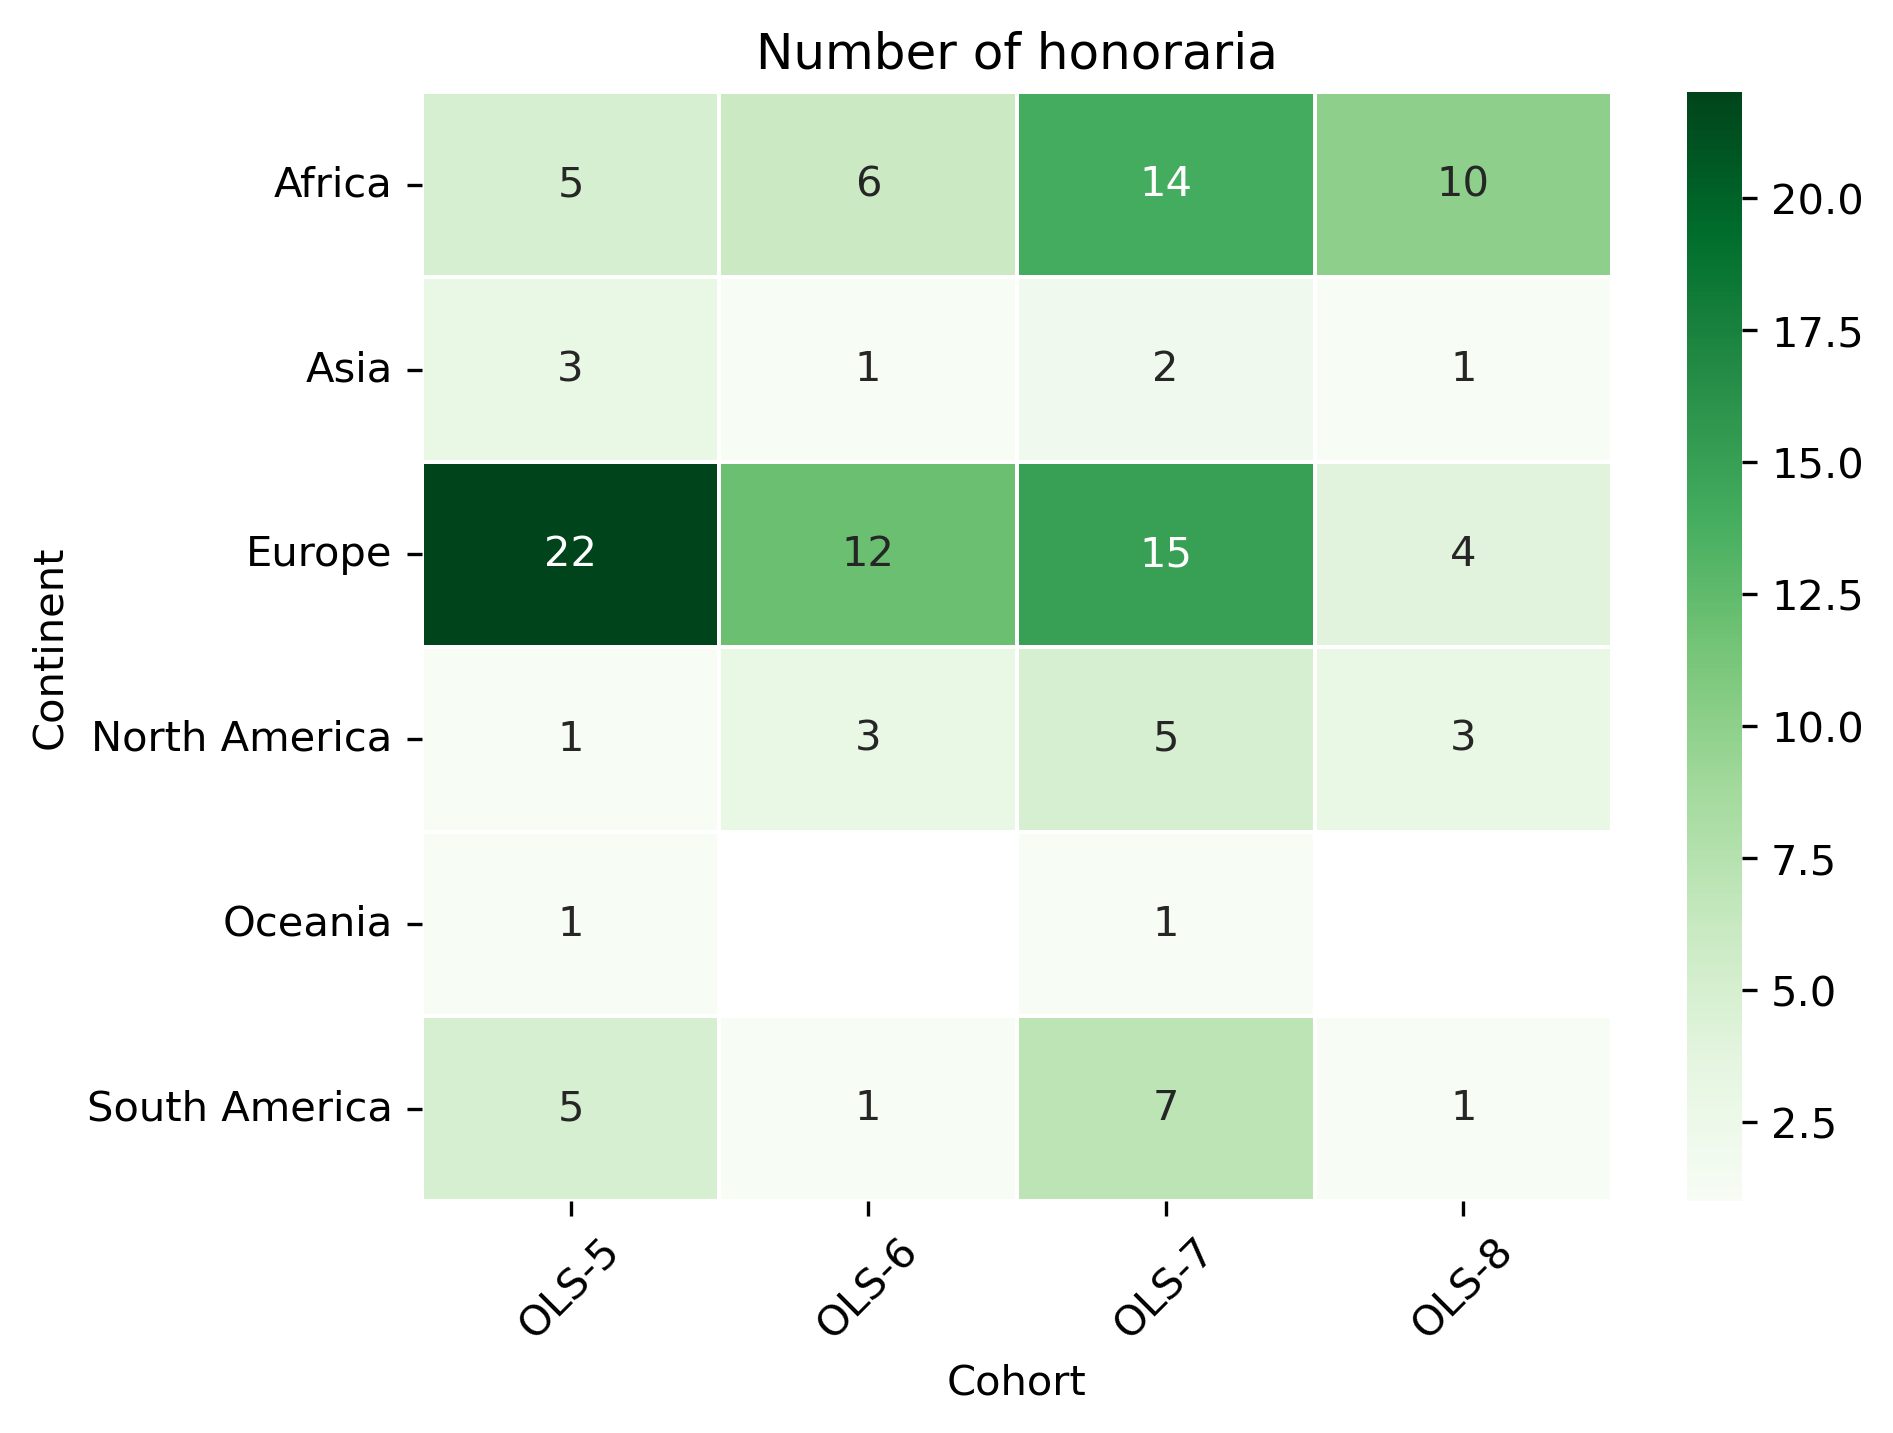

In [48]:
fig, ax = plt.subplots()
fig.set_dpi(300)
sns.heatmap(cohort_continent_df, cmap='Greens', linewidths=0.5, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation='horizontal')
ax.set_title('Number of honoraria')
plt.show()

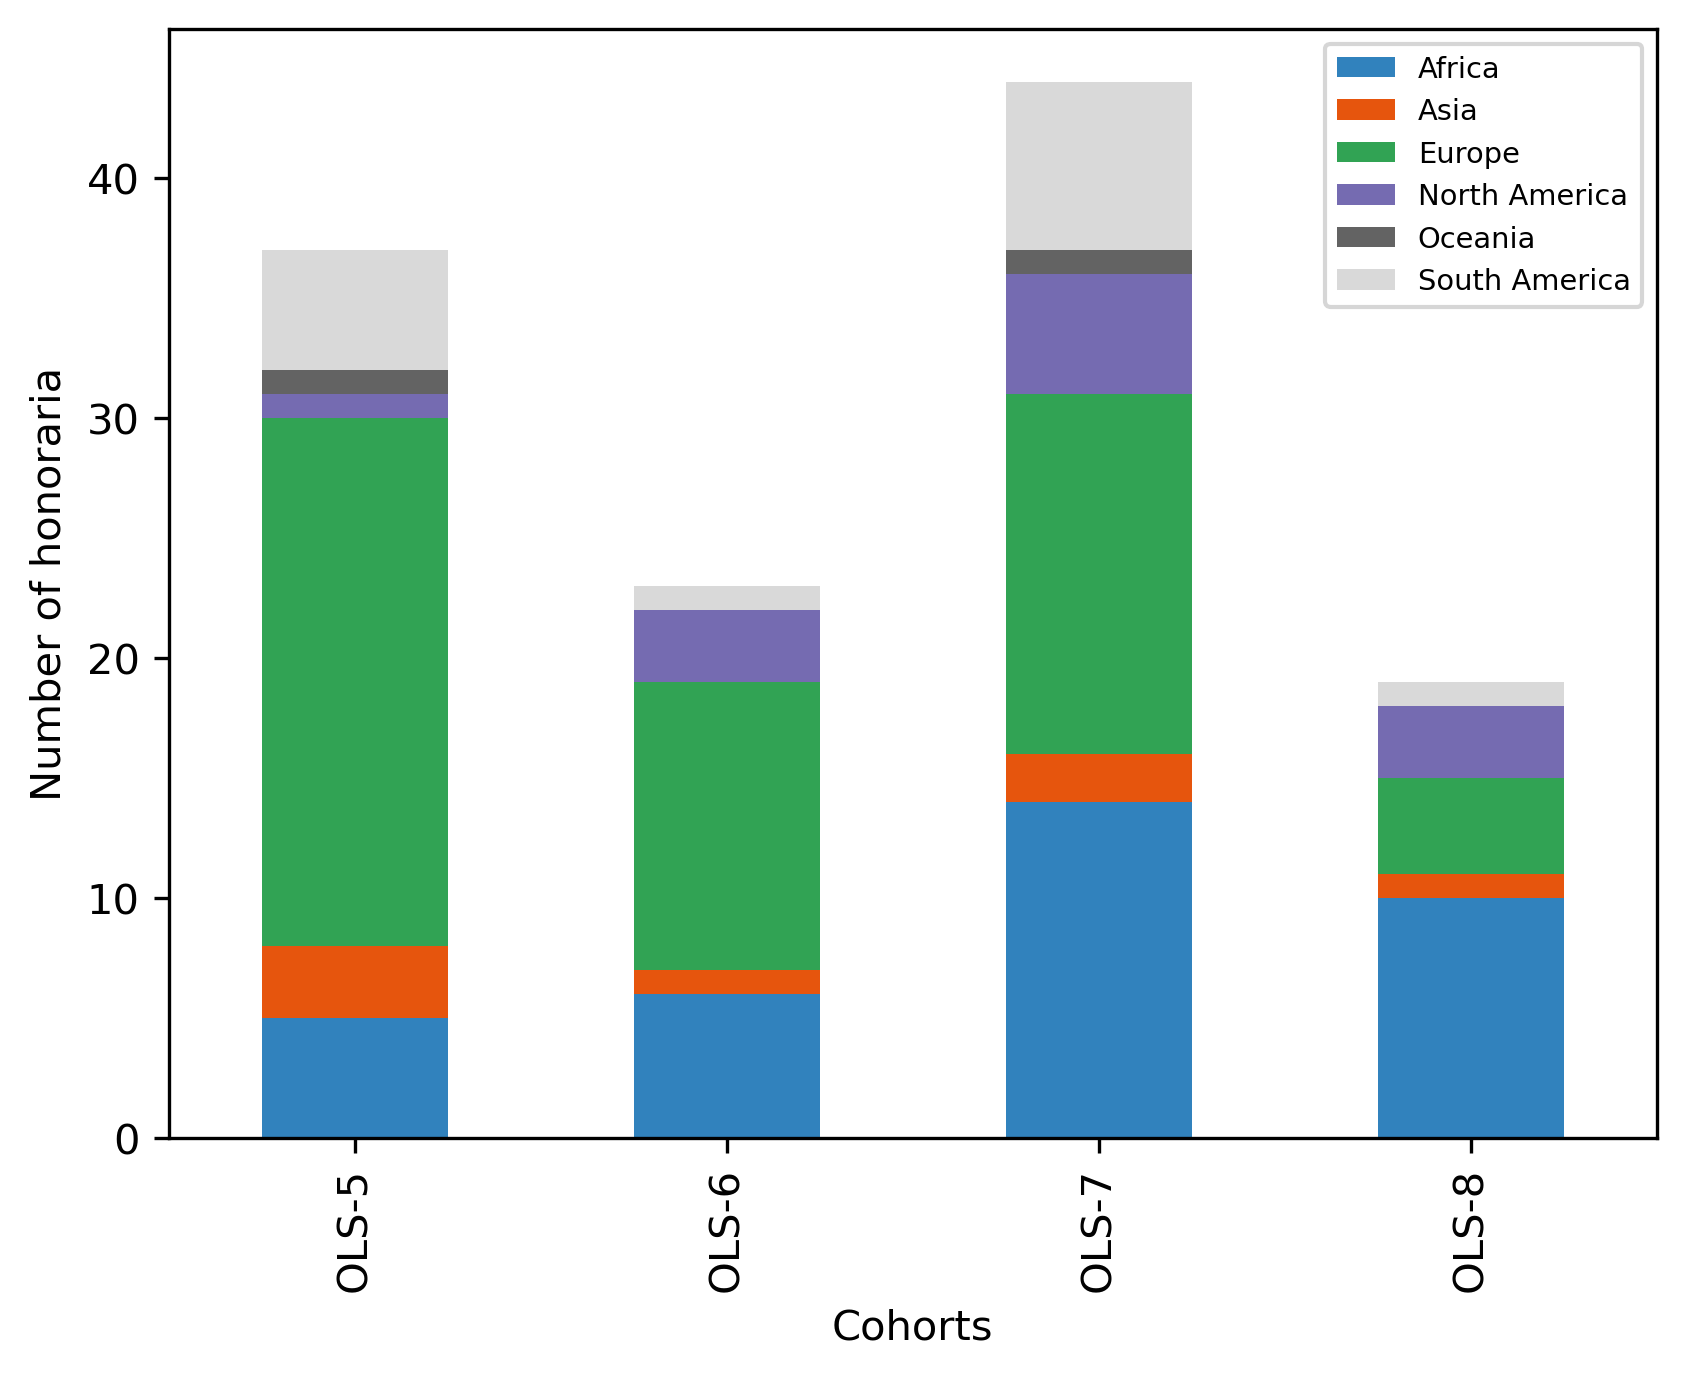

In [49]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_continent_df
     .transpose()
     .plot.bar(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Cohorts')
plt.ylabel('Number of honoraria')
ax.legend(
#    loc='center left',
#    bbox_to_anchor=(1, 0.5),
#    frameon=False,
    fontsize='x-small')

#### Amount (GBP)

In [50]:
cohort_continent_df = (
    honor_df
    .drop(columns = ["Role", "Country"])
    .groupby(by=["Continent","Cohort"])
    .sum()
)
cohort_continent_df = (
    pd.pivot_table(cohort_continent_df, index = 'Continent', columns = 'Cohort', values="Amount")
    .reindex(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])
)
cohort_continent_df

Cohort,OLS-5,OLS-6,OLS-7,OLS-8
Continent,,,,
Africa,1865.4200,1383.213,3400.460,1364.330
Asia,842.8000,211.140,598.770,198.750
Europe,6963.7682,2776.940,4190.479,458.852
North America,408.4100,854.280,1588.712,201.416
Oceania,200.0000,NaN,203.620,NaN
South America,1445.5100,212.930,2103.720,180.384


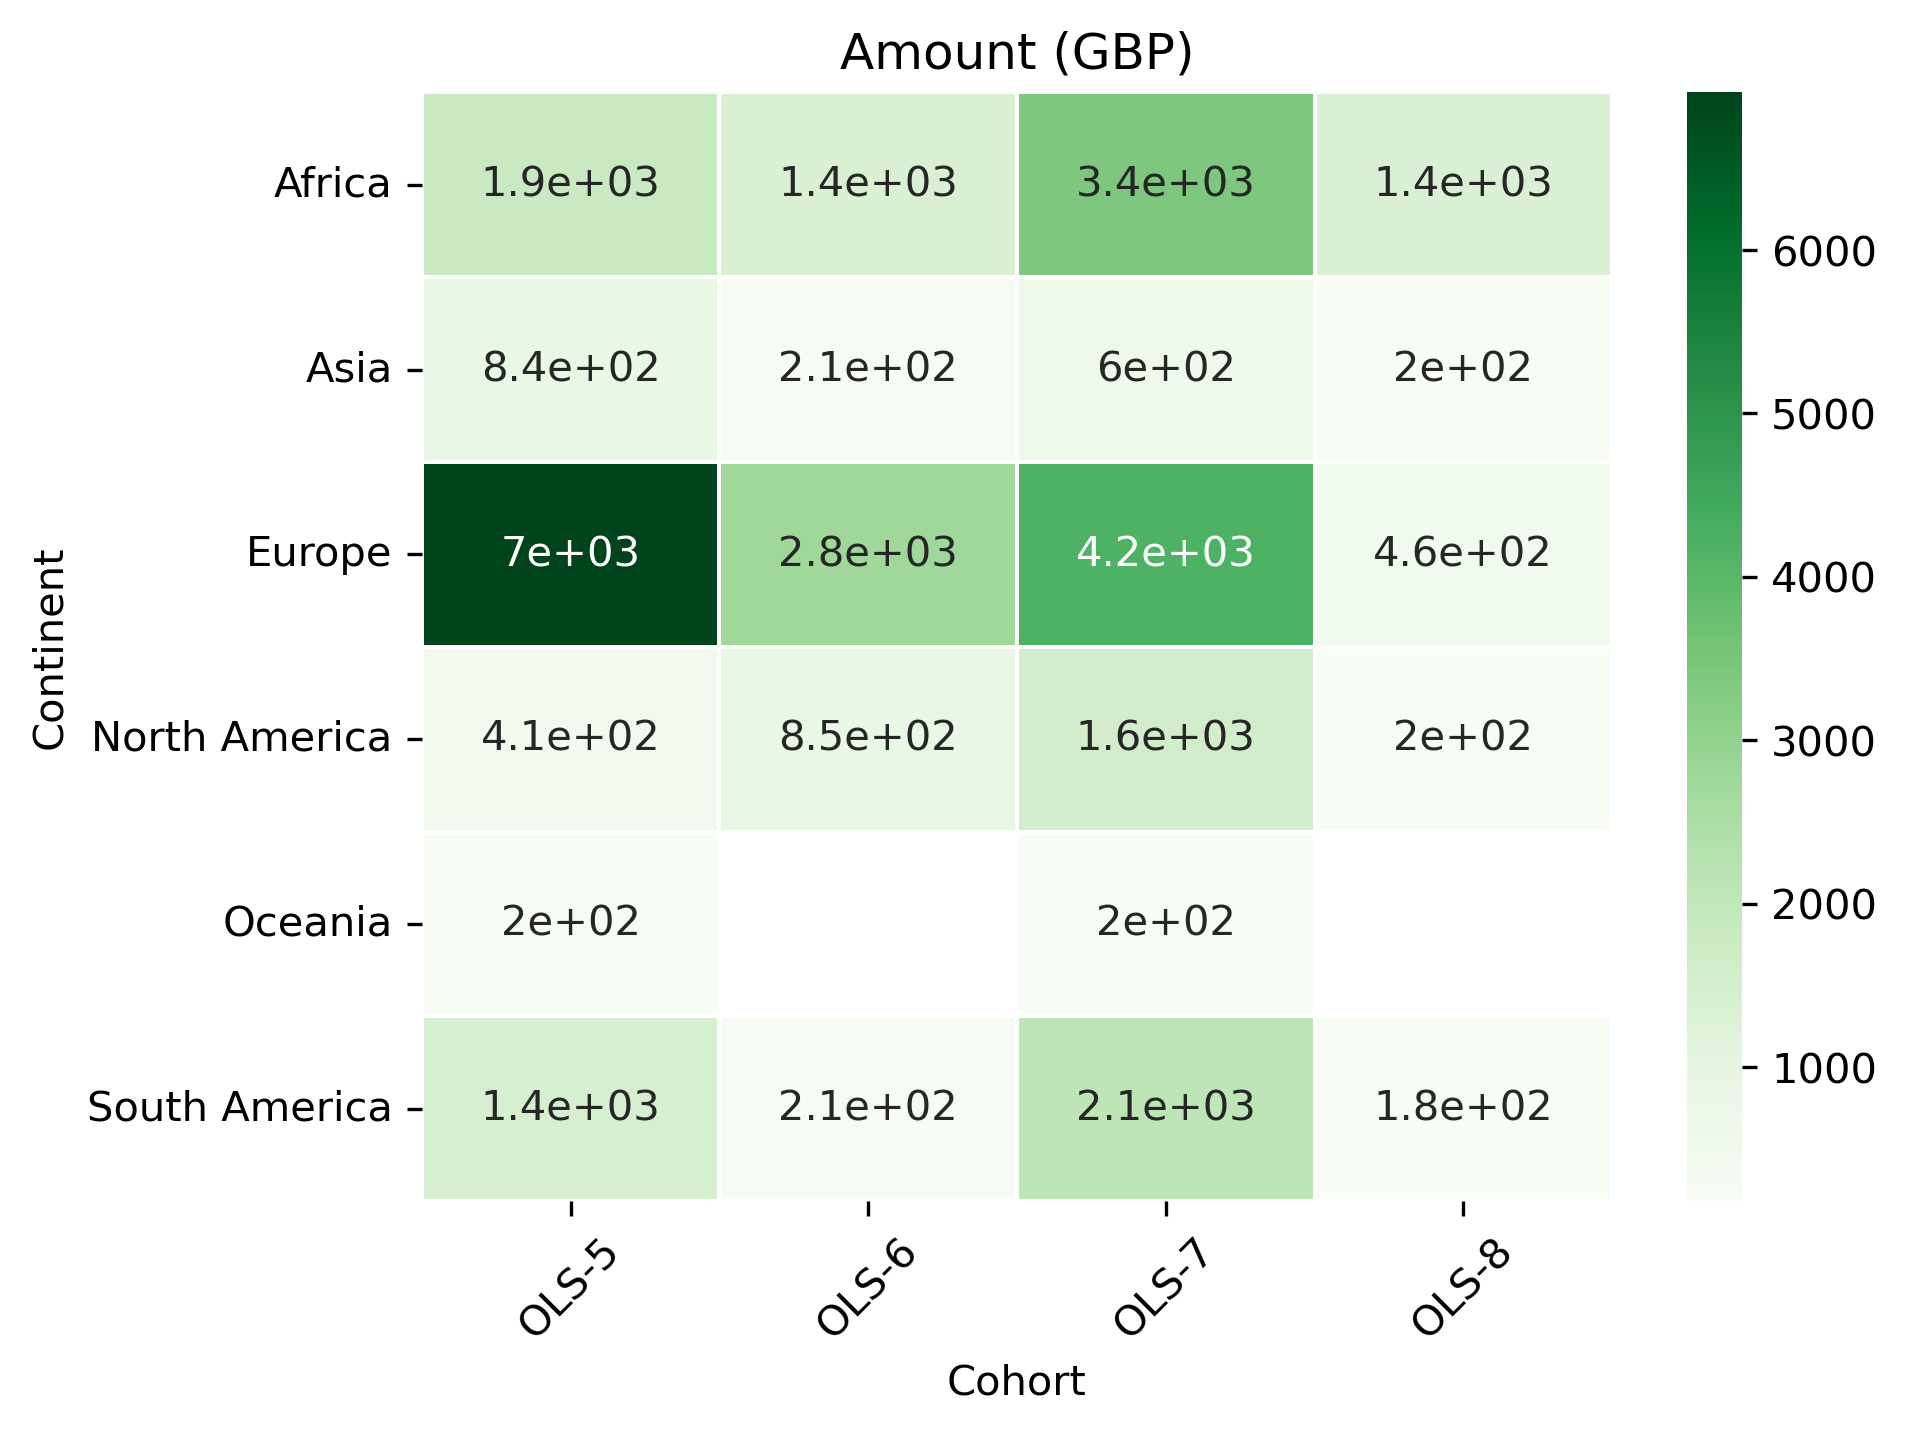

In [51]:
fig, ax = plt.subplots()
fig.set_dpi(300)
sns.heatmap(cohort_continent_df, cmap='Greens', linewidths=0.5, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation='horizontal')
ax.set_title('Amount (GBP)')
plt.show()

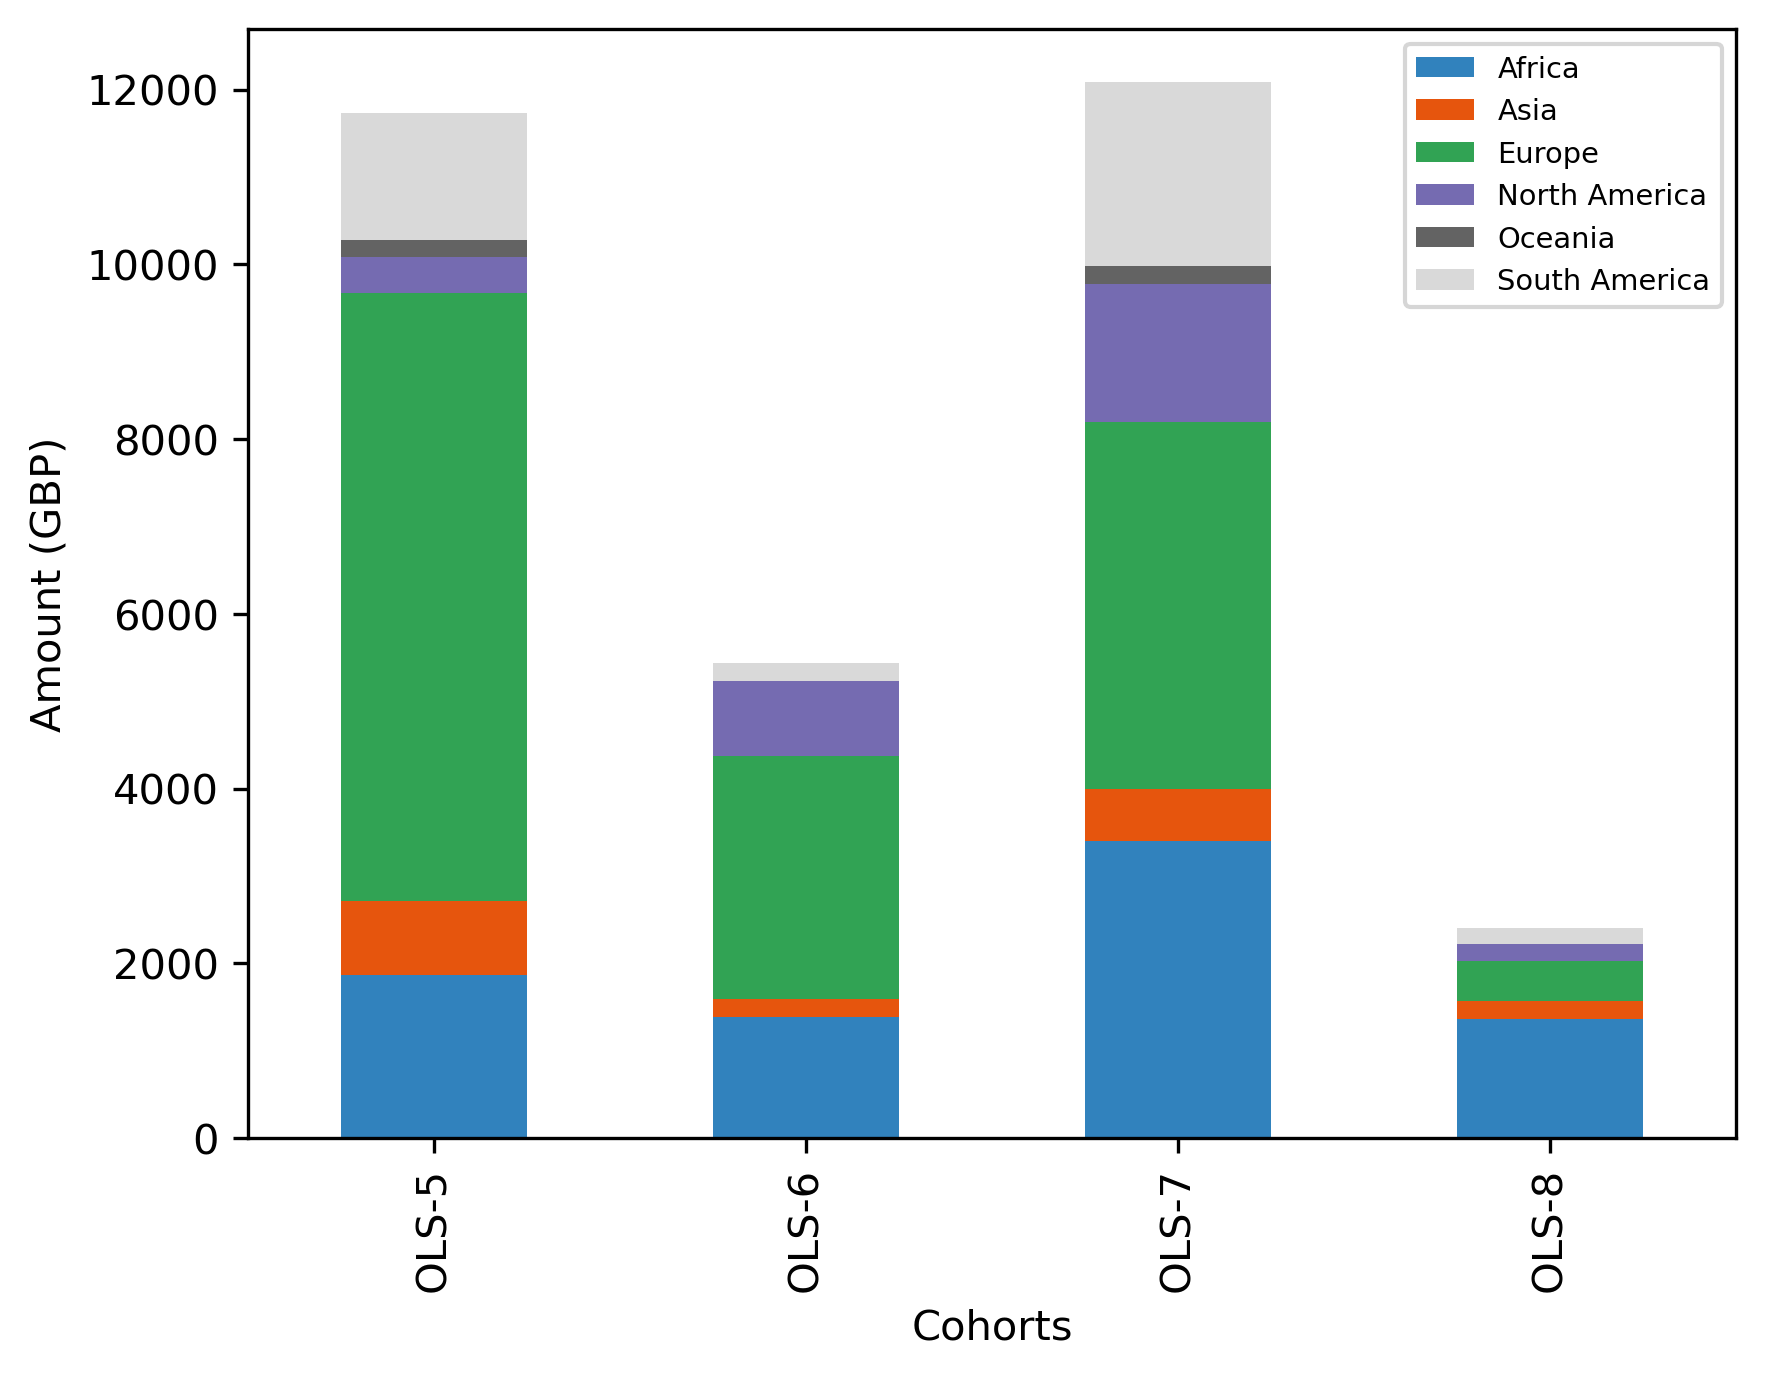

In [52]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_continent_df
     .transpose()
     .plot.bar(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Cohorts')
plt.ylabel('Amount (GBP)')
ax.legend(
#    loc='center left',
#    bbox_to_anchor=(1, 0.5),
#    frameon=False,
    fontsize='x-small')

In [53]:
# when Civi API

CIVI_API = "" #os.getenv('CIVI_API')

headers = {
#    "X-Civi-Auth": f"Bearer {CIVI_API}",
    'Content-Type': "application/x-www-form-urlencoded",
}

selected_fields = ["Honorarium_administration.Cohort","Honorarium_administration.Role","Honorarium_administration.Final_cost"]
s_f_str = '['
for f in selected_fields:
    s_f_str = f'{s_f_str}, {f}'
s_f_str = f'{s_f_str}]'

where_fields = [["case_type_id:label","=","Honorarium"]]
w_f_str = '['
for f in where_fields:
    w_f_str = f'{w_f_str}, [{f[0]}, {f[1]}, {f[2]}]'
w_f_str = f'{s_f_str}]'

data = {
    #"params": f'{"select": {s_f_str}, "where": {w_f_str}, "limit":200}',
}

#response = requests.post('https://openlifescience.civicrm.org/civicrm/ajax/api4/Case/get', headers=headers, data=data)